# Data Ingestion

## Imports

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.feature_selection import  SelectFromModel

## Data Loading

In [3]:
data = pd.read_csv('data.csv', encoding='latin-1', sep=';')
pd.pandas.set_option('display.max_columns', None)

print("Data contains ", data.shape[0]," rows and ", data.shape[1]," columns")

Data contains  1267  rows and  24  columns


In [4]:
# get count of each unique value of Ktas expert

print(data['KTAS_expert'].value_counts())

3    487
4    459
2    220
5     75
1     26
Name: KTAS_expert, dtype: int64


In [69]:
#count number of unique values of chief complain
print(data['Chief_complain'].nunique())

print(data['Diagnosis in ED'].nunique())

417
583


In [4]:

print(data['Chief_complain'].value_counts())

#save this values on chief complain txt file with value - count format
data['Chief_complain'].value_counts().to_csv('chief_complain.txt', sep='\t', header=False)

abd pain                   72
dyspnea                    60
dizziness                  59
fever                      45
ant. chest pain            44
                           ..
Throat Pain                 1
facial painful swelling     1
toe pain                    1
left eye swelling           1
orthopnea                   1
Name: Chief_complain, Length: 417, dtype: int64


## Head

In [25]:
data.head()

,Group,Sex,Age,Patients number per hour,Arrival mode,Injury,Chief_complain,Mental,Pain,NRS_pain,SBP,DBP,HR,RR,BT,Saturation,KTAS_RN,Diagnosis in ED,Disposition,KTAS_expert,Error_group,Length of stay_min,KTAS duration_min,mistriage
0,2,2,71,3,3,2,right ocular pain,1,1,2,160,100,84,18,36.6,100,2,Corneal abrasion,1,4,2,86,"5,00",1
1,1,1,56,12,3,2,right forearm burn,1,1,2,137,75,60,20,36.5,NaN,4,"Burn of hand, firts degree dorsum",1,5,4,64,"3,95",1
2,2,1,68,8,2,2,"arm pain, Lt",1,1,2,130,80,102,20,36.6,98,4,"Fracture of surgical neck of humerus, closed",2,5,4,862,"1,00",1
3,1,2,71,8,1,1,ascites tapping,1,1,3,139,94,88,20,36.5,NaN,4,Alcoholic liver cirrhosis with ascites,1,5,6,108,"9,83",1
4,1,2,58,4,3,1,"distension, abd",1,1,3,91,67,93,18,36.5,NaN,4,Ascites,1,5,8,109,"6,60",1


# Exploratory Data Analysis (EDA)

## Data Types




### Group
**Description:** Group categorization.

**Categories:**
- 1 (Local ED)
- 2 (Reginal ED)

**Type:** Categorical Nominal

### Sex
**Description:** Patient's sex.

**Categories:**
- 1 (Female)
- 2 (Male)

**Type:** Categorical Nominal

### Age 
**Description:** Patient's age.

**Type:** Numerical Discrete

### Patient number per hour
**Description:** Number of patients in the Emergency Department per hour.

**Type:** Numerical Discrete

### Arrival mode
**Description:** How patients arrive at the Emergency Department.

**Categories:**
- 1 (Walking)
- 2 (Public Ambulance)
- 3 (Private Vehicle)
- 4 (Private Ambulance)
- 5 (Public transport)
- 6 (Wheelchair)
- 7 (Other)

**Type:** Categorical Nominal 

### Injury 
**Description:** Whether the patient is injured or not.

**Categories:**
- 1 (No)
- 2 (Yes)

**Type:** Categorical Nominal

### Chief_complain
**Description:** The patient's complaint.

**Type:** Categorical Nominal 

### Mental
**Description:** The mental state of the patient.

**Categories:**
- 1 (Alert)
- 2 (Verbal Response)
- 3 (Pain Response)
- 4 (Unresponsive)

**Type:** Categorical Nominal

### Pain
**Description:** Whether the patient has pain.

**Categories:**
- 1 (Yes)
- 0 (No)

**Type:** Binary

### NRS_pain
**Description:** Numerical rating scales of pain

**Type:** Numeric Discrete

### SBP
**Description:** Systolic Blood Pressure.

**Type:** Numeric Continuous

### DBP
**Description:** Diastolic Blood Pressure.

**Type:** Numeric Continuous

### HR
**Description:** Heart Rate.

**Type:** Numeric Continuous

### RR
**Description:** Respiratory Rate.

**Type:** Numeric Continuous

### BT
**Description:** Body Temperature.

**Type:** Numeric Continuous

### Saturation
**Description:** Saturation using oximeter

**Type:** Numeric Continuous

### KTAS_RN
**Description:** Triage result of nurse in ED

**Categories:**
- 1,2,3 = Emergency
- 4,5 = Non-Emergency

**Type:** Numeric Continuous

### Disposition
**Description:** Action to be taken

**Categories:**
- 1 (Discharge)
- 2 (Admission to ward)
- 3 (Admission to ICU)
- 4 (AMA discharge)
- 5 (Transfer)
- 6 (Death)
- 7 (OP fom ED)

**Type:** Categorical Nominal

### Error_Group
**Categories:**
- 1 (Vital Sign)
- 2 (Physical exame)
- 3 (Psychatric)
- 4 (Pain)
- 5 (Mental)
- 6 (Underlying Disease)
- 7 (Medical records of other ED)
- 8 (On set)
- 9 (Other)

**Type:** Categorical Nominal

### Length of stay_min
**Description:** Length of stay in ED (minutes)

**Type:** Numeric Continuous
### KTAS duration_min
**Description:** Length of Triage (minutes)

**Type:** Numeric Continous 

### Mistriage
**Categories:**
- 0 (Correct)
- 1 (Over Triage)
- 2 (Under Triage)

**Type:** Categorical Nominal

In [59]:
data.dtypes

Group                        int64
Sex                          int64
Age                          int64
Patients number per hour     int64
Arrival mode                 int64
Injury                       int64
Chief_complain              object
Mental                       int64
Pain                         int64
NRS_pain                    object
SBP                         object
DBP                         object
HR                          object
RR                          object
BT                          object
Saturation                  object
KTAS_RN                      int64
Diagnosis in ED             object
Disposition                  int64
KTAS_expert                  int64
Error_group                  int64
Length of stay_min           int64
KTAS duration_min           object
mistriage                    int64
dtype: object

## Statistical Summary

In [60]:
#data.describe().T
data.describe(percentiles=[0.25, 0.50, 0.75, 0.90, 0.95, 0.99]).T

,count,mean,std,min,25%,50%,75%,90%,95%,99%,max
Group,1267.0,1.456985,0.498343,1.0,1.0,1.0,2.0,2.0,2.0,2.00,2.0
Sex,1267.0,1.521705,0.499726,1.0,1.0,2.0,2.0,2.0,2.0,2.00,2.0
Age,1267.0,54.423836,19.725033,16.0,37.0,57.0,71.0,79.0,82.0,88.00,96.0
Patients number per hour,1267.0,7.519337,3.160563,1.0,5.0,7.0,10.0,12.0,13.0,15.00,17.0
Arrival mode,1267.0,2.820837,0.807904,1.0,2.0,3.0,3.0,4.0,4.0,5.00,7.0
Injury,1267.0,1.192581,0.394482,1.0,1.0,1.0,1.0,2.0,2.0,2.00,2.0
Mental,1267.0,1.105762,0.447768,1.0,1.0,1.0,1.0,1.0,2.0,3.34,4.0
Pain,1267.0,0.563536,0.496143,0.0,0.0,1.0,1.0,1.0,1.0,1.00,1.0
KTAS_RN,1267.0,3.335438,0.885391,1.0,3.0,3.0,4.0,4.0,5.0,5.00,5.0
Disposition,1267.0,1.609313,1.157983,1.0,1.0,1.0,2.0,2.0,4.0,7.00,7.0


## Null Values

In [61]:
missing_values = data.isnull().sum()
missing_values = missing_values[missing_values > 0]

print("Columns with missing values:")
print(missing_values)

Columns with missing values:
Saturation         688
Diagnosis in ED      2
dtype: int64


## Unique Values

In [62]:
for column in data.columns:
  print('Column ', column, ' has ', data[column].nunique(), ' unique values')

Column  Group  has  2  unique values
Column  Sex  has  2  unique values
Column  Age  has  81  unique values
Column  Patients number per hour  has  16  unique values
Column  Arrival mode  has  7  unique values
Column  Injury  has  2  unique values
Column  Chief_complain  has  417  unique values
Column  Mental  has  4  unique values
Column  Pain  has  2  unique values
Column  NRS_pain  has  11  unique values
Column  SBP  has  127  unique values
Column  DBP  has  83  unique values
Column  HR  has  94  unique values
Column  RR  has  11  unique values
Column  BT  has  46  unique values
Column  Saturation  has  22  unique values
Column  KTAS_RN  has  5  unique values
Column  Diagnosis in ED  has  583  unique values
Column  Disposition  has  7  unique values
Column  KTAS_expert  has  5  unique values
Column  Error_group  has  10  unique values
Column  Length of stay_min  has  716  unique values
Column  KTAS duration_min  has  392  unique values
Column  mistriage  has  3  unique values


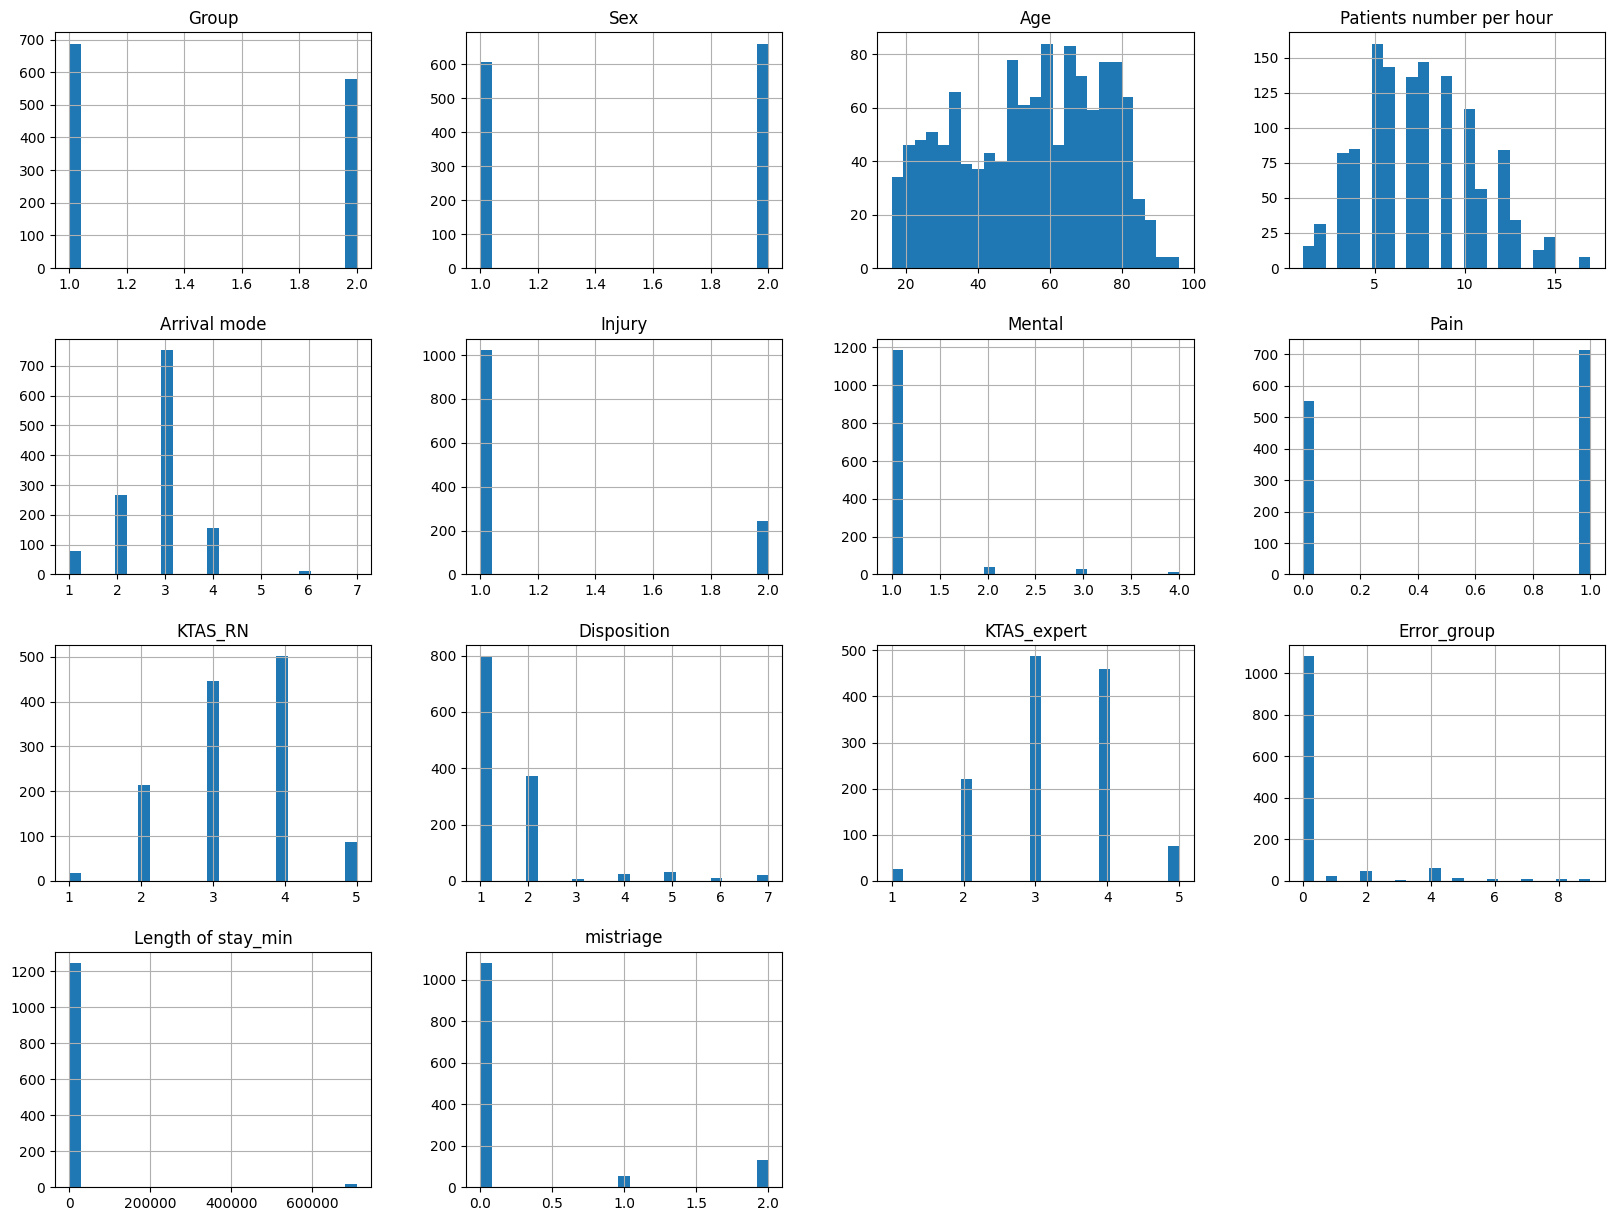

In [63]:
#distribution of all variables histograms
data.hist(bins=25, figsize=(20,15))
plt.show()

## Target Distribution Graph

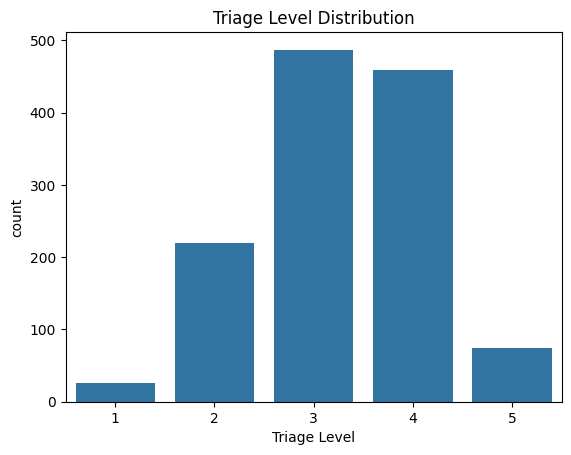

In [64]:
#Plot the distribution of the target variable with x by order
sb.countplot(x='KTAS_expert', data=data)
plt.xlabel('Triage Level')
plt.title('Triage Level Distribution')
plt.show()

# Data Preprocessing

## Feature Engineering

### Replacing "??" and "#BO�!" for null values

In [9]:
data['NRS_pain'] = data[["NRS_pain"]].replace("#BOÞ!",0)


cols_to_clean = ["SBP", "DBP", "HR", "RR", "BT", "Saturation"]
data[cols_to_clean] = data[cols_to_clean].replace("??", np.NaN)

## count how many "??" in selected columns after cleaning
print("\nAfter cleaning:")
for col in cols_to_clean:
    print(f"{col}: {data[col].value_counts().get('??', 0)}")


After cleaning:
SBP: 0
DBP: 0
HR: 0
RR: 0
BT: 0
Saturation: 0


In [66]:
categorical_columns = ['Sex', 'Arrival mode', 'Injury', 'Mental', 'Pain', 'Error_group', 'mistriage']

plt.figure(figsize=(15, 10))
for i, column in enumerate(categorical_columns, 1):
    plt.subplot(3, 3, i)
    sb.countplot(x=column, data=data)
    plt.title(f'{column} Distribution')
    plt.xlabel('')
    plt.ylabel('Count')

plt.tight_layout()
plt.show()

KeyboardInterrupt: 

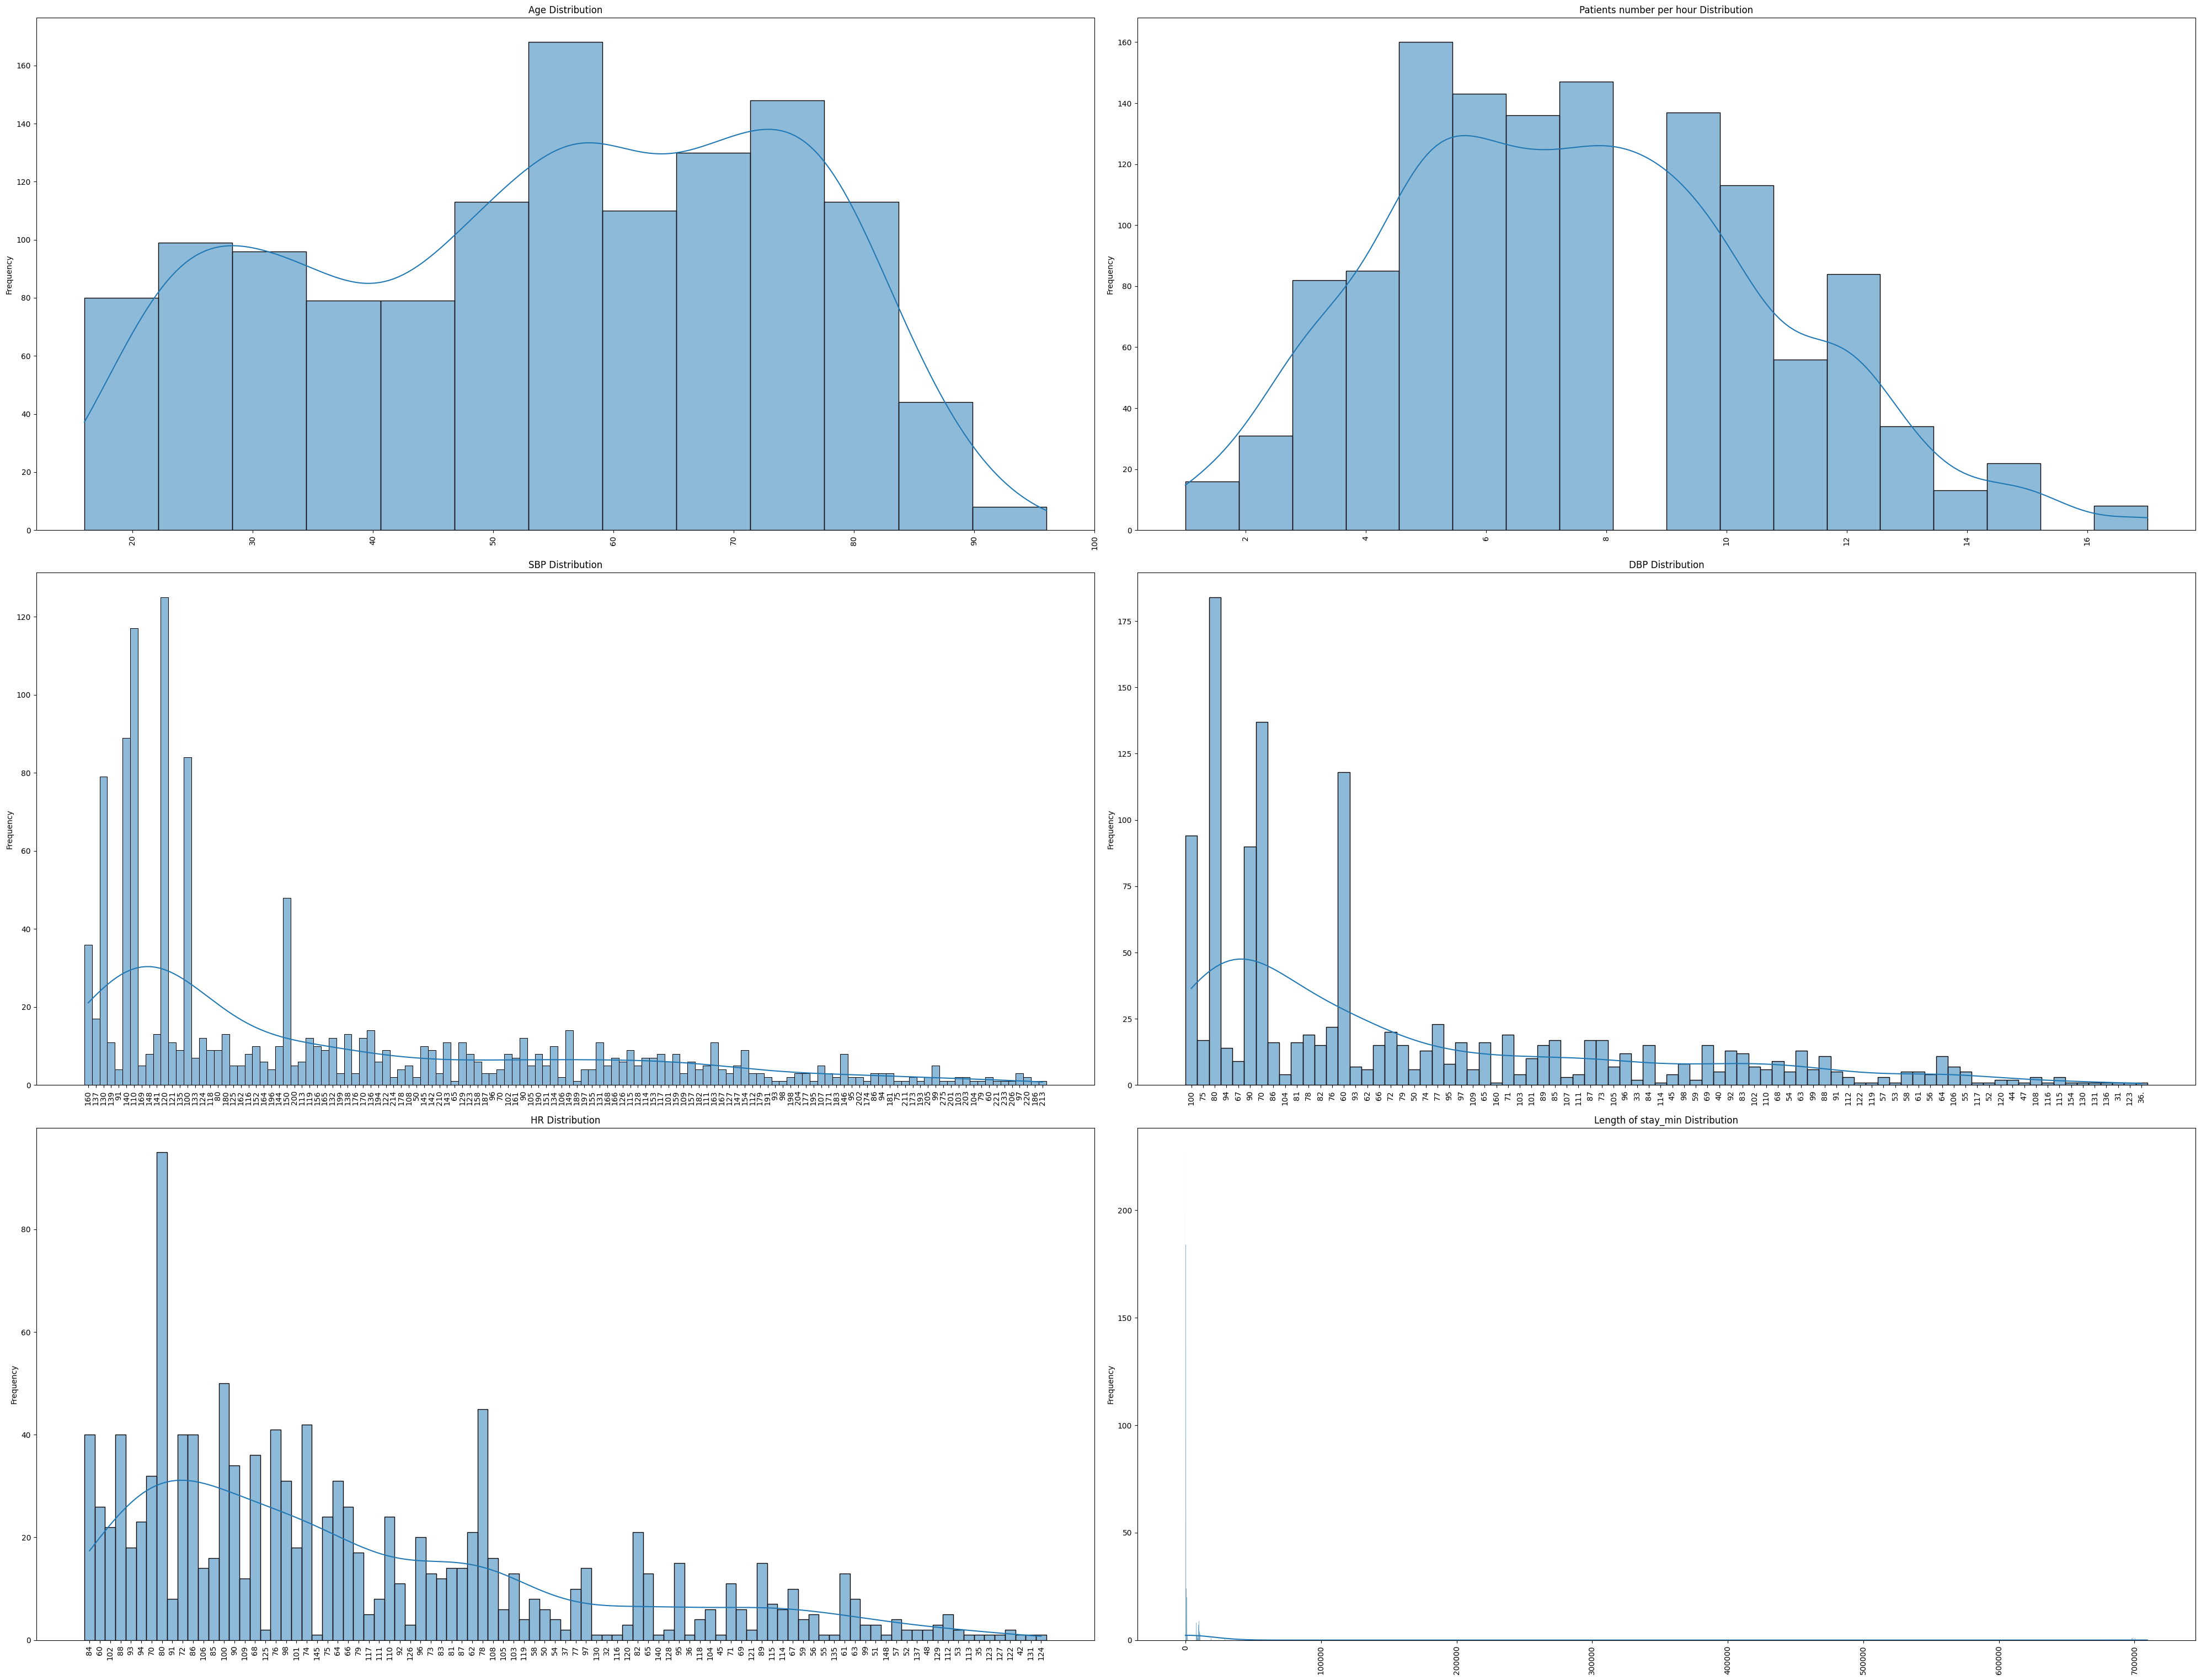

In [ ]:
numeric_columns = ['Age', 'Patients number per hour', 'SBP', 'DBP', 'HR', 'Length of stay_min']

plt.figure(figsize=(40, 40))
for i, column in enumerate(numeric_columns, 1):
    plt.subplot(4, 2, i)
    sb.histplot(data[column], kde=True)
    plt.title(f'{column} Distribution')
    plt.xlabel('')
    plt.xticks(rotation=90)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

### Replacing binary columns

In [10]:
data.rename(columns={'Sex': 'Female'}, inplace=True)
data["Female"] = data["Female"].replace(2,0)

data.rename(columns={'Injury': 'Injured'}, inplace=True)
data["Injured"] = data["Injured"].replace({1: 0, 2: 1})

### Replacing the numbers by their categorical value

In [11]:
group_map = ['Local ED 3th Degree', 'Regional ED 4tg Degree']
arrival_mode_map = ['Walking', 'Public Ambulance', 'Private Vehicle', 'Private Ambulance', 'Public Transport', 'Wheelchair', 'Other']
mental_map = ['Alert', 'Verbal Response', 'Pain Response', 'Unresponsive']
disposition_map = ['Discharge', 'Admission to Ward', 'Admission to ICU', 'Discharge', 'Transfer', 'Death', 'Surgery']
error_group_map = ['Vital Sign', 'Physical Exam', 'Psychatric', 'Pain', 'Mental', 'Underlying Disease', 'Medical Records of other ED', 'On set', 'Other']
mistriage_map = ['Correct','Over Triage', 'Under Triage']


data['Group'] = data['Group'].replace([1,2], group_map)
data['Arrival mode'] = data['Arrival mode'].replace([1,2,3,4,5,6,7], arrival_mode_map)
data['Mental'] = data['Mental'].replace([1,2,3,4], mental_map)
data['Disposition'] = data['Disposition'].replace([1,2,3,4,5,6,7], disposition_map)
data['Error_group'] = data['Error_group'].replace([1,2,3,4,5,6,7,8,9], error_group_map)
data['mistriage'] = data['mistriage'].replace([0,1,2], mistriage_map)

data.head()

,Group,Female,Age,Patients number per hour,Arrival mode,Injured,Chief_complain,Mental,Pain,NRS_pain,SBP,DBP,HR,RR,BT,Saturation,KTAS_RN,Diagnosis in ED,Disposition,KTAS_expert,Error_group,Length of stay_min,KTAS duration_min,mistriage
0,Regional ED 4tg Degree,0,71,3,Private Vehicle,1,right ocular pain,Alert,1,2,160,100,84,18,36.6,100,2,Corneal abrasion,Discharge,4,Physical Exam,86,"5,00",Over Triage
1,Local ED 3th Degree,1,56,12,Private Vehicle,1,right forearm burn,Alert,1,2,137,75,60,20,36.5,NaN,4,"Burn of hand, firts degree dorsum",Discharge,5,Pain,64,"3,95",Over Triage
2,Regional ED 4tg Degree,1,68,8,Public Ambulance,1,"arm pain, Lt",Alert,1,2,130,80,102,20,36.6,98,4,"Fracture of surgical neck of humerus, closed",Admission to Ward,5,Pain,862,"1,00",Over Triage
3,Local ED 3th Degree,0,71,8,Walking,0,ascites tapping,Alert,1,3,139,94,88,20,36.5,NaN,4,Alcoholic liver cirrhosis with ascites,Discharge,5,Underlying Disease,108,"9,83",Over Triage
4,Local ED 3th Degree,0,58,4,Private Vehicle,0,"distension, abd",Alert,1,3,91,67,93,18,36.5,NaN,4,Ascites,Discharge,5,On set,109,"6,60",Over Triage


## Hypothesis

### H1: **Older Patients more likely to be urgent patients**

TRUE: The urgent levels of KTAS triage are 1,2,3 and we can see that the age range of these 3 levels is higher than the range of levels 4 and 5.

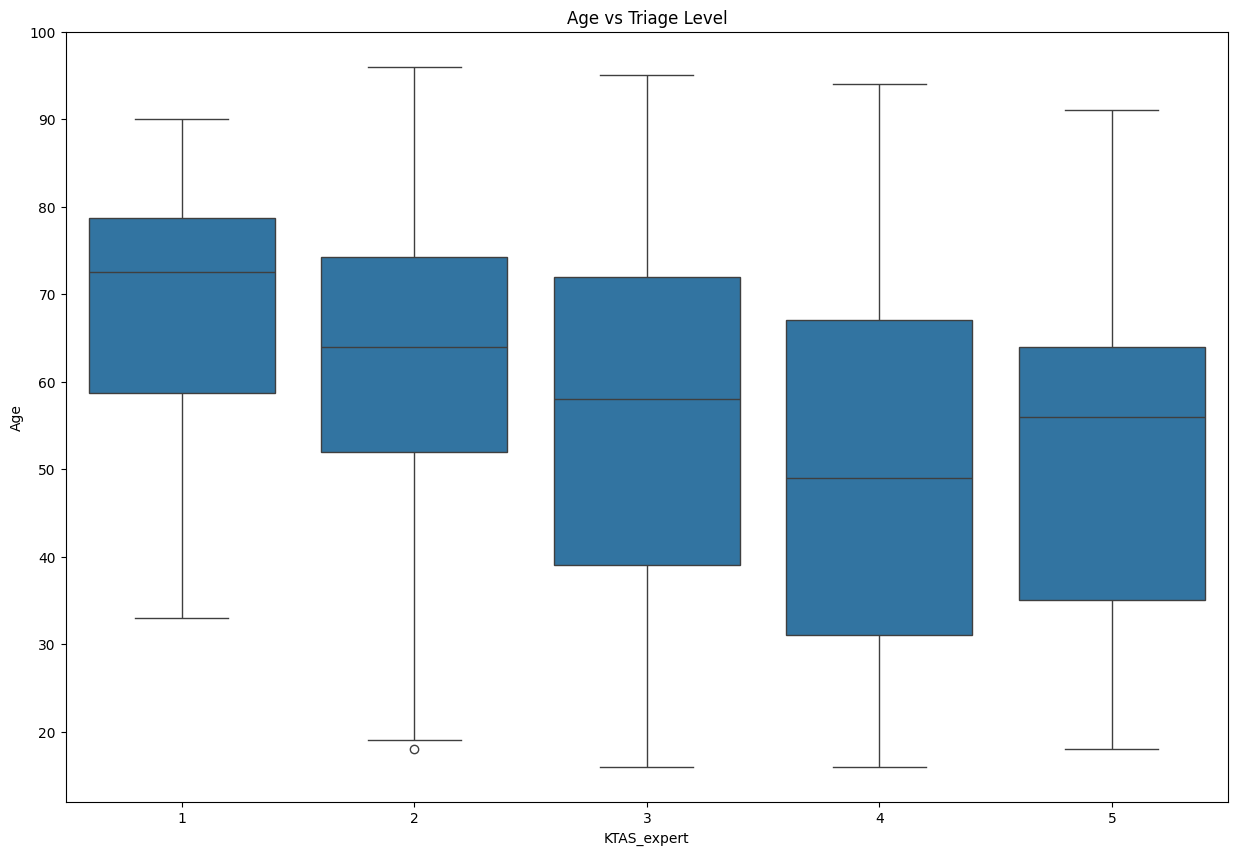

In [ ]:
# Create plot that shows the relation betwwen age and triage level
plt.figure(figsize=(15, 10))
sb.boxplot(x='KTAS_expert', y='Age', data=data)
plt.title('Age vs Triage Level')
plt.show()

### H2: **Patients with higher levels of pain are more likely to be urgent patients**

TRUE: The patients with pain levels above 6 (half) are between levels 1 and 4 of the triage, which means that they are likely to be urgent patients (levels 1/2/3).

BUT: Anyway, we don't think it's a straight line. Because there are some patients with average levels of pain who are not urgent patients.

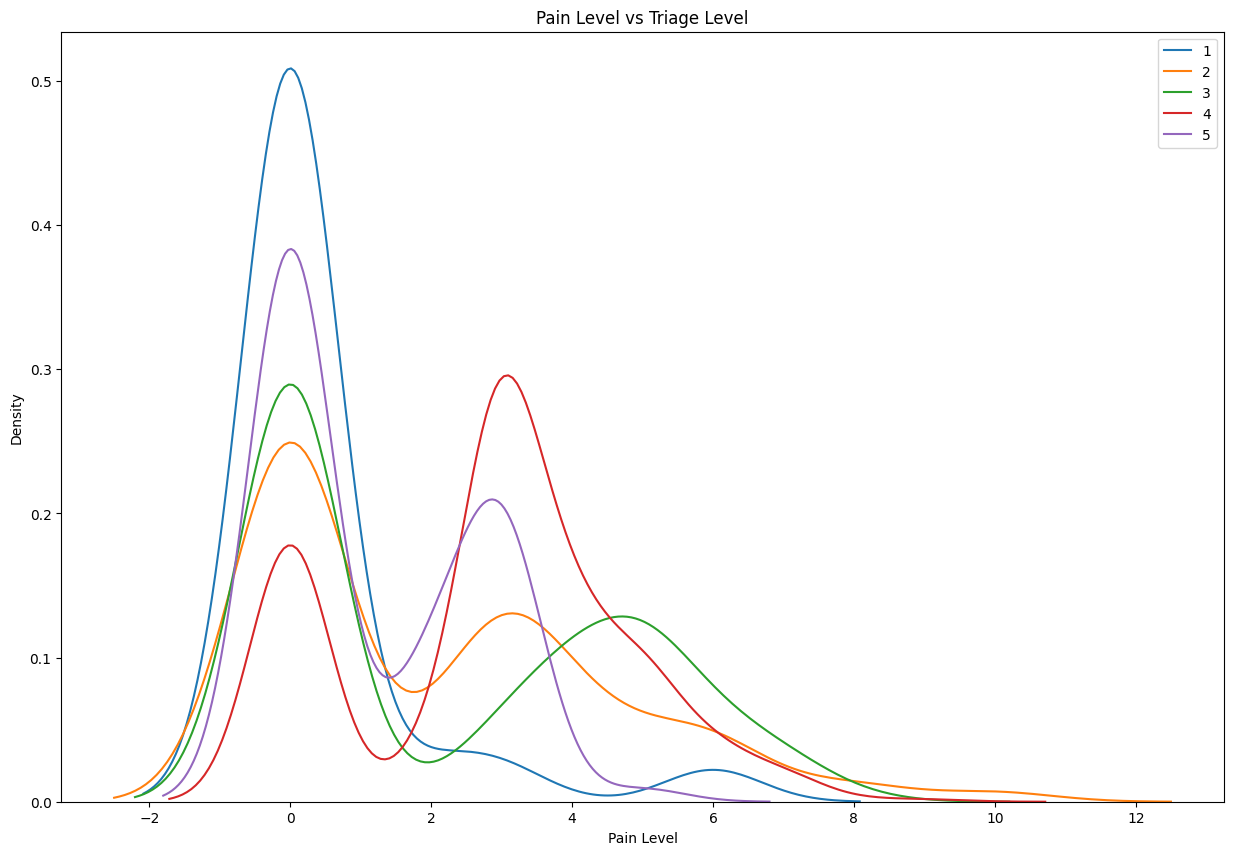

In [ ]:
#Create a plot that shows the relation between pain level and triage level
triage_levels = sorted(data['KTAS_expert'].unique())
data['NRS_pain'] = pd.to_numeric(data['NRS_pain'], errors='coerce')
plt.figure(figsize=(15, 10))
for level in triage_levels:
    sb.kdeplot(data[data['KTAS_expert'] == level]['NRS_pain'], label=level)
plt.title('Pain Level vs Triage Level')
plt.xlabel('Pain Level')
plt.ylabel('Density')
plt.legend()
plt.show()

### H3: **Injured patients are more likely to be urgent patients**

FALSE: The majority of patients with an urgent triage level (1/2/3) are not injured.

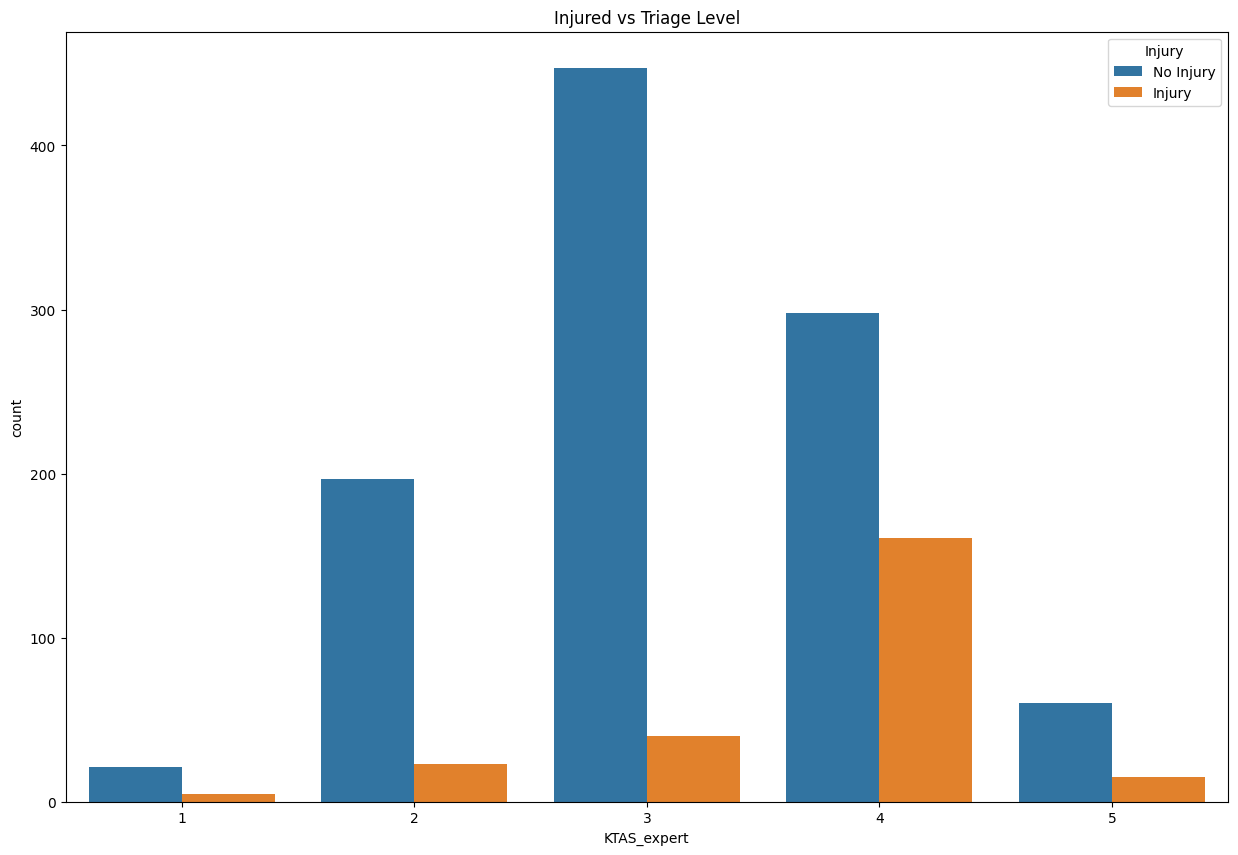

In [ ]:
# Create a plot that shows the relation between injury and triage level
# 1 = No injury, 2 = Injury
# Bar chart
plt.figure(figsize=(15, 10))
sb.countplot(x='KTAS_expert', hue='Injured', data=data)
plt.title('Injured vs Triage Level')
plt.legend(title='Injury', loc='upper right', labels=['No Injury', 'Injury'])
plt.show()


### H4: **Patients with poor mental status are more likely to be urgent patients.**

TRUE: Almost all patients with a mental status other than 'Alert' have triage levels 1, 2 and 3, which means they are urgent patients.

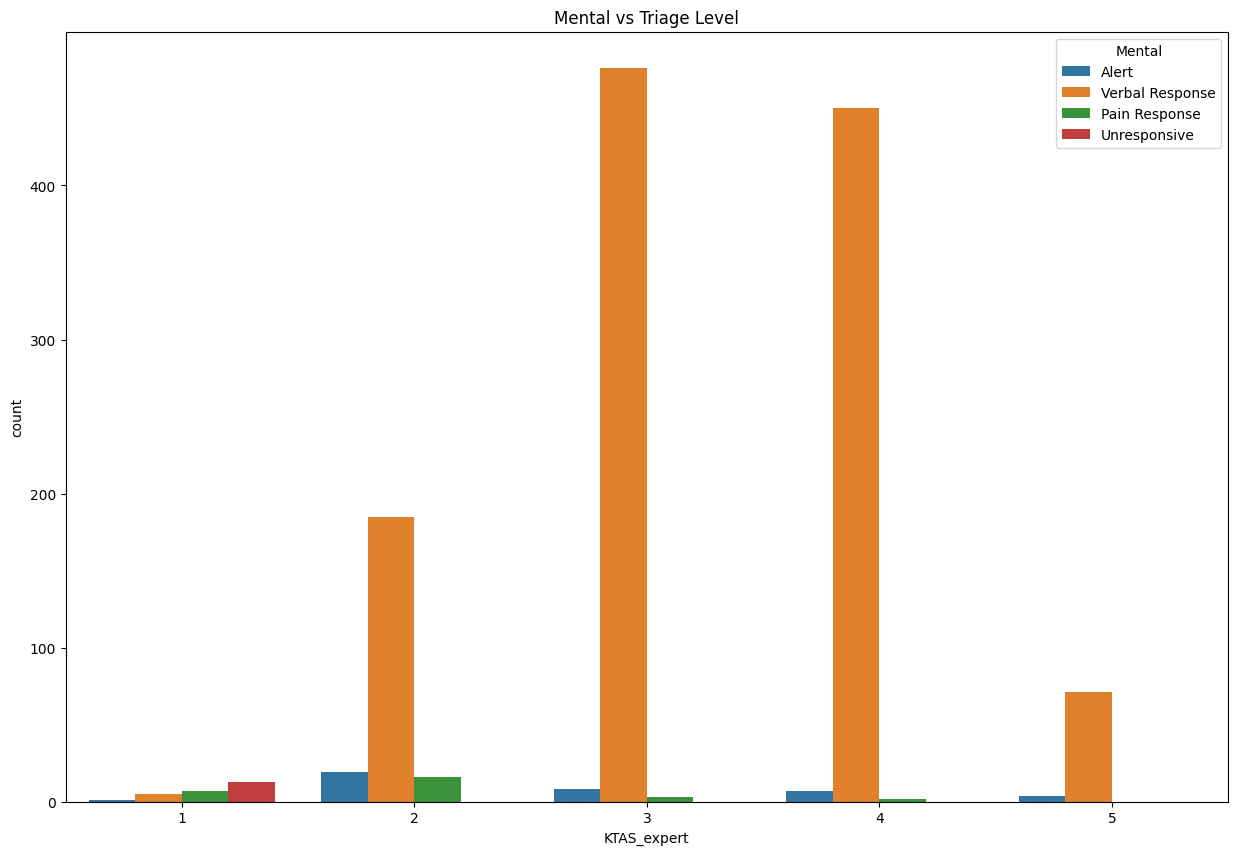

In [ ]:
#Create a plot that shows the relation between mental status and triage level
plt.figure(figsize=(15, 10))
sb.countplot(x='KTAS_expert', hue='Mental', data=data)
plt.title('Mental vs Triage Level')
plt.legend(title='Mental', loc='upper right', labels=['Alert', 'Verbal Response', 'Pain Response', 'Unresponsive'])
plt.show()

### H5: **Patients with higher and lower blood presure are more likely to be urgent patients**
TRUE: Patients with the highest and lowest SBP and DBP are triaged to levels that represent urgent patients

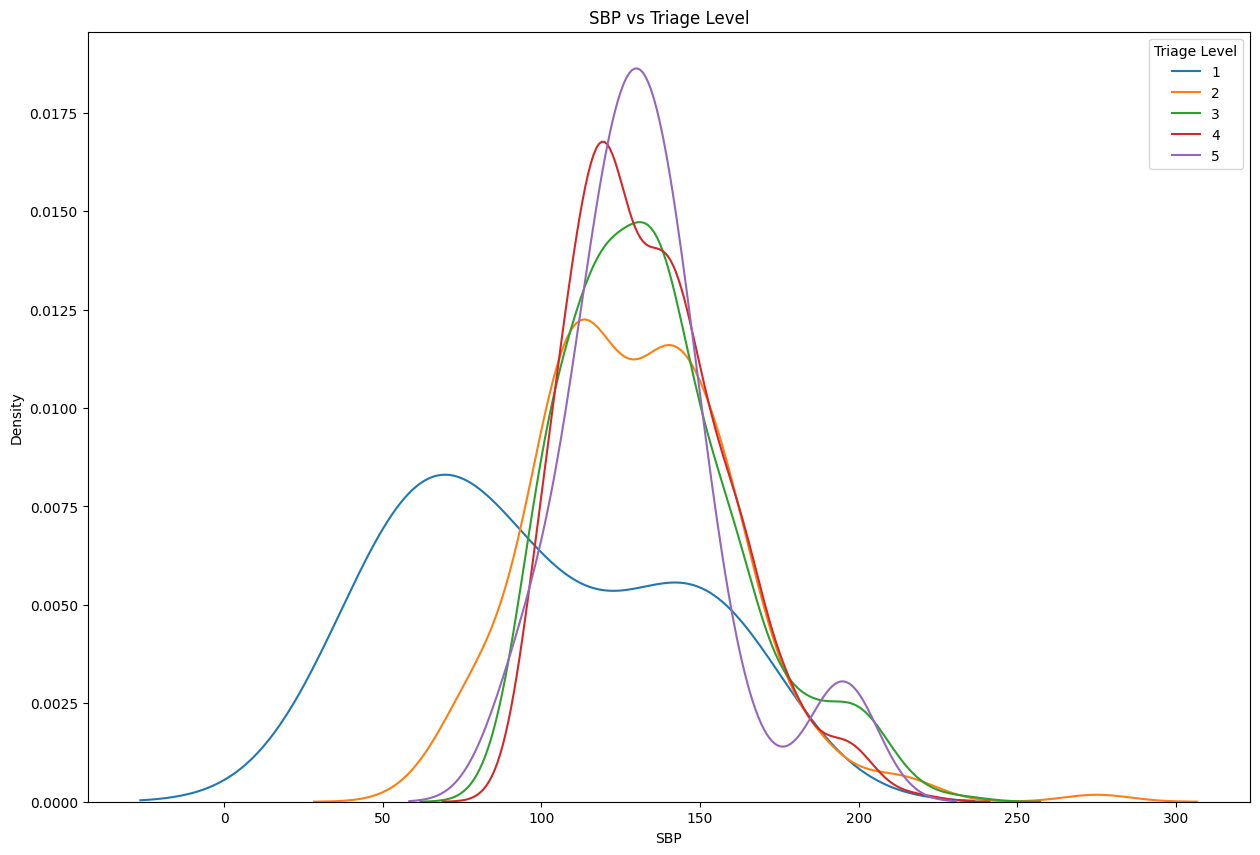

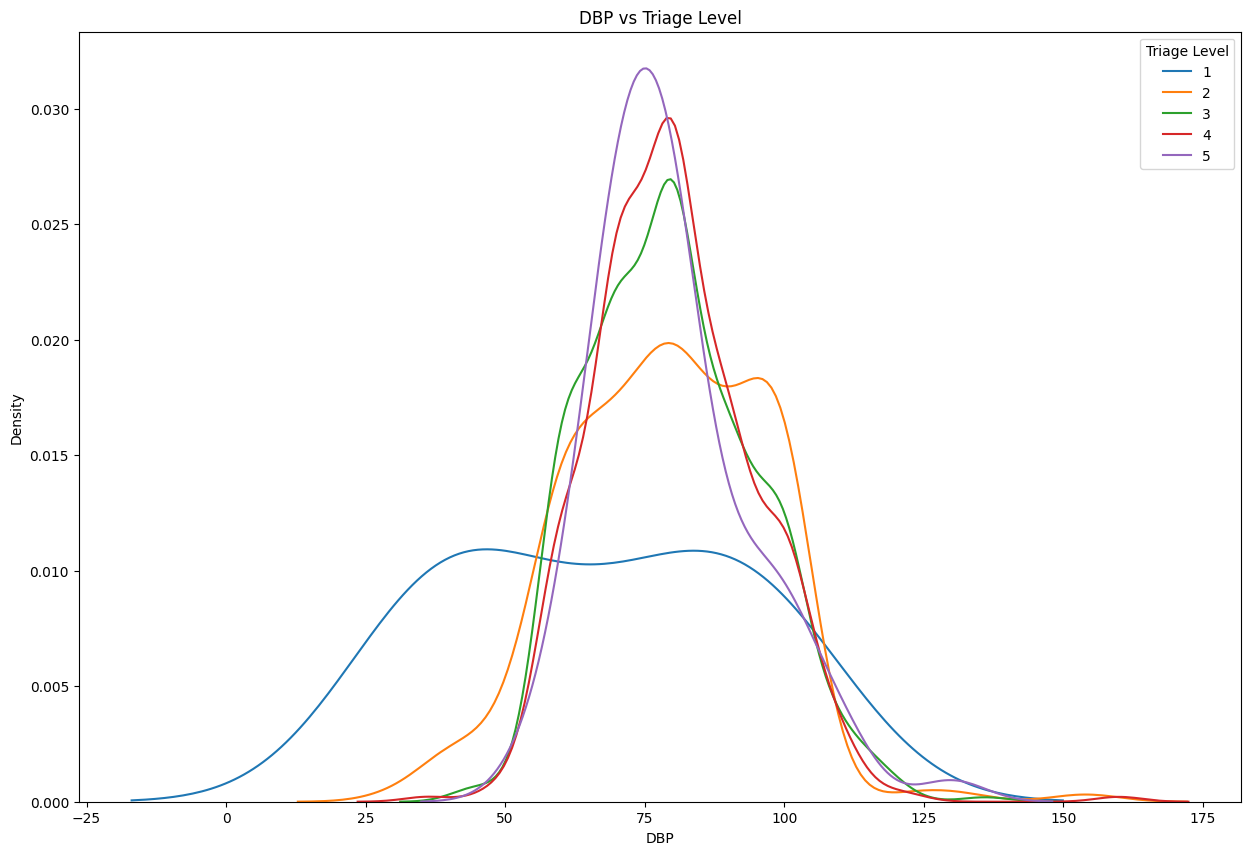

In [ ]:
#Create a plot that shows the relation between SBP and DBP and triage level
data['SBP'] = pd.to_numeric(data['SBP'], errors='coerce')
data['DBP'] = pd.to_numeric(data['DBP'], errors='coerce')

plt.figure(figsize=(15, 10))
for level in triage_levels:
    sb.kdeplot(data[data['KTAS_expert'] == level]['SBP'], label=level)
plt.title('SBP vs Triage Level')
plt.xlabel('SBP')
plt.ylabel('Density')
plt.legend(title='Triage Level')
plt.show()

plt.figure(figsize=(15, 10))
for level in triage_levels:
    sb.kdeplot(data[data['KTAS_expert'] == level]['DBP'], label=level)
plt.title('DBP vs Triage Level')
plt.xlabel('DBP')
plt.ylabel('Density')
plt.legend(title='Triage Level')
plt.show()


### H6: **Patients with higher and lower HR are more likely to be urgent patients**
TRUE: The density of patients with the highest and lowest HR are in levels 1/2/3 of the triage, which means they are urgent patients.

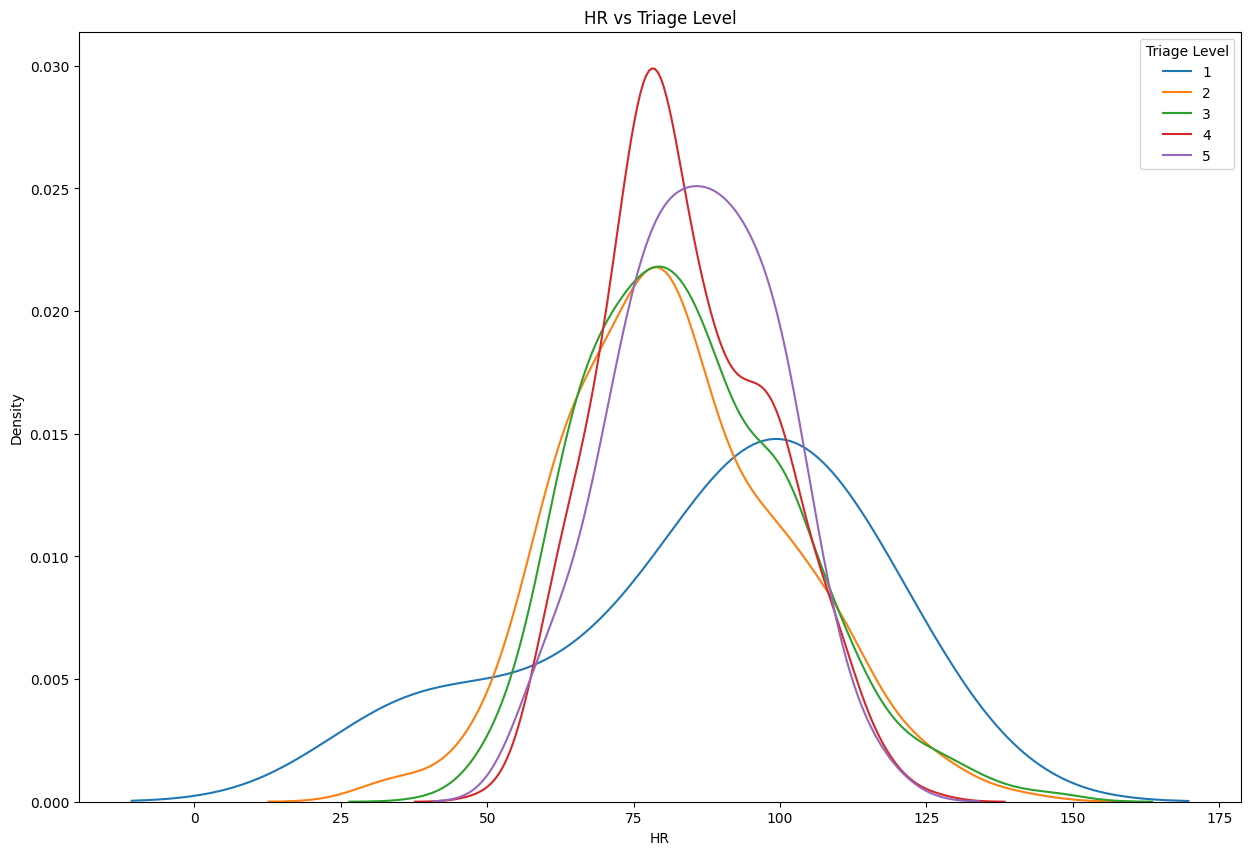

In [ ]:
#Create a plot that shows the relation between HR and triage level
data['HR'] = pd.to_numeric(data['HR'], errors='coerce')

plt.figure(figsize=(15, 10))
for level in triage_levels:
    sb.kdeplot(data[data['KTAS_expert'] == level]['HR'], label=level)
plt.title('HR vs Triage Level')
plt.xlabel('HR')
plt.ylabel('Density')
plt.legend(title='Triage Level')
plt.show()

### H7: **Patients with higher and lower RR are more likely to be urgent patients**
TRUE FOR THE HIGHER LEVELS: The density of patients with the higher RRs are in levels 1/2/3 of the triage, which means they are urgent patients.

FALSE FOR THE LOWER LEVELS: The density of patients with the lower RRs is distributed for each level of triage.

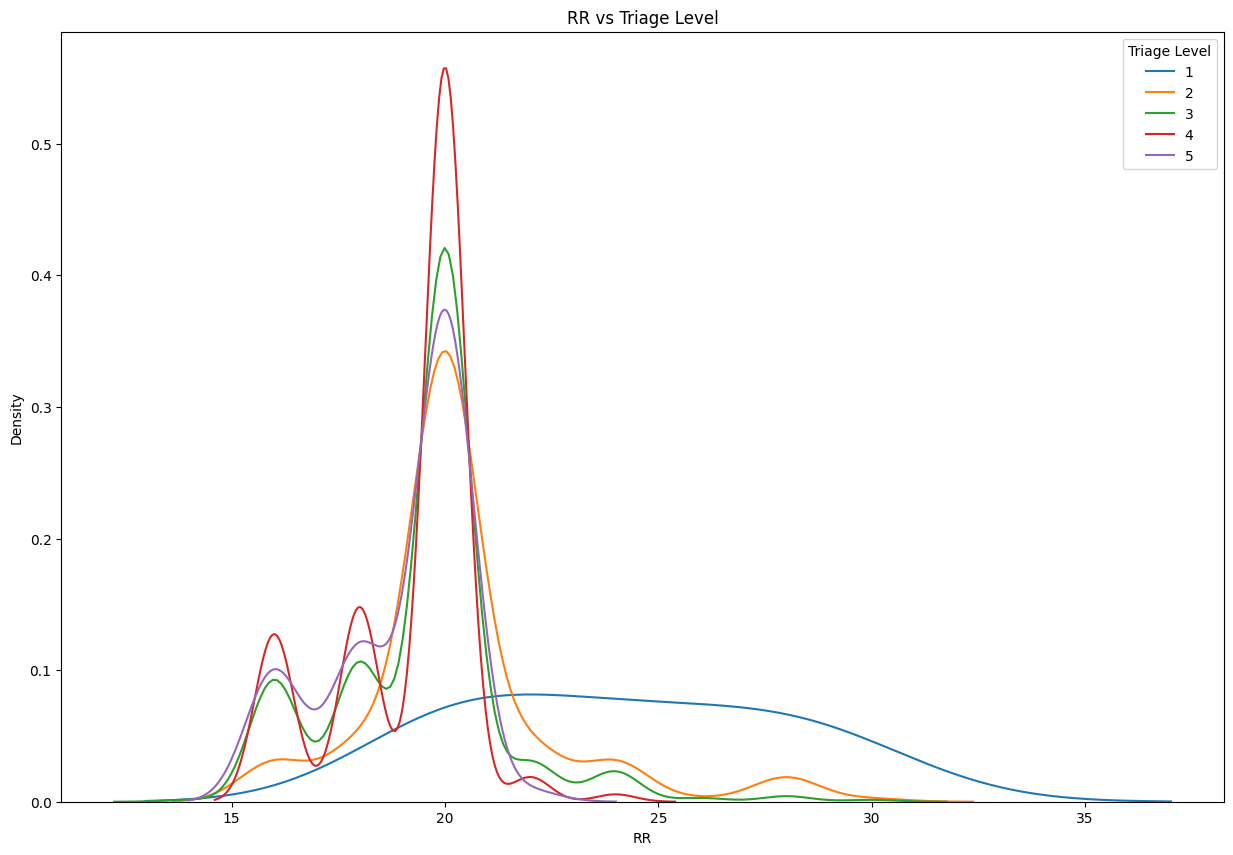

In [ ]:
data['RR'] = pd.to_numeric(data['RR'], errors='coerce')

plt.figure(figsize=(15, 10))
for level in triage_levels:
    sb.kdeplot(data[data['KTAS_expert'] == level]['RR'], label=level)
plt.title('RR vs Triage Level')
plt.xlabel('RR')
plt.ylabel('Density')
plt.legend(title='Triage Level')
plt.show()


### H8: **Patients with higher BT are more likely to be urgent patients**
TRUE FOR EXTREMELY HIGH BT: For extremely high BT (>39), the majority of patients are in level 2 triage, which means they are urgent patients.

FALSE FOR NOT TOO HIGH BT: For standard higher BT (>37 and <39), the density of patients is distributed in each level of triage.

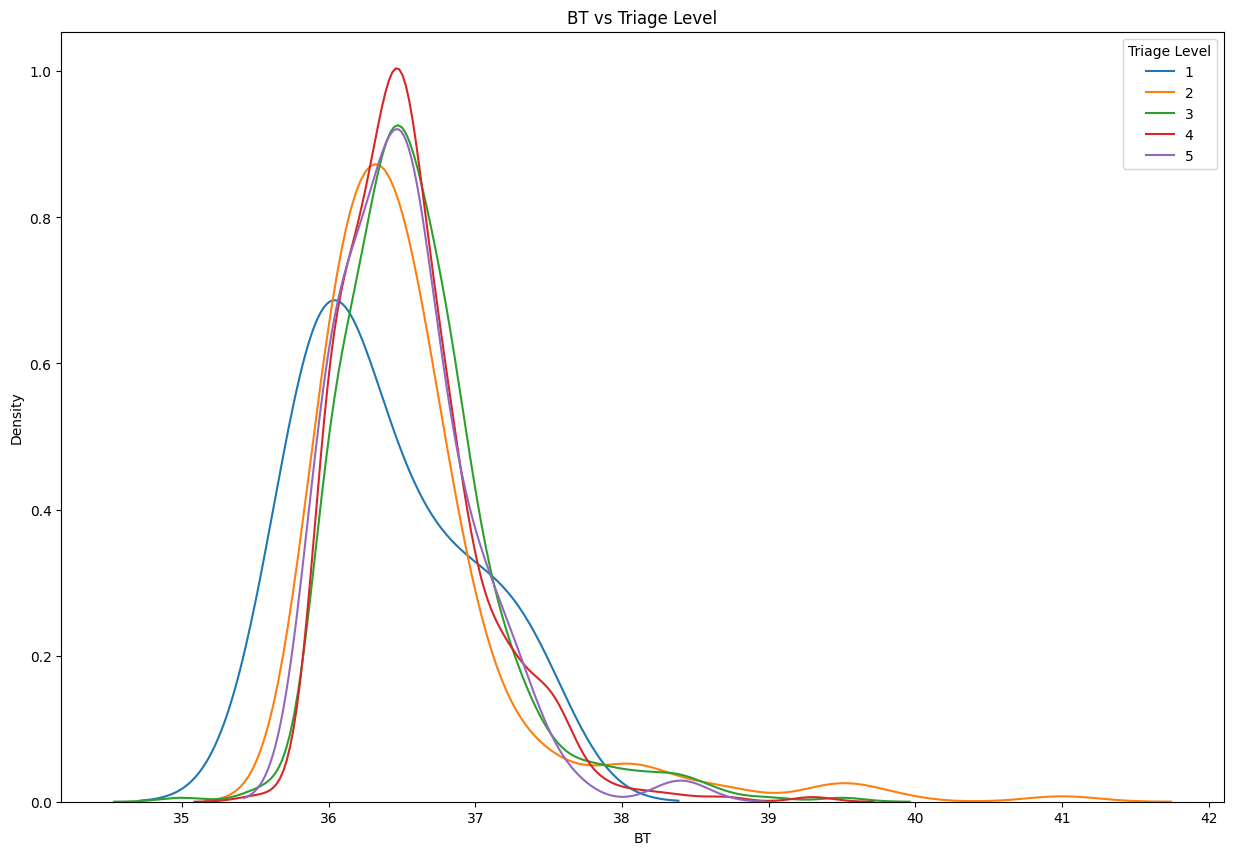

In [ ]:
data['BT'] = pd.to_numeric(data['BT'], errors='coerce')

plt.figure(figsize=(15, 10))
for level in triage_levels:
    sb.kdeplot(data[data['KTAS_expert'] == level]['BT'], label=level)
plt.title('BT vs Triage Level')
plt.xlabel('BT')
plt.ylabel('Density')
plt.legend(title='Triage Level')
plt.show()

### H9: **Patients with lower Saturation values are more likely to be urgent patients**
TRUE: Patients with saturations below 90 +/- are in triage levels 1/2/3, which means they are urgent patients.

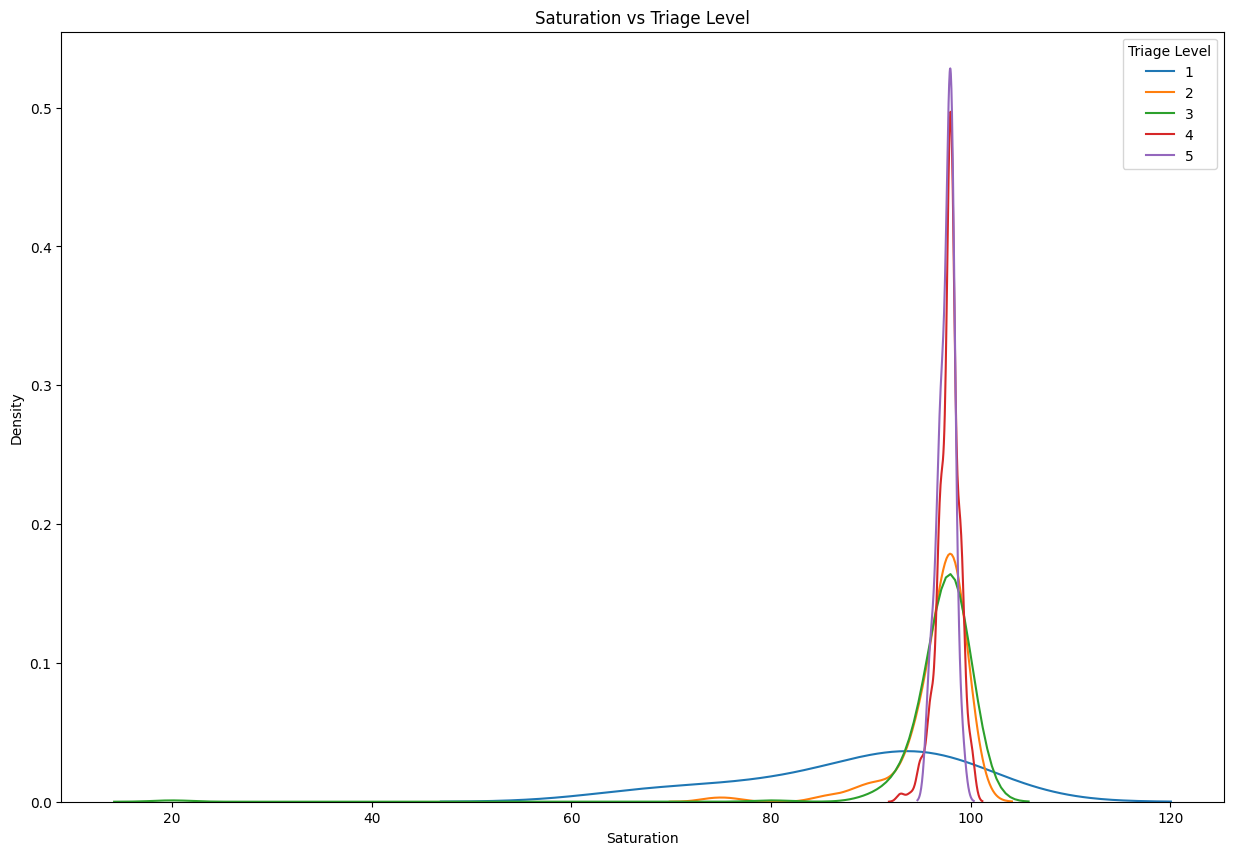

In [ ]:
data['Saturation'] = pd.to_numeric(data['Saturation'], errors='coerce')

plt.figure(figsize=(15, 10))
for level in triage_levels:
    sb.kdeplot(data[data['KTAS_expert'] == level]['Saturation'], label=level)
plt.title('Saturation vs Triage Level')
plt.xlabel('Saturation')
plt.ylabel('Density')
plt.legend(title='Triage Level')
plt.show()

## Feature Imputation

### Checking all missing values



In [12]:
missing_values = [column for column in data.columns if data[column].isnull().sum() > 0]
for column in missing_values:
  print('Column ', column, ' has ', data[column].isnull().sum(), ' missing values')

Column  SBP  has  25  missing values
Column  DBP  has  29  missing values
Column  HR  has  20  missing values
Column  RR  has  22  missing values
Column  BT  has  18  missing values
Column  Saturation  has  697  missing values
Column  Diagnosis in ED  has  2  missing values


### Imputing integer values

In [13]:
from sklearn.impute import SimpleImputer

columns_to_impute = ['SBP', 'DBP', 'HR', 'RR', 'Saturation']
imp = SimpleImputer(missing_values=np.NaN, strategy='median')
for column in columns_to_impute:
    data[column] = imp.fit_transform(data[[column]])

### Imputing real values

In [14]:
from sklearn.impute import SimpleImputer

imp = SimpleImputer(missing_values=np.NaN, strategy='mean')
data['BT'] = imp.fit_transform(data[['BT']])

### Imputing categorical values

In [15]:
data['Diagnosis in ED'] = data['Diagnosis in ED'].fillna('No Diagnosis')

In [16]:
#Convert to int type sbp and bdp
data['SBP'] = data['SBP'].astype(str).astype(float)
data['DBP'] = data['DBP'].astype(str).astype(float)

# Values
# Normal
#   SBP < 120 e DBP < 80
# Elevated (Pre-hypertension)
#   SBP 120-129 ou DBP < 80
# Hypertension 
#   SBP > 130 ou DBP > 80
# Hypertensive crises 
#   SBP > 180 ou DBP > 110

#Create new column for blood pressure category with 4 categories based on values above
data.loc[(data['SBP'] < 120) & (data['DBP'] < 80), 'Blood Pressure'] = 'Normal'
data.loc[(data['SBP'] >= 120) & (data['SBP'] <= 129) | (data['DBP'] < 80), 'Blood Pressure'] = 'Elevated'
data.loc[(data['SBP'] >= 130) | (data['DBP'] >= 80), 'Blood Pressure'] = 'Hypertension'
data.loc[(data['SBP'] >= 180) | (data['DBP'] >= 110), 'Blood Pressure'] = 'Hypertensive crises'


In [13]:
data.head()

,Group,Female,Age,Patients number per hour,Arrival mode,Injured,Chief_complain,Mental,Pain,NRS_pain,SBP,DBP,HR,RR,BT,Saturation,KTAS_RN,Diagnosis in ED,Disposition,KTAS_expert,Error_group,Length of stay_min,KTAS duration_min,mistriage,Blood Pressure
0,Regional ED 4tg Degree,0,71,3,Private Vehicle,1,right ocular pain,Alert,1,2,160.0,100.0,84.0,18.0,36.6,100.0,2,Corneal abrasion,Discharge,4,Physical Exam,86,"5,00",Over Triage,Hypertension
1,Local ED 3th Degree,1,56,12,Private Vehicle,1,right forearm burn,Alert,1,2,137.0,75.0,60.0,20.0,36.5,98.0,4,"Burn of hand, firts degree dorsum",Discharge,5,Pain,64,"3,95",Over Triage,Hypertension
2,Regional ED 4tg Degree,1,68,8,Public Ambulance,1,"arm pain, Lt",Alert,1,2,130.0,80.0,102.0,20.0,36.6,98.0,4,"Fracture of surgical neck of humerus, closed",Admission to Ward,5,Pain,862,"1,00",Over Triage,Hypertension
3,Local ED 3th Degree,0,71,8,Walking,0,ascites tapping,Alert,1,3,139.0,94.0,88.0,20.0,36.5,98.0,4,Alcoholic liver cirrhosis with ascites,Discharge,5,Underlying Disease,108,"9,83",Over Triage,Hypertension
4,Local ED 3th Degree,0,58,4,Private Vehicle,0,"distension, abd",Alert,1,3,91.0,67.0,93.0,18.0,36.5,98.0,4,Ascites,Discharge,5,On set,109,"6,60",Over Triage,Elevated


## Feature Encondig

In [17]:
data = pd.get_dummies(data, columns=['Group','Mental','Arrival mode','Disposition','Error_group','mistriage','Blood Pressure'],dtype='int64')
data.head()

,Female,Age,Patients number per hour,Injured,Chief_complain,Pain,NRS_pain,SBP,DBP,HR,RR,BT,Saturation,KTAS_RN,Diagnosis in ED,KTAS_expert,Length of stay_min,KTAS duration_min,Group_Local ED 3th Degree,Group_Regional ED 4tg Degree,Mental_Alert,Mental_Pain Response,Mental_Unresponsive,Mental_Verbal Response,Arrival mode_Other,Arrival mode_Private Ambulance,Arrival mode_Private Vehicle,Arrival mode_Public Ambulance,Arrival mode_Public Transport,Arrival mode_Walking,Arrival mode_Wheelchair,Disposition_Admission to ICU,Disposition_Admission to Ward,Disposition_Death,Disposition_Discharge,Disposition_Surgery,Disposition_Transfer,Error_group_0,Error_group_Medical Records of other ED,Error_group_Mental,Error_group_On set,Error_group_Other,Error_group_Pain,Error_group_Physical Exam,Error_group_Psychatric,Error_group_Underlying Disease,Error_group_Vital Sign,mistriage_Correct,mistriage_Over Triage,mistriage_Under Triage,Blood Pressure_Elevated,Blood Pressure_Hypertension,Blood Pressure_Hypertensive crises
0,0,71,3,1,right ocular pain,1,2,160.0,100.0,84.0,18.0,36.6,100.0,2,Corneal abrasion,4,86,"5,00",0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0
1,1,56,12,1,right forearm burn,1,2,137.0,75.0,60.0,20.0,36.5,98.0,4,"Burn of hand, firts degree dorsum",5,64,"3,95",1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0
2,1,68,8,1,"arm pain, Lt",1,2,130.0,80.0,102.0,20.0,36.6,98.0,4,"Fracture of surgical neck of humerus, closed",5,862,"1,00",0,1,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0
3,0,71,8,0,ascites tapping,1,3,139.0,94.0,88.0,20.0,36.5,98.0,4,Alcoholic liver cirrhosis with ascites,5,108,"9,83",1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0
4,0,58,4,0,"distension, abd",1,3,91.0,67.0,93.0,18.0,36.5,98.0,4,Ascites,5,109,"6,60",1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0


In [18]:
# For each of this string in Chief_complain
# 1. Create a new column with the same name
# 2. If the patient has this chief complain, set the value to 1, otherwise 0
map_columns = {
    'abd pain': 'Abdominal Pain',
    'dyspnea': 'Dyspnea',
    'dizziness': 'Dizziness',
    'fever': 'Fever',
    'ant. chest pain': 'Anterior Chest Pain',
    'Open Wound': 'Open Wound',
    'headache': 'Headache',
    'epigastric pain': 'Epigastric Pain',
    'mental change': 'Mental Change',
    'general weakness': 'General Weakness',
    'vomiting': 'Vomiting',
    'pain, chest': 'Chest Pain'
}

for key, value in map_columns.items():
    #Create new column with the same name
    data[value] = 0
    #Set value to 1 if the patient has this chief complain
    data.loc[data['Chief_complain'].str.contains(key, case=False), value] = 1



In [19]:
data.head()

,Female,Age,Patients number per hour,Injured,Chief_complain,Pain,NRS_pain,SBP,DBP,HR,RR,BT,Saturation,KTAS_RN,Diagnosis in ED,KTAS_expert,Length of stay_min,KTAS duration_min,Group_Local ED 3th Degree,Group_Regional ED 4tg Degree,Mental_Alert,Mental_Pain Response,Mental_Unresponsive,Mental_Verbal Response,Arrival mode_Other,Arrival mode_Private Ambulance,Arrival mode_Private Vehicle,Arrival mode_Public Ambulance,Arrival mode_Public Transport,Arrival mode_Walking,Arrival mode_Wheelchair,Disposition_Admission to ICU,Disposition_Admission to Ward,Disposition_Death,Disposition_Discharge,Disposition_Surgery,Disposition_Transfer,Error_group_0,Error_group_Medical Records of other ED,Error_group_Mental,Error_group_On set,Error_group_Other,Error_group_Pain,Error_group_Physical Exam,Error_group_Psychatric,Error_group_Underlying Disease,Error_group_Vital Sign,mistriage_Correct,mistriage_Over Triage,mistriage_Under Triage,Blood Pressure_Elevated,Blood Pressure_Hypertension,Blood Pressure_Hypertensive crises,Abdominal Pain,Dyspnea,Dizziness,Fever,Anterior Chest Pain,Open Wound,Headache,Epigastric Pain,Mental Change,General Weakness,Vomiting,Chest Pain
0,0,71,3,1,right ocular pain,1,2,160.0,100.0,84.0,18.0,36.6,100.0,2,Corneal abrasion,4,86,"5,00",0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1,56,12,1,right forearm burn,1,2,137.0,75.0,60.0,20.0,36.5,98.0,4,"Burn of hand, firts degree dorsum",5,64,"3,95",1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,68,8,1,"arm pain, Lt",1,2,130.0,80.0,102.0,20.0,36.6,98.0,4,"Fracture of surgical neck of humerus, closed",5,862,"1,00",0,1,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,71,8,0,ascites tapping,1,3,139.0,94.0,88.0,20.0,36.5,98.0,4,Alcoholic liver cirrhosis with ascites,5,108,"9,83",1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,58,4,0,"distension, abd",1,3,91.0,67.0,93.0,18.0,36.5,98.0,4,Ascites,5,109,"6,60",1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0


## Feature Selection

In the process of refining our dataset, we aim to streamline and concentrate on elements directly associated with patient self-reporting. Given the nature of the dataset, which encompasses various hospital-related variables, we have decided to prune certain columns to prioritize aspects that individuals can personally provide. 
The following were removed:
- Patients number per hour
- Chief's Complain
- KTAS_RN
- Diagnosis in ED
- Length of stay
- KTAS duration minimum
- Group
- Disposition
- Error Group
- Mistriage

In [20]:
columns_to_drop = ['Patients number per hour', 'KTAS_RN', 'Diagnosis in ED', 'Length of stay_min', 'KTAS duration_min', 'SBP', 'DBP', 'Chief_complain']

columns_to_drop += list(data.filter(regex='Group_'))
columns_to_drop += list(data.filter(regex='Disposition_'))
columns_to_drop += list(data.filter(regex='Error_group_'))
columns_to_drop += list(data.filter(regex='mistriage_'))

data.drop(columns=columns_to_drop, inplace=True)


data.head()

,Female,Age,Injured,Pain,NRS_pain,HR,RR,BT,Saturation,KTAS_expert,Mental_Alert,Mental_Pain Response,Mental_Unresponsive,Mental_Verbal Response,Arrival mode_Other,Arrival mode_Private Ambulance,Arrival mode_Private Vehicle,Arrival mode_Public Ambulance,Arrival mode_Public Transport,Arrival mode_Walking,Arrival mode_Wheelchair,Blood Pressure_Elevated,Blood Pressure_Hypertension,Blood Pressure_Hypertensive crises,Abdominal Pain,Dyspnea,Dizziness,Fever,Anterior Chest Pain,Open Wound,Headache,Epigastric Pain,Mental Change,General Weakness,Vomiting,Chest Pain
0,0,71,1,1,2,84.0,18.0,36.6,100.0,4,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1,56,1,1,2,60.0,20.0,36.5,98.0,5,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,68,1,1,2,102.0,20.0,36.6,98.0,5,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,71,0,1,3,88.0,20.0,36.5,98.0,5,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,58,0,1,3,93.0,18.0,36.5,98.0,5,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0


### Correlation Matrix

In [ ]:
# Correlation matrix
correlation_matrix = data.corr()
# Extract correlations with the target variable
target_correlations = correlation_matrix['KTAS_expert'].sort_values(ascending=False)

# Print top correlated features
print("Top correlated features with KTAS_expert:")
print(target_correlations)


Top correlated features with KTAS_expert:
KTAS_expert                       1.000000
Arrival mode_Private Vehicle      0.299012
Mental_Alert                      0.297879
Injured                           0.210452
Pain                              0.183484
Saturation                        0.141410
NRS_pain                          0.084927
SBP                               0.066114
Arrival mode_Walking              0.051564
HR                                0.036226
DBP                               0.034369
Arrival mode_Wheelchair           0.023573
Female                           -0.005684
Arrival mode_Other               -0.011944
BT                               -0.014651
Arrival mode_Public Transport    -0.034397
Mental_Verbal Response           -0.084497
Arrival mode_Public Ambulance    -0.163605
Mental_Pain Response             -0.214934
Age                              -0.229602
RR                               -0.242843
Mental_Unresponsive              -0.260564
Arrival mode

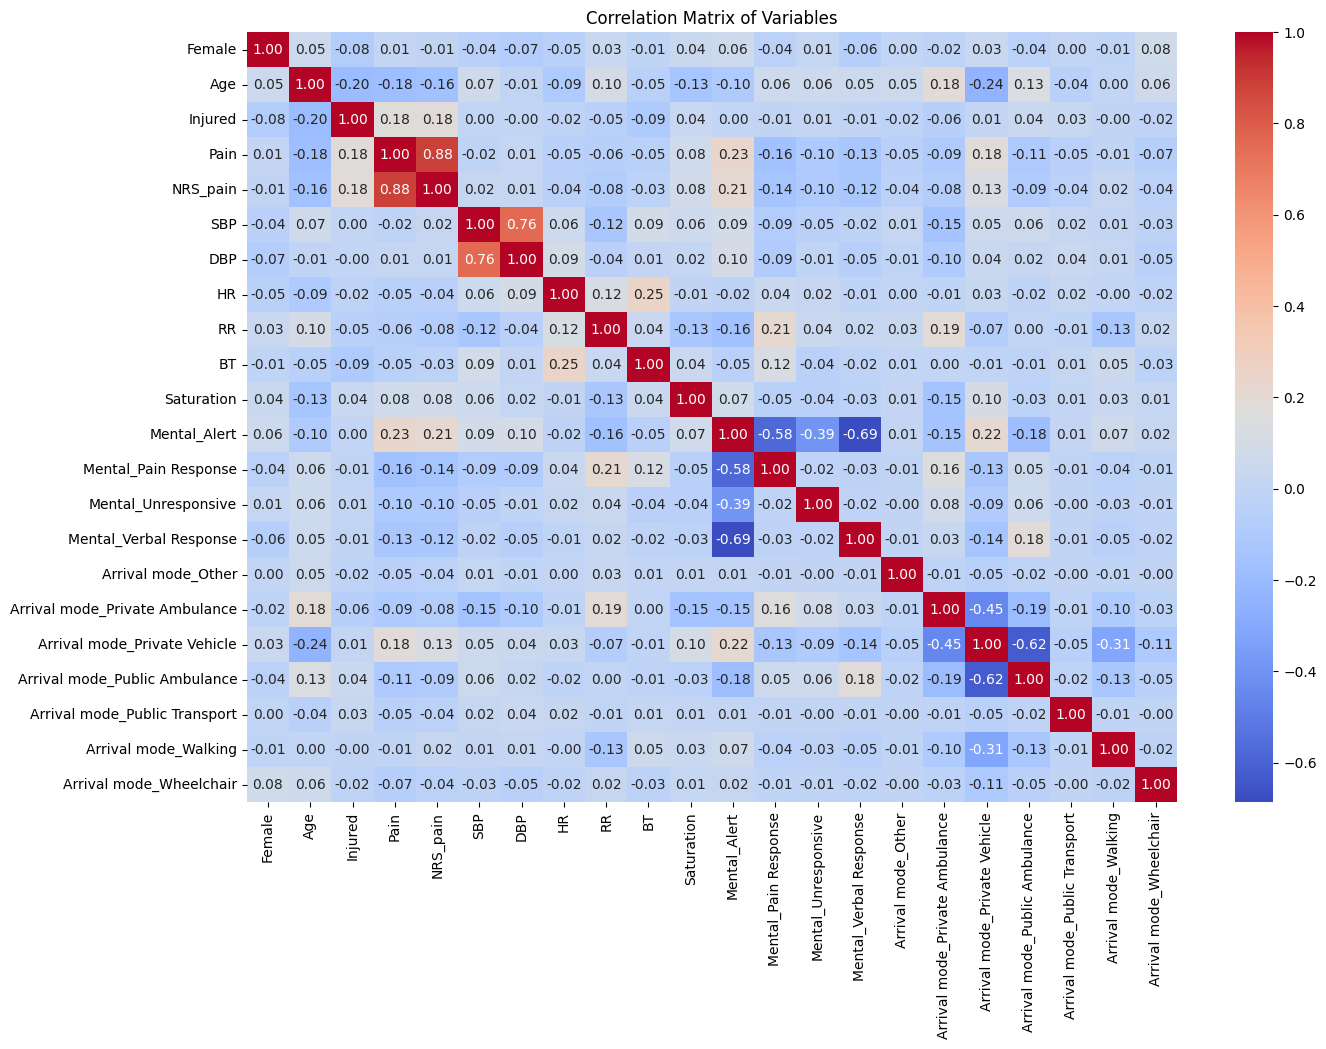

In [ ]:
corr_data = data.drop(['KTAS_expert'], axis=1)

# Create correlation matrix
corr = corr_data.corr()

# Plotting the correlation matrix using a heatmap
plt.figure(figsize=(15, 10))
sb.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of Variables')
plt.show()

In [16]:
y = data['KTAS_expert'].astype('int')

In [17]:
y.unique()

array([4, 5, 3, 2, 1])

In [18]:
# map the target variable to be 0 1 2 3 4 instead of 1 2 3 4 5
y = y - 1

## Standardization and Normalization

Normalization scales the values of different features to a similar range

array([[<Axes: title={'center': 'Female'}>,
        <Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'Injured'}>,
        <Axes: title={'center': 'Pain'}>, <Axes: title={'center': 'HR'}>,
        <Axes: title={'center': 'RR'}>],
       [<Axes: title={'center': 'BT'}>,
        <Axes: title={'center': 'Saturation'}>,
        <Axes: title={'center': 'KTAS_expert'}>,
        <Axes: title={'center': 'Mental_Alert'}>,
        <Axes: title={'center': 'Mental_Pain Response'}>,
        <Axes: title={'center': 'Mental_Unresponsive'}>],
       [<Axes: title={'center': 'Mental_Verbal Response'}>,
        <Axes: title={'center': 'Arrival mode_Other'}>,
        <Axes: title={'center': 'Arrival mode_Private Ambulance'}>,
        <Axes: title={'center': 'Arrival mode_Private Vehicle'}>,
        <Axes: title={'center': 'Arrival mode_Public Ambulance'}>,
        <Axes: title={'center': 'Arrival mode_Public Transport'}>],
       [<Axes: title={'center': 'Arrival mode_Walking'}>,
        <

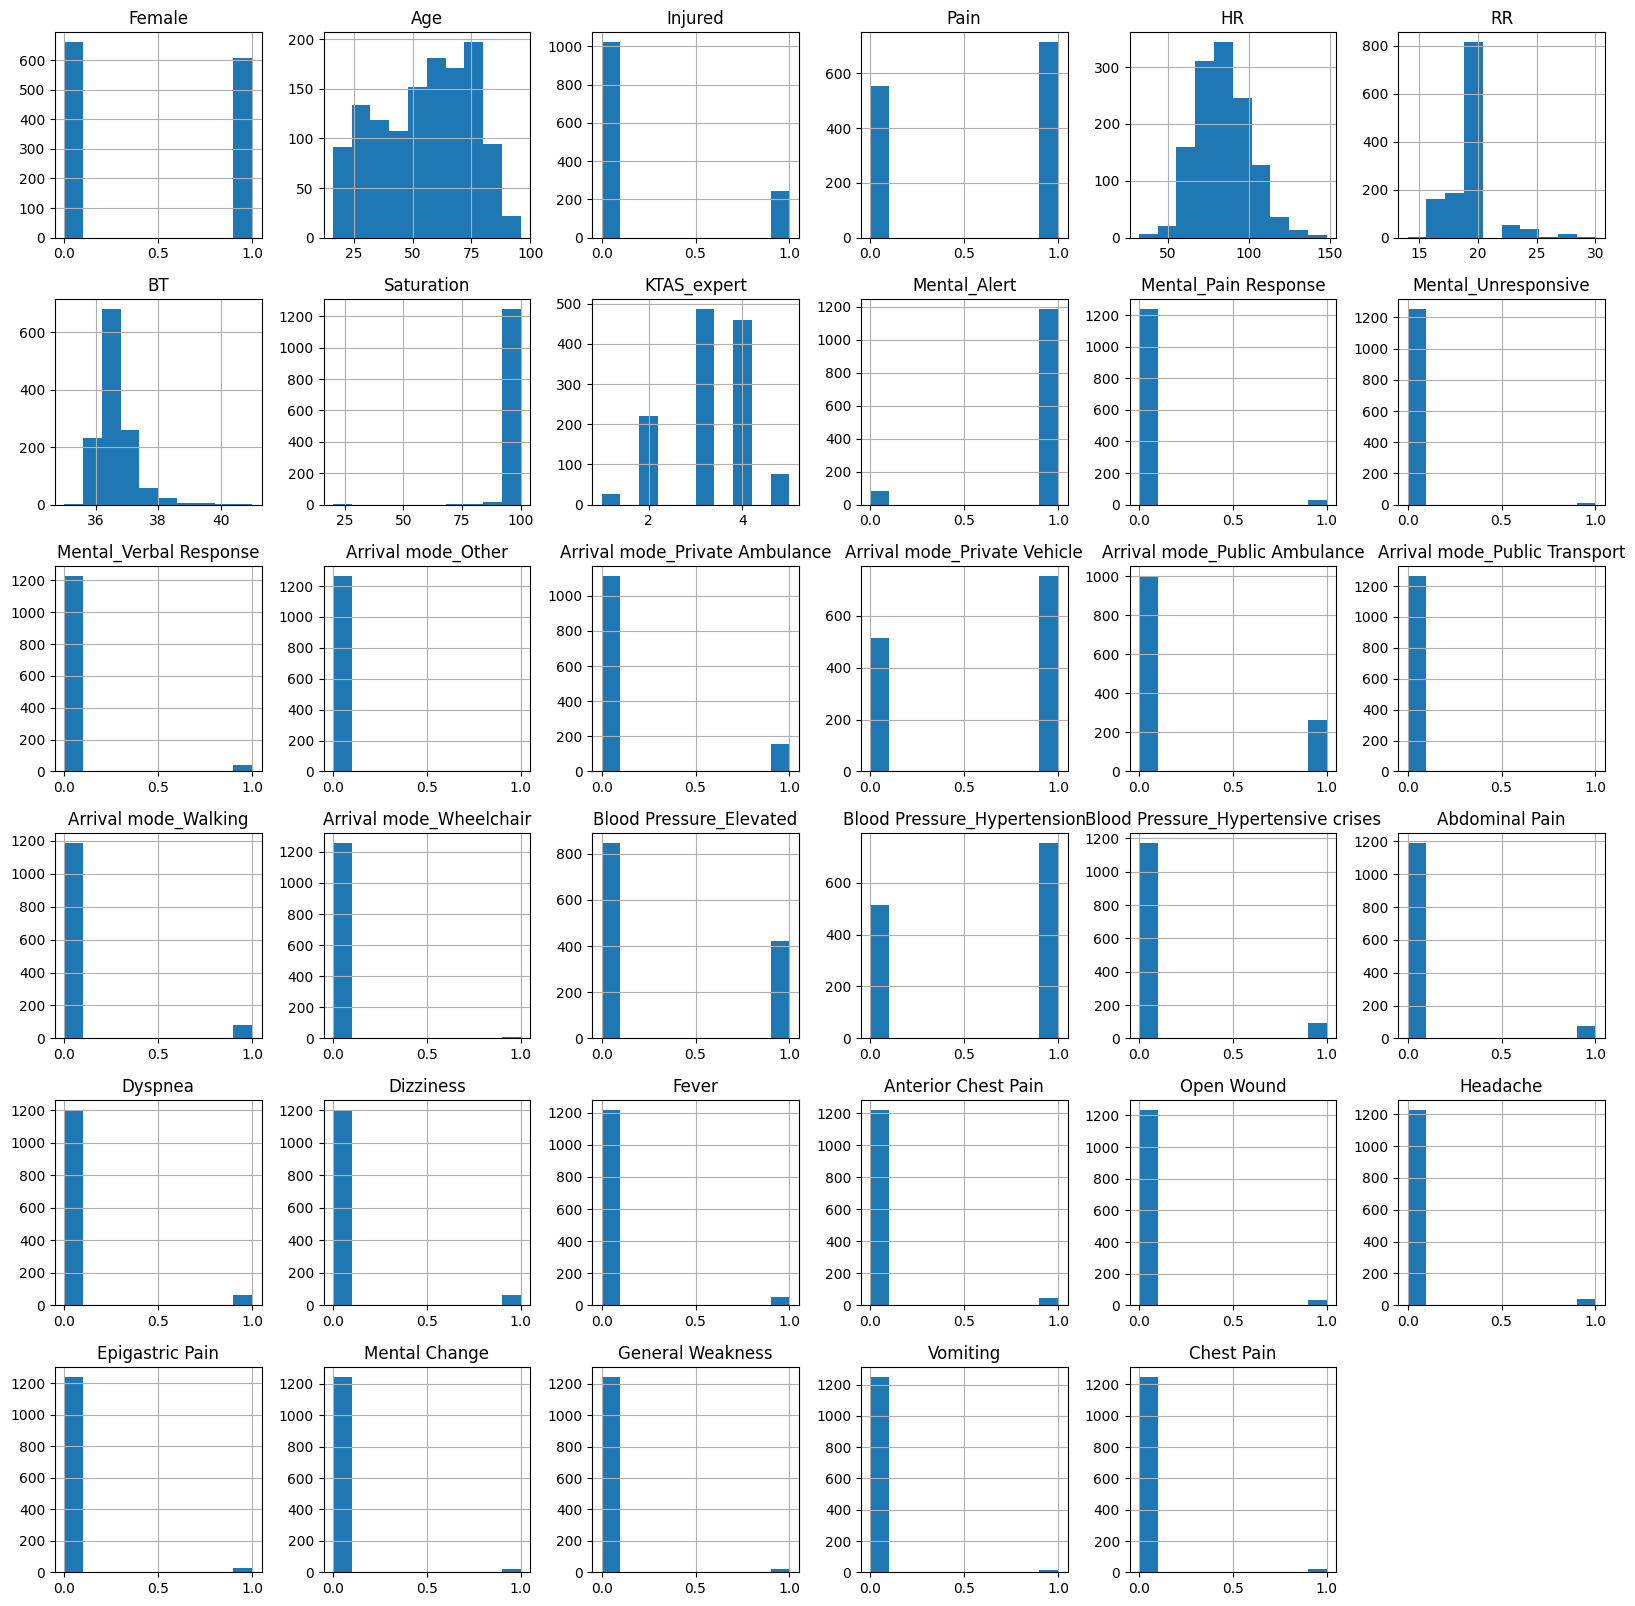

In [85]:
data.hist(figsize=(20,20))

Columns to Normalize:
- Age
- NRS_Pain
- SBP
- DBP
- HR
- RR
- BT
- Saturation


In [19]:
#Normalize the data
from sklearn.preprocessing import MinMaxScaler

# Data to normalize
normalize = ['Age', 'NRS_pain', 'HR', 'RR', 'BT', 'Saturation']

datapd = pd.DataFrame(data, columns=normalize)

normalizer = MinMaxScaler()
data[normalize] = normalizer.fit_transform(datapd)

data.head()

,Female,Age,Injured,Pain,NRS_pain,HR,RR,BT,Saturation,KTAS_expert,Mental_Alert,Mental_Pain Response,Mental_Unresponsive,Mental_Verbal Response,Arrival mode_Other,Arrival mode_Private Ambulance,Arrival mode_Private Vehicle,Arrival mode_Public Ambulance,Arrival mode_Public Transport,Arrival mode_Walking,Arrival mode_Wheelchair,Blood Pressure_Elevated,Blood Pressure_Hypertension,Blood Pressure_Hypertensive crises
0,0,0.6875,1,1,0.2,0.448276,0.250,0.266667,1.000,4,1,0,0,0,0,0,1,0,0,0,0,0,1,0
1,1,0.5000,1,1,0.2,0.241379,0.375,0.250000,0.975,5,1,0,0,0,0,0,1,0,0,0,0,0,1,0
2,1,0.6500,1,1,0.2,0.603448,0.375,0.266667,0.975,5,1,0,0,0,0,0,0,1,0,0,0,0,1,0
3,0,0.6875,0,1,0.3,0.482759,0.375,0.250000,0.975,5,1,0,0,0,0,0,0,0,0,1,0,0,1,0
4,0,0.5250,0,1,0.3,0.525862,0.250,0.250000,0.975,5,1,0,0,0,0,0,1,0,0,0,0,1,0,0


Standardization (z-score normalization) transforms the features to have a mean of 0 and a standard deviation of 1.

In [87]:
#Print standard deviation and mean of the data as table
print("Standard deviation and mean of the data:")
print(data.describe().T[['mean', 'std']])


Standard deviation and mean of the data:
                                        mean       std
Female                              0.478295  0.499726
Age                                 0.480298  0.246563
Injured                             0.192581  0.394482
Pain                                0.563536  0.496143
NRS_pain                            0.230308  0.229802
HR                                  0.447691  0.142361
RR                                  0.344712  0.125006
BT                                  0.263437  0.090302
Saturation                          0.969515  0.036960
KTAS_expert                         3.265983  0.885803
Mental_Alert                        0.936859  0.243313
Mental_Pain Response                0.022099  0.147065
Mental_Unresponsive                 0.010260  0.100813
Mental_Verbal Response              0.030781  0.172793
Arrival mode_Other                  0.001579  0.039715
Arrival mode_Private Ambulance      0.122336  0.327803
Arrival mode_Private Veh

In [20]:
#Standardize the data
from sklearn.preprocessing import StandardScaler

#Standardize the data
scaler = StandardScaler()
data[normalize] = pd.DataFrame(scaler.fit_transform(datapd), columns=normalize)

# Data Spliting

In [21]:
# Split data into train and test sets
from sklearn.model_selection import train_test_split

X = data.drop(columns=['KTAS_expert'])

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)


In [22]:
X.head()

,Female,Age,Injured,Pain,NRS_pain,HR,RR,BT,Saturation,Mental_Alert,Mental_Pain Response,Mental_Unresponsive,Mental_Verbal Response,Arrival mode_Other,Arrival mode_Private Ambulance,Arrival mode_Private Vehicle,Arrival mode_Public Ambulance,Arrival mode_Public Transport,Arrival mode_Walking,Arrival mode_Wheelchair,Blood Pressure_Elevated,Blood Pressure_Hypertension,Blood Pressure_Hypertensive crises
0,0,0.840694,1,1,-0.131939,0.004112,-0.757961,0.035774,0.825155,1,0,0,0,0,0,1,0,0,0,0,0,1,0
1,1,0.079938,1,1,-0.131939,-1.449782,0.242390,-0.148863,0.148474,1,0,0,0,0,0,1,0,0,0,0,0,1,0
2,1,0.688543,1,1,-0.131939,1.094532,0.242390,0.035774,0.148474,1,0,0,0,0,0,0,1,0,0,0,0,1,0
3,0,0.840694,0,1,0.303390,0.246427,0.242390,-0.148863,0.148474,1,0,0,0,0,0,0,0,0,1,0,0,1,0
4,0,0.181372,0,1,0.303390,0.549322,-0.757961,-0.148863,0.148474,1,0,0,0,0,0,1,0,0,0,0,1,0,0


## Feature Importance

In [23]:
#Random Forest
from sklearn.ensemble import RandomForestClassifier

# Train Random Forest for feature importance in train set
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Feature importance
feature_importance_rf = pd.Series(rf.feature_importances_, index=X.columns).sort_values(ascending=False)
print("\nFeature Importance Scores for Random Forest:")
print(feature_importance_rf)


Feature Importance Scores for Random Forest:
Age                                   0.178071
HR                                    0.169392
BT                                    0.138051
NRS_pain                              0.102399
RR                                    0.068092
Saturation                            0.063427
Injured                               0.048604
Female                                0.037463
Arrival mode_Private Vehicle          0.025843
Blood Pressure_Hypertension           0.022765
Blood Pressure_Elevated               0.022430
Pain                                  0.021919
Arrival mode_Private Ambulance        0.020325
Mental_Alert                          0.018131
Arrival mode_Public Ambulance         0.015646
Arrival mode_Walking                  0.011019
Blood Pressure_Hypertensive crises    0.010574
Mental_Unresponsive                   0.009837
Mental_Pain Response                  0.007063
Mental_Verbal Response                0.006513
Arrival mode_W

In [24]:
#Gradient Boosting
from sklearn.ensemble import GradientBoostingClassifier

# Train Gradient Boosting for feature importance in train set
gb = GradientBoostingClassifier(n_estimators=100, random_state=42)
gb.fit(X_train, y_train)

# Feature importance
feature_importance_gb = pd.Series(gb.feature_importances_, index=X.columns).sort_values(ascending=False)
print("\nFeature Importance Scores for Gradient Boosting:")
print(feature_importance_gb)



Feature Importance Scores for Gradient Boosting:
NRS_pain                              0.220065
Age                                   0.137325
HR                                    0.127013
Injured                               0.105290
BT                                    0.089929
RR                                    0.060748
Saturation                            0.056637
Arrival mode_Private Vehicle          0.045515
Arrival mode_Private Ambulance        0.042754
Mental_Unresponsive                   0.021168
Mental_Alert                          0.020073
Mental_Pain Response                  0.013965
Arrival mode_Walking                  0.012530
Female                                0.012257
Arrival mode_Public Ambulance         0.008456
Blood Pressure_Elevated               0.007682
Blood Pressure_Hypertensive crises    0.005523
Blood Pressure_Hypertension           0.005117
Mental_Verbal Response                0.002831
Arrival mode_Wheelchair               0.002705
Pain      

In [132]:
#Decision Tree
from sklearn.tree import DecisionTreeClassifier

# Train Decision Tree for feature importance in train set
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)

# Feature importance
feature_importance_dt = pd.Series(dt.feature_importances_, index=X.columns).sort_values(ascending=False)
print("\nFeature Importance Scores for Decision Tree:")
print(feature_importance_dt)



Feature Importance Scores for Decision Tree:
Age                                   0.171238
HR                                    0.159545
BT                                    0.118278
NRS_pain                              0.114111
RR                                    0.058482
Saturation                            0.047806
Injured                               0.044995
Anterior Chest Pain                   0.032797
Arrival mode_Private Vehicle          0.026418
Dizziness                             0.023713
Mental_Unresponsive                   0.019848
Mental_Alert                          0.019508
Female                                0.018820
Abdominal Pain                        0.017143
Fever                                 0.013786
Dyspnea                               0.013616
Mental_Verbal Response                0.012660
Blood Pressure_Elevated               0.012075
Blood Pressure_Hypertension           0.010222
Mental Change                         0.009966
Chest Pain    

In [133]:
#Mean of feature importance
feature_importance = pd.DataFrame([feature_importance_rf, feature_importance_gb, feature_importance_dt]).T
feature_importance['Mean'] = feature_importance.mean(axis=1)
feature_importance.sort_values(by='Mean', ascending=False, inplace=True)
print("\nMean of Feature Importance Scores:")
print(feature_importance['Mean'])



Mean of Feature Importance Scores:
Age                                   0.141591
NRS_pain                              0.134122
HR                                    0.130570
BT                                    0.100549
Injured                               0.056036
RR                                    0.053340
Saturation                            0.046218
Anterior Chest Pain                   0.042335
Arrival mode_Private Vehicle          0.029452
Dizziness                             0.028984
Female                                0.019739
Abdominal Pain                        0.018176
Mental_Alert                          0.017901
Mental_Unresponsive                   0.017676
Arrival mode_Private Ambulance        0.017458
Dyspnea                               0.015689
Fever                                 0.015018
Blood Pressure_Elevated               0.012104
Blood Pressure_Hypertension           0.011302
Chest Pain                            0.011043
Pain                    

# Balance Dataset

In [67]:

#to try

#from imblearn.over_sampling import ADASYN--dont run

#---------BEST----------
#from imblearn.under_sampling import TomekLinks
#from imblearn.combine import SMOTETomek
#from imblearn.over_sampling import SMOTE
#from imblearn.over_sampling import RandomOverSampler

#------------Intermediate
#from imblearn.under_sampling import RandomUnderSampler

#---------BAD-----------
#from imblearn.under_sampling import NearMiss
#from imblearn.combine import SMOTEENN

In [37]:
from collections import Counter
from imblearn.over_sampling import SMOTE

counter= Counter(y_train)
print("Before", counter)

#oversampling the train dataset using SMOTE
balanced=SMOTE()

X_train_sm, y_train_sm=balanced.fit_resample(X_train, y_train)

counter= Counter(y_train_sm)
print("After", counter)

Before Counter({2: 365, 3: 344, 1: 165, 4: 56, 0: 20})
After Counter({2: 365, 3: 365, 1: 365, 4: 365, 0: 365})


In [38]:
from collections import Counter
from imblearn.under_sampling import TomekLinks

counter= Counter(y_train)
print("Before", counter)

#oversampling the train dataset using SMOTE
balanced=TomekLinks()

X_train_sm, y_train_sm=balanced.fit_resample(X_train, y_train)

counter= Counter(y_train_sm)
print("After", counter)

Before Counter({2: 365, 3: 344, 1: 165, 4: 56, 0: 20})
After Counter({2: 289, 3: 273, 1: 123, 4: 33, 0: 20})


# Models


## Functions

### Model Evaluation

In [25]:
def evaluate_model (model, X_train, X_test, y_train, y_test):
    # Model prediction
    y_pred_test = model.predict(X_test)
    y_pred_train = model.predict(X_train)

    # Model evaluation
    from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, precision_score, recall_score, f1_score

    # Results to show 
        # Accuracy score
        # Precision
        # Recall
        # F1 score
        # Classification report

    # Training results
    print("Training Results:\n")
    print("Accuracy score: ", accuracy_score(y_train, y_pred_train))
    print("Precision score: ", precision_score(y_train, y_pred_train, average='weighted',zero_division=0))
    print("Recall score: ", recall_score(y_train, y_pred_train, average='weighted'))
    print("F1 score: ", f1_score(y_train, y_pred_train, average='weighted'))

    # Testing results
    print("\nTesting Results:\n")
    print("Accuracy score: ", accuracy_score(y_test, y_pred_test))
    print("Precision score: ", precision_score(y_test, y_pred_test, average='weighted',zero_division=0))
    print("Recall score: ", recall_score(y_test, y_pred_test, average='weighted'))
    print("F1 score: ", f1_score(y_test, y_pred_test, average='weighted'))

    #AUC and ROC curve
    from sklearn.metrics import roc_curve, auc, confusion_matrix, ConfusionMatrixDisplay

    # Plot roc curve
    """ plt.figure(figsize=(15, 10))
    #For each class
    for i in range(len(model.classes_)):
        # Compute ROC curve and ROC area for each class
        fpr, tpr, _ = roc_curve(y_test, model.predict_proba(X_test)[:, i], pos_label=model.classes_[i])
        roc_auc = auc(fpr, tpr)
        plt.plot(fpr, tpr, label='ROC curve of class {0} (area = {1:0.2f})'.format(model.classes_[i], roc_auc))
    plt.title('ROC Curve')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend()
    plt.show() """


    # Plot confusion matrix
    plt.figure(figsize=(15, 10))
    confusion_matrix = confusion_matrix(y_test, y_pred_test)
    ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = model.classes_).plot(cmap='Blues')
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()
    

In [26]:
from hyperopt import STATUS_OK, Trials, fmin, tpe, hp
from sklearn.metrics import classification_report, f1_score

from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

In [27]:
import os
# Save best parameters of model in a txt file 
def save_best_params(best_params, model_name, type_param):
    # Check if exist a folder with the model name in Models folder
    if not os.path.exists(f'Models/{model_name}'):
        os.mkdir(f'Models/{model_name}')
    # Save best parameters in a txt file inside the model folder
    with open(f'Models/{model_name}/best_params_{type_param}.txt', 'w') as f:
        print(best_params, file=f)

## Support Vector Machine

**Important parameters:**
- Kernel
- Gamma
- C


### Hyperopt

In [34]:
def svm_hyperopt(X_train_sm, y_train_sm, X_test, y_test):
    space = {
    'C': hp.uniform('C',0.01,1)
    }

    def objetive(space):
        svc = SVC(C=float(space['C']), kernel='linear', probability=True)

        svc.fit(X_train_sm, y_train_sm)

        y_pred = svc.predict(X_test)

        F1 = f1_score(y_test, y_pred, average='weighted')

        return {'loss': -F1, 'status': STATUS_OK }
    
    best = fmin (fn = objetive,
                space = space,
                algo = tpe.suggest,
                max_evals = 100)

    save_best_params(best, 'svm', 'hyperopt')

    print(best)

    svm = SVC(C=float(best['C']),
            probability=True,
            kernel='linear')

    svm.fit(X_train_sm, y_train_sm)

    evaluate_model(svm, X_train_sm, X_test, y_train_sm, y_test)

### GridSearch

In [63]:
def svm_gridsearch(X_train_sm, y_train_sm, X_test, y_test):
    C = np.arange(0.01, 1, 0.1)

    parameters_svc = dict(C=C, probability=[True], kernel=['linear'])

    svm = SVC()

    grid_search_result = GridSearchCV(svm, parameters_svc, cv = 10, scoring='f1_weighted', verbose=10)

    grid_search_result.fit(X_train_sm, y_train_sm)

    best_param_svc_gs = grid_search_result.best_params_

    print (best_param_svc_gs)

    save_best_params(best_param_svc_gs, 'svm', 'grid_search')

    svm = SVC(C=float(best_param_svc_gs['C']),
            kernel='linear',
            probability=True)

    svm.fit(X_train_sm, y_train_sm)

    evaluate_model(svm, X_train_sm, X_test, y_train_sm, y_test)

### Function Support Vector Machine

100%|██████████| 100/100 [00:15<00:00,  6.40trial/s, best loss: -0.5844149815729582]
{'C': 0.1291896435815688}
Training Results:

Accuracy score:  0.6368563685636857
Precision score:  0.610922820921199
Recall score:  0.6368563685636857
F1 score:  0.6045648412760227

Testing Results:

Accuracy score:  0.6182965299684543
Precision score:  0.5771290948322694
Recall score:  0.6182965299684543
F1 score:  0.5844149815729582


<Figure size 1500x1000 with 0 Axes>

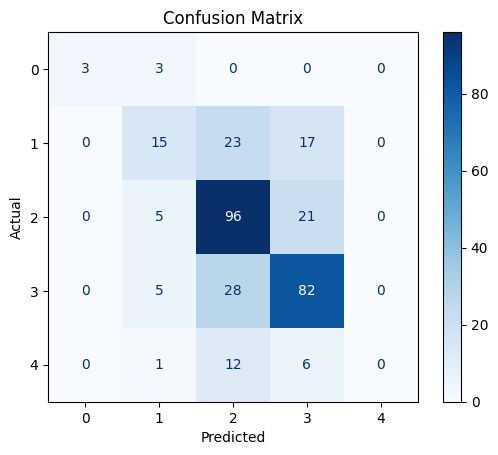

100%|██████████| 100/100 [00:28<00:00,  3.51trial/s, best loss: -0.5927125538222245]
{'C': 0.08774361441735537}
Training Results:

Accuracy score:  0.5947368421052631
Precision score:  0.5634889780242943
Recall score:  0.5947368421052631
F1 score:  0.5553587259882519

Testing Results:

Accuracy score:  0.6309148264984227
Precision score:  0.5843259717817169
Recall score:  0.6309148264984227
F1 score:  0.5927125538222245


<Figure size 1500x1000 with 0 Axes>

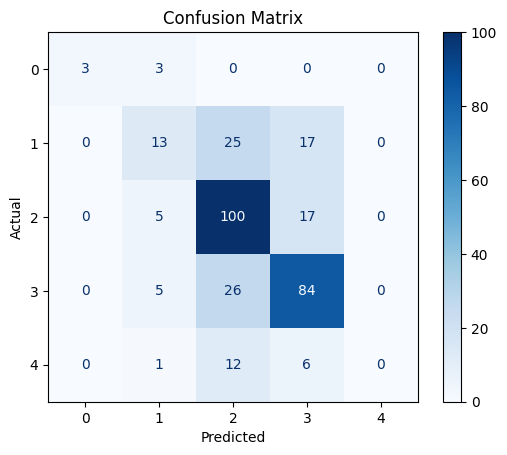

In [39]:
def support_vector_machine(X_train_sm, y_train_sm, X_test, y_test):
    svm_hyperopt(X_train_sm, y_train_sm, X_test, y_test)
    #svm_gridsearch(X_train_sm, y_train_sm, X_test, y_test)

support_vector_machine(X_train_sm, y_train_sm, X_test, y_test)
support_vector_machine(X_train, y_train, X_test, y_test)

## Decision Trees

**Important parameters:**
- Criterion
- Max_depth
- Splitter
- Min_sample_split
- Min_sample_leaf
- Max_features
- Min_impurity_decrease


### Hyperopt

In [40]:

def decision_tree_hyperopt(X_train_sm, y_train_sm, X_test, y_test):
    space = {
        'criterion': hp.choice('criterion', ['gini', 'entropy']),
        'max_depth': hp.quniform('max_depth', 1, 20, 1),
        'splitter': hp.choice('splitter', ['best', 'random']),
        'min_samples_split': hp.quniform('min_samples_split', 2, 10, 1),
        'min_samples_leaf': hp.quniform('min_samples_leaf', 1, 10, 1),
        'max_features': hp.choice("max_features", ['sqrt', 'log2']),
        'min_impurity_decrease': hp.quniform('min_impurity_decrease', 0.0, 1, 0.1)
    }

    def objective(space):
        dt = DecisionTreeClassifier(
            criterion=space['criterion'],
            max_depth=int(space['max_depth']),
            splitter=space['splitter'],
            max_features=space['max_features'],
            min_samples_leaf=int(space['min_samples_leaf']),
            min_samples_split=int(space['min_samples_split']),
            min_impurity_decrease=float(space['min_impurity_decrease'])
        )

        dt.fit(X_train_sm, y_train_sm)

        y_pred = dt.predict(X_test)

        F1 = f1_score(y_test, y_pred, average='weighted')

        return {'loss': -F1, 'status': STATUS_OK}

    best = fmin(fn=objective, space=space, algo=tpe.suggest, max_evals=100)

    save_best_params(best, 'decision_tree', 'hyperopt')

    print(best)

    criterion_map = {0: 'gini', 1: 'entropy'}
    splitter_map = {0: 'best', 1: 'random'}
    max_features_map = {0: 'sqrt', 1: 'log2'}

    best['criterion'] = criterion_map[best['criterion']]
    best['splitter'] = splitter_map[best['splitter']]
    best['max_features'] = max_features_map[best['max_features']]

    dt_hyperopt = DecisionTreeClassifier(
        criterion=best['criterion'],
        max_depth=int(best['max_depth']),
        splitter=best['splitter'],
        max_features=best['max_features'],
        min_samples_leaf=int(best['min_samples_leaf']),
        min_samples_split=int(best['min_samples_split']),
        min_impurity_decrease=float(best['min_impurity_decrease'])
    )

    dt_hyperopt.fit(X_train_sm, y_train_sm)

    evaluate_model(dt_hyperopt, X_train_sm, X_test, y_train_sm, y_test)


### GridSearch

In [105]:
def decision_tree_gridsearch(X_train_sm, y_train_sm, X_test, y_test):
    parameters_dt = {
        'criterion': ['gini', 'entropy'],
        'max_depth': np.arange(1, 20, 1),
        'splitter': ['best', 'random'],
        'min_samples_split': np.arange(2, 10, 1),
        'min_samples_leaf': np.arange(1, 10, 1),
        'max_features': ['sqrt', 'log2'],
        'min_impurity_decrease': np.arange(0.0, 1, 0.1)
    }

    dt = DecisionTreeClassifier()
    grid_search_result = GridSearchCV(dt, parameters_dt, cv=5, scoring='f1_weighted', verbose=10)
    grid_search_result.fit(X_train_sm, y_train_sm)

    best_param_dt_gs = grid_search_result.best_params_

    dt_gs = DecisionTreeClassifier(
        criterion=best_param_dt_gs['criterion'],
        max_depth=best_param_dt_gs['max_depth'],
        splitter=best_param_dt_gs['splitter'],
        max_features=best_param_dt_gs['max_features'],
        min_samples_leaf=best_param_dt_gs['min_samples_leaf'],
        min_samples_split=best_param_dt_gs['min_samples_split'],
        min_impurity_decrease=best_param_dt_gs['min_impurity_decrease']
    )

    dt_gs.fit(X_train_sm, y_train_sm)

    evaluate_model(dt_gs, X_train_sm, X_test, y_train_sm, y_test)

### Function Decision tree

100%|██████████| 100/100 [00:02<00:00, 39.27trial/s, best loss: -0.5567850926114836]
{'criterion': 0, 'max_depth': 14.0, 'max_features': 1, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 6.0, 'min_samples_split': 5.0, 'splitter': 0}
Training Results:

Accuracy score:  0.6221052631578947
Precision score:  0.6138347716012098
Recall score:  0.6221052631578947
F1 score:  0.6041555180945398

Testing Results:

Accuracy score:  0.555205047318612
Precision score:  0.5445492397651278
Recall score:  0.555205047318612
F1 score:  0.5432651820664438


<Figure size 1500x1000 with 0 Axes>

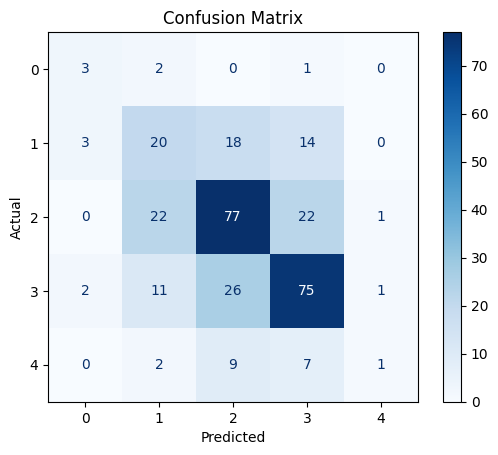

100%|██████████| 100/100 [00:02<00:00, 35.78trial/s, best loss: -0.5733805247796022]
{'criterion': 1, 'max_depth': 18.0, 'max_features': 1, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 4.0, 'min_samples_split': 3.0, 'splitter': 0}
Training Results:

Accuracy score:  0.6883468834688347
Precision score:  0.6938624979712719
Recall score:  0.6883468834688347
F1 score:  0.6779286426487837

Testing Results:

Accuracy score:  0.47003154574132494
Precision score:  0.44386385278323126
Recall score:  0.47003154574132494
F1 score:  0.45634688154967556


<Figure size 1500x1000 with 0 Axes>

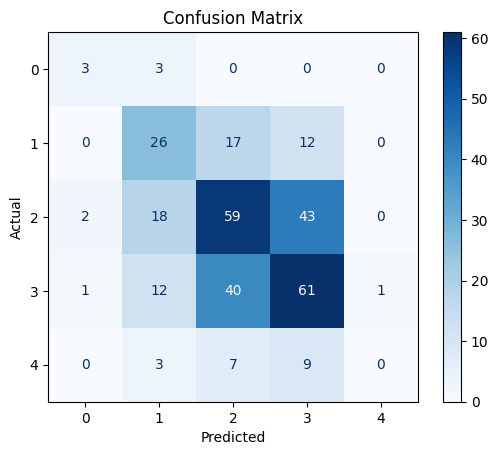

In [41]:
def decision_tree(X_train_sm, y_train_sm, X_test, y_test):
    decision_tree_hyperopt(X_train_sm, y_train_sm, X_test, y_test)
    #decision_tree_gridsearch(X_train_sm, y_train_sm, X_test, y_test)
    
decision_tree(X_train, y_train, X_test, y_test)
decision_tree(X_train_sm, y_train_sm, X_test, y_test)

## K-Nearest Neighbors

**Important parameters:**
- n_neighbors
- weights
- algorithm
- metric
- leaf_size
- p

### Hyperopt

In [42]:
def k_nearest_hyperopt(X_train_sm, y_train_sm, X_test, y_test):
    space = {
        'n_neighbors': hp.choice('n_neighbors', range(1, 50)),
        'weights': hp.choice('weights', ['uniform', 'distance']),
        'algorithm': hp.choice('algorithm', ['auto', 'ball_tree', 'kd_tree', 'brute']),
        'metric' : hp.choice('metric', ['euclidean', 'manhattan', 'chebyshev', 'minkowski']),
        'leaf_size': hp.choice('leaf_size', range(1, 50)),
        'p': hp.choice('p', [1, 2])
    }

    def objetive(space):
        knn =  KNeighborsClassifier(n_neighbors= int(space['n_neighbors']),
                                            weights= space['weights'],
                                            algorithm= space['algorithm'],
                                            leaf_size= int(space['leaf_size']),
                                            metric= space['metric'],
                                            p= int(space['p']))

        knn.fit(X_train_sm, y_train_sm)

        y_pred = knn.predict(X_test)

        F1 = f1_score(y_test, y_pred, average = 'weighted')

        return {'loss': -F1, 'status': STATUS_OK }
    
    best = fmin (fn = objetive,
            space = space,
            algo = tpe.suggest,
            max_evals = 100)

    print(best)

    save_best_params(best, 'knn', 'hyperopt')

    algorithm_map = {0: 'auto', 1: 'ball_tree', 2: 'kd_tree', 3: 'brute'}
    metric_map = {0: 'euclidean', 1: 'manhattan', 2: 'chebyshev', 3: 'minkowski'}
    weights_map = {0: 'uniform', 1: 'distance'}
    p_map = {0: 1, 1: 2}

    best['algorithm'] = algorithm_map[best['algorithm']]
    best['metric'] = metric_map[best['metric']]
    best['weights'] = weights_map[best['weights']]
    best['p'] = p_map[best['p']]

    knn = KNeighborsClassifier(n_neighbors=best['n_neighbors'],
                                weights=best['weights'],
                                algorithm=best['algorithm'],
                                metric=best['metric'],
                                leaf_size=best['leaf_size'],
                                p=best['p'])

    knn.fit(X_train_sm, y_train_sm)

    evaluate_model(knn, X_train_sm, X_test, y_train_sm, y_test)


### GridSearch

In [139]:
def k_nearest_gridsearch(X_train_sm, y_train_sm, X_test, y_test):
    parameters_knn = dict(n_neighbors=range(1, 50),
                        weights=['uniform', 'distance'],
                        algorithm=['auto', 'ball_tree', 'kd_tree', 'brute'],
                        leaf_size=range(1, 50),
                        metric=['euclidean', 'manhattan', 'chebyshev', 'minkowski'],
                        p=[1, 2])
    
    knn = KNeighborsClassifier()

    grid_search_result = GridSearchCV(knn, parameters_knn, cv = 10, scoring='f1_weighted', verbose=10)

    grid_search_result.fit(X_train_sm, y_train_sm)

    best_param_knn_gs = grid_search_result.best_params_

    save_best_params(best_param_knn_gs, 'knn', 'grid_search')

    knn = KNeighborsClassifier(n_neighbors=best_param_knn_gs['n_neighbors'],
                                weights=best_param_knn_gs['weights'],
                                algorithm=best_param_knn_gs['algorithm'],
                                metric=best_param_knn_gs['metric'],
                                leaf_size=best_param_knn_gs['leaf_size'],
                                p=best_param_knn_gs['p'])

    knn.fit(X_train_sm, y_train_sm)

    evaluate_model(knn, X_train_sm, X_test, y_train_sm, y_test)

  0%|          | 0/100 [00:00<?, ?trial/s, best loss=?]

100%|██████████| 100/100 [00:04<00:00, 23.70trial/s, best loss: -0.5557455114743559]
{'algorithm': 2, 'leaf_size': 11, 'metric': 1, 'n_neighbors': 14, 'p': 1, 'weights': 1}
Training Results:

Accuracy score:  1.0
Precision score:  1.0
Recall score:  1.0
F1 score:  1.0

Testing Results:

Accuracy score:  0.5772870662460567
Precision score:  0.5438629236669141
Recall score:  0.5772870662460567
F1 score:  0.5455163688005502


<Figure size 1500x1000 with 0 Axes>

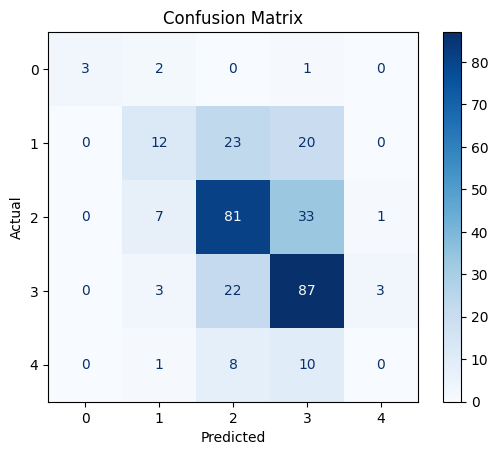

100%|██████████| 100/100 [00:04<00:00, 21.57trial/s, best loss: -0.5722713396271983]
{'algorithm': 1, 'leaf_size': 2, 'metric': 1, 'n_neighbors': 9, 'p': 0, 'weights': 0}
Training Results:

Accuracy score:  0.6598915989159891
Precision score:  0.6616220178595229
Recall score:  0.6598915989159891
F1 score:  0.6428133535484367

Testing Results:

Accuracy score:  0.5709779179810726
Precision score:  0.5382844471087985
Recall score:  0.5709779179810726
F1 score:  0.542279118539144


<Figure size 1500x1000 with 0 Axes>

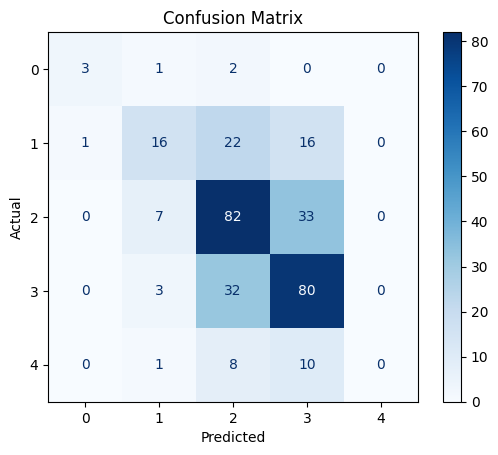

In [43]:
def k_nearest_neighbors(X_train_sm, y_train_sm, X_test, y_test):
    k_nearest_hyperopt(X_train_sm, y_train_sm, X_test, y_test)
    #k_nearest_gridsearch(X_train_sm, y_train_sm, X_test, y_test)

k_nearest_neighbors(X_train, y_train, X_test, y_test)
k_nearest_neighbors(X_train_sm, y_train_sm, X_test, y_test) 

## Multi-class Logistic Regression

**Important parameters:**
- solver
- penalty
- C
- max_iter
- tolerance
- wights
- algorithm


### Hyperopt

In [44]:
def logistic_hyperopt(X_train_sm, y_train_sm, X_test, y_test):
    space = {
    'solver': hp.choice('solver', ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']),
    'penalty': hp.choice('penalty', ['l2']),
    'C': hp.quniform("C", 0.1, 10.0, 0.1),
    'max_iter': hp.choice('max_iter', range(1, 1000)),
    'tolerance': hp.quniform("tolerance", 0.0001, 1.0, 0.01),
    'weights': hp.choice('weights', ['balanced',None]),
    }
    
    def objective(space):
        lreg =  LogisticRegression(penalty= space['penalty'],
                                    C= float(space['C']),
                                    solver= space['solver'],
                                    max_iter= int(space['max_iter']),
                                    tol= float(space['tolerance']),
                                    class_weight= space['weights'])

        lreg.fit(X_train_sm, y_train_sm)

        y_pred = lreg.predict(X_test)

        F1 = f1_score(y_test, y_pred, average = 'weighted')

        return {'loss': -F1, 'status': STATUS_OK }
    
    best = fmin (fn = objective,
                space = space,
                algo = tpe.suggest,
                max_evals = 100)

    print(best)

    save_best_params(best, 'l_reg', 'hyperopt')

    solver_map = {0: 'newton-cg', 1: 'lbfgs', 2: 'liblinear', 3: 'sag', 4: 'saga'}
    weights_map = {0: 'balanced', 1: None}

    best['solver'] = solver_map[best['solver']]
    best['weights'] = weights_map[best['weights']]

    print(best )
    lr = LogisticRegression(solver=best['solver'],
                            penalty='l2',
                            C=float(best['C']),
                            max_iter=best['max_iter'],
                            tol=float(best['tolerance']),
                            class_weight=best['weights'])

    lr.fit(X_train_sm, y_train_sm)

    evaluate_model(lr, X_train_sm, X_test, y_train_sm, y_test)


### GridSearch

In [145]:
def logistic_gridsearch(X_train_sm, y_train_sm, X_test, y_test):

    parameters_lreg = dict(solver=['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
                        penalty=['l1', 'l2', 'elasticnet', 'none'],
                        C=np.arange(0.005, 10.0, 0.1),
                        max_iter=range(1, 1000),
                        tol=np.arange(0.0001, 1.0, 0.01),
                        weights=['uniform', 'distance'],
                        algorithm=['auto', 'ball_tree', 'kd_tree', 'brute'])
    
    lr = LogisticRegression()

    grid_search_result = GridSearchCV(lr, parameters_lreg, cv = 10, scoring='f1_weighted', verbose=10)

    grid_search_result.fit(X_train_sm, y_train_sm)

    best_param_lreg_gs = grid_search_result.best_params_

    print (best_param_lreg_gs)

    save_best_params(best_param_lreg_gs, 'l_reg', 'grid_search')

    lr = LogisticRegression(solver=best_param_lreg_gs['solver'],
                            penalty=best_param_lreg_gs['penalty'],
                            C=float(best_param_lreg_gs['C']),
                            max_iter=best_param_lreg_gs['max_iter'],
                            tol=float(best_param_lreg_gs['tolerance']),
                            weights=best_param_lreg_gs['weights'],
                            algorithm=best_param_lreg_gs['algorithm'])

    lr.fit(X_train_sm, y_train_sm)

    evaluate_model(lr, X_train_sm, X_test, y_train_sm, y_test)

    

### Function Logistic Regression


 33%|███▎      | 33/100 [00:03<00:05, 11.40trial/s, best loss: -0.5761870452387111]

C:\Users\Maria\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(



100%|██████████| 100/100 [00:10<00:00,  9.67trial/s, best loss: -0.5761870452387111]
{'C': 5.6000000000000005, 'max_iter': 187, 'penalty': 0, 'solver': 2, 'tolerance': 0.99, 'weights': 1}
{'C': 5.6000000000000005, 'max_iter': 187, 'penalty': 0, 'solver': 'liblinear', 'tolerance': 0.99, 'weights': None}
Training Results:

Accuracy score:  0.5831578947368421
Precision score:  0.5503023245658725
Recall score:  0.5831578947368421
F1 score:  0.5428942640576753

Testing Results:

Accuracy score:  0.6088328075709779
Precision score:  0.5806975038047593
Recall score:  0.6088328075709779
F1 score:  0.5761870452387111


<Figure size 1500x1000 with 0 Axes>

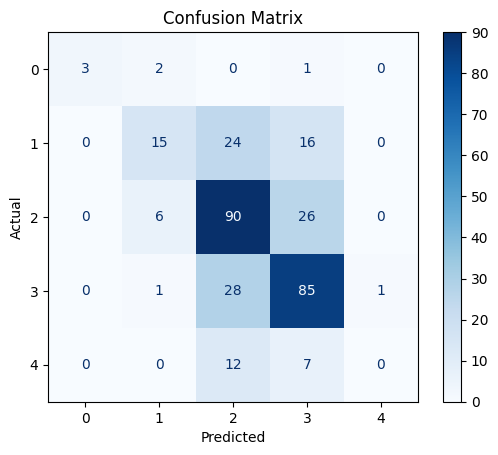

 10%|█         | 10/100 [00:01<00:08, 11.07trial/s, best loss: -0.5777650711771602]

C:\Users\Maria\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(



 68%|██████▊   | 68/100 [00:07<00:04,  7.46trial/s, best loss: -0.5805562337835682]

C:\Users\Maria\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(



 77%|███████▋  | 77/100 [00:08<00:02,  9.36trial/s, best loss: -0.5805562337835682]

C:\Users\Maria\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(



100%|██████████| 100/100 [00:10<00:00,  9.20trial/s, best loss: -0.5805562337835682]
{'C': 4.0, 'max_iter': 333, 'penalty': 0, 'solver': 0, 'tolerance': 0.9500000000000001, 'weights': 1}
{'C': 4.0, 'max_iter': 333, 'penalty': 0, 'solver': 'newton-cg', 'tolerance': 0.9500000000000001, 'weights': None}
Training Results:

Accuracy score:  0.6449864498644986
Precision score:  0.6615534341173842
Recall score:  0.6449864498644986
F1 score:  0.6270485528832839

Testing Results:

Accuracy score:  0.6056782334384858
Precision score:  0.5680961077773298
Recall score:  0.6056782334384858
F1 score:  0.5805562337835682


<Figure size 1500x1000 with 0 Axes>

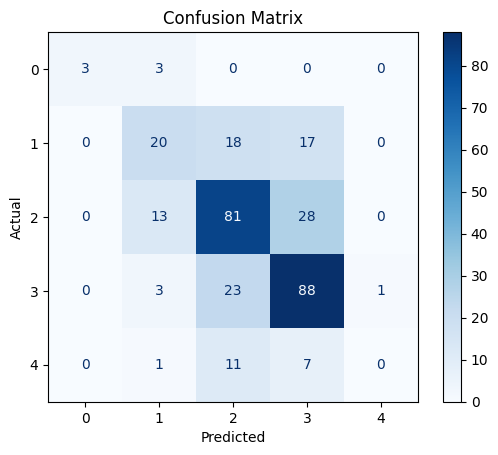

In [45]:
def logistic(X_train_sm, y_train_sm, X_test, y_test):
    logistic_hyperopt(X_train_sm, y_train_sm, X_test, y_test)
    #logistic_gridsearch(X_train_sm, y_train_sm, X_test, y_test)

logistic(X_train, y_train, X_test, y_test)
logistic(X_train_sm, y_train_sm, X_test, y_test)

## Neural Network

**Important parameters:**
- hidden_layer
- activation_function
- solver
- alpha
- learning rate

### Hyperopt

In [46]:
def neuralnetwork_hyperopt(X_train_sm, y_train_sm, X_test, y_test):
    space = {
        'hidden_layer': hp.choice('hidden_layer', [1, 2, 3, 4, 5]),
        'activation': hp.choice('activation', ['identity', 'logistic', 'tanh', 'relu']),
        'solver': hp.choice('solver', ['lbfgs', 'sgd', 'adam']),
        'alpha': hp.quniform("alpha", 0.0001, 1.0, 0.01),
        'learning_rate': hp.choice('learning_rate', ['constant', 'invscaling', 'adaptive']),
    }

    def hyperparameter_tuning(space):
        nn =  MLPClassifier(hidden_layer_sizes= space['hidden_layer'],
                            activation= space['activation'],
                            solver= space['solver'],
                            alpha= float(space['alpha']),
                            learning_rate= space['learning_rate'])

        nn.fit(X_train_sm, y_train)

        y_pred = nn.predict(X_test)

        F1 = f1_score(y_test, y_pred, average = 'weighted')

        return {'loss': -F1, 'status': STATUS_OK }
    
    best = fmin (fn = hyperparameter_tuning,
                space = space,
                algo = tpe.suggest,
                max_evals = 100)

    save_best_params(best, 'neural_net', 'hyperopt')
    

    hidden_layer_map = {0: (1,), 1: (2,), 2: (3,), 3: (4,), 4: (5,)}
    activation_map = {0: 'identity', 1: 'logistic', 2: 'tanh', 3: 'relu'}
    solver_map = {0: 'lbfgs', 1: 'sgd', 2: 'adam'}
    learning_rate_map = {0: 'constant', 1: 'invscaling', 2: 'adaptive'}

    best['hidden_layer'] = hidden_layer_map[best['hidden_layer']]
    best['activation'] = activation_map[best['activation']]
    best['solver'] = solver_map[best['solver']]
    best['learning_rate'] = learning_rate_map[best['learning_rate']]

    print(best)

    nn = MLPClassifier(hidden_layer_sizes=best['hidden_layer'],
                        activation=best['activation'],
                        solver=best['solver'],
                        alpha=float(best['alpha']),
                        learning_rate=best['learning_rate'])

    nn.fit(X_train_sm, y_train_sm)

    evaluate_model(nn, X_train_sm, X_test, y_train_sm, y_test)

### GridSearch

In [149]:
def neuralnetwork_gridsearch(X_train_sm, y_train_sm, X_test, y_test):
    parameters_nn = dict(hidden_layer_sizes=[(50,50,50), (50,100,50), (100,)],
                        activation=['identity', 'logistic', 'tanh', 'relu'],
                        solver=['lbfgs', 'sgd', 'adam'],
                        alpha=np.arange(0.0001, 1.0, 0.01),
                        learning_rate=['constant', 'invscaling', 'adaptive'])
    
    nn = MLPClassifier()

    grid_search_result = GridSearchCV(nn, parameters_nn, cv = 10, scoring='f1_weighted', verbose=10)

    grid_search_result.fit(X_train_sm, y_train_sm)

    best_param_nn_gs = grid_search_result.best_params_

    print (best_param_nn_gs)

    save_best_params(best_param_nn_gs, 'neural_net', 'grid_search')

    nn = MLPClassifier(hidden_layer_sizes=best_param_nn_gs['hidden_layer'],
                        activation=best_param_nn_gs['activation'],
                        solver=best_param_nn_gs['solver'],
                        alpha=float(best_param_nn_gs['alpha']),
                        learning_rate=best_param_nn_gs['learning_rate'])

    nn.fit(X_train_sm, y_train_sm)

    evaluate_model(nn, X_train_sm, X_test, y_train_sm, y_test)

### Function Neural Network

  0%|          | 0/100 [00:00<?, ?trial/s, best loss=?]

  1%|          | 1/100 [00:00<00:49,  2.00trial/s, best loss: -0.4708056872326478]

C:\Users\Maria\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(



  3%|▎         | 3/100 [00:01<00:29,  3.27trial/s, best loss: -0.5649544866340254]

C:\Users\Maria\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(



  5%|▌         | 5/100 [00:01<00:28,  3.35trial/s, best loss: -0.5659763243673728]

C:\Users\Maria\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(



  7%|▋         | 7/100 [00:02<00:23,  3.92trial/s, best loss: -0.5659763243673728]

C:\Users\Maria\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)



  8%|▊         | 8/100 [00:02<00:26,  3.53trial/s, best loss: -0.5659763243673728]

C:\Users\Maria\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(



 10%|█         | 10/100 [00:03<00:24,  3.71trial/s, best loss: -0.5659763243673728]

C:\Users\Maria\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(



 11%|█         | 11/100 [00:03<00:27,  3.18trial/s, best loss: -0.5659763243673728]

C:\Users\Maria\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(



 12%|█▏        | 12/100 [00:03<00:33,  2.62trial/s, best loss: -0.5659763243673728]

C:\Users\Maria\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(



 14%|█▍        | 14/100 [00:04<00:35,  2.44trial/s, best loss: -0.5659763243673728]

C:\Users\Maria\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(



 15%|█▌        | 15/100 [00:05<00:34,  2.45trial/s, best loss: -0.5659763243673728]

C:\Users\Maria\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(



 16%|█▌        | 16/100 [00:05<00:34,  2.41trial/s, best loss: -0.5659763243673728]

C:\Users\Maria\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(



 18%|█▊        | 18/100 [00:06<00:24,  3.28trial/s, best loss: -0.5668142538334641]

C:\Users\Maria\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)



 21%|██        | 21/100 [00:06<00:16,  4.93trial/s, best loss: -0.5758871463968024]

C:\Users\Maria\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)



 22%|██▏       | 22/100 [00:06<00:15,  5.07trial/s, best loss: -0.5758871463968024]

C:\Users\Maria\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)

C:\Users\Maria\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res

 24%|██▍       | 24/100 [00:07<00:14,  5.27trial/s, best loss: -0.5758871463968024]

C:\Users\Maria\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)



 28%|██▊       | 28/100 [00:07<00:13,  5.53trial/s, best loss: -0.5758871463968024]

C:\Users\Maria\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)

C:\Users\Maria\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res

 30%|███       | 30/100 [00:08<00:16,  4.26trial/s, best loss: -0.5758871463968024]

C:\Users\Maria\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(

C:\Users\Maria\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)



 32%|███▏      | 32/100 [00:08<00:14,  4.69trial/s, best loss: -0.5758871463968024]

C:\Users\Maria\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)

C:\Users\Maria\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res

 34%|███▍      | 34/100 [00:09<00:17,  3.80trial/s, best loss: -0.5758871463968024]

C:\Users\Maria\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(

C:\Users\Maria\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)



 35%|███▌      | 35/100 [00:09<00:21,  3.09trial/s, best loss: -0.5758871463968024]

C:\Users\Maria\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(

C:\Users\Maria\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)



 38%|███▊      | 38/100 [00:10<00:17,  3.61trial/s, best loss: -0.5971024872574309]

C:\Users\Maria\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(



 40%|████      | 40/100 [00:11<00:15,  3.84trial/s, best loss: -0.5971024872574309]

C:\Users\Maria\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(

C:\Users\Maria\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)



 42%|████▏     | 42/100 [00:11<00:13,  4.31trial/s, best loss: -0.5971024872574309]

C:\Users\Maria\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)



 43%|████▎     | 43/100 [00:11<00:15,  3.66trial/s, best loss: -0.5971024872574309]

C:\Users\Maria\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(



 44%|████▍     | 44/100 [00:12<00:15,  3.66trial/s, best loss: -0.5971024872574309]

C:\Users\Maria\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)



 45%|████▌     | 45/100 [00:12<00:16,  3.33trial/s, best loss: -0.5971024872574309]

C:\Users\Maria\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(



 46%|████▌     | 46/100 [00:12<00:15,  3.59trial/s, best loss: -0.5971024872574309]

C:\Users\Maria\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)



 47%|████▋     | 47/100 [00:13<00:17,  3.06trial/s, best loss: -0.5971024872574309]

C:\Users\Maria\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(

C:\Users\Maria\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)



 50%|█████     | 50/100 [00:14<00:14,  3.39trial/s, best loss: -0.5971024872574309]

C:\Users\Maria\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(



 52%|█████▏    | 52/100 [00:14<00:13,  3.45trial/s, best loss: -0.5971024872574309]

C:\Users\Maria\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(



 53%|█████▎    | 53/100 [00:15<00:13,  3.53trial/s, best loss: -0.5971024872574309]

C:\Users\Maria\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)



 55%|█████▌    | 55/100 [00:15<00:11,  3.79trial/s, best loss: -0.5971024872574309]

C:\Users\Maria\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(



 58%|█████▊    | 58/100 [00:16<00:10,  4.07trial/s, best loss: -0.5971024872574309]

C:\Users\Maria\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(

C:\Users\Maria\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)



 59%|█████▉    | 59/100 [00:16<00:09,  4.36trial/s, best loss: -0.5971024872574309]

C:\Users\Maria\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)



 61%|██████    | 61/100 [00:17<00:09,  4.22trial/s, best loss: -0.5971024872574309]

C:\Users\Maria\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(



 62%|██████▏   | 62/100 [00:17<00:08,  4.63trial/s, best loss: -0.5971024872574309]

C:\Users\Maria\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)



 64%|██████▍   | 64/100 [00:17<00:08,  4.44trial/s, best loss: -0.5971024872574309]

C:\Users\Maria\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(



 66%|██████▌   | 66/100 [00:18<00:06,  4.91trial/s, best loss: -0.5971024872574309]

C:\Users\Maria\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)



 68%|██████▊   | 68/100 [00:18<00:06,  4.93trial/s, best loss: -0.5971024872574309]

C:\Users\Maria\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)



 70%|███████   | 70/100 [00:18<00:06,  4.71trial/s, best loss: -0.5971024872574309]

C:\Users\Maria\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)

C:\Users\Maria\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res

 71%|███████   | 71/100 [00:19<00:06,  4.28trial/s, best loss: -0.5971024872574309]

C:\Users\Maria\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)



 72%|███████▏  | 72/100 [00:19<00:06,  4.38trial/s, best loss: -0.5971024872574309]

C:\Users\Maria\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)



 74%|███████▍  | 74/100 [00:19<00:05,  4.67trial/s, best loss: -0.5971024872574309]

C:\Users\Maria\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)



 76%|███████▌  | 76/100 [00:20<00:06,  3.94trial/s, best loss: -0.5971024872574309]

C:\Users\Maria\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(

C:\Users\Maria\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)



 77%|███████▋  | 77/100 [00:20<00:05,  4.31trial/s, best loss: -0.5971024872574309]

C:\Users\Maria\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)



 78%|███████▊  | 78/100 [00:21<00:06,  3.59trial/s, best loss: -0.5971024872574309]

C:\Users\Maria\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(

C:\Users\Maria\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)



 80%|████████  | 80/100 [00:21<00:05,  3.92trial/s, best loss: -0.5971024872574309]

C:\Users\Maria\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)



 81%|████████  | 81/100 [00:21<00:05,  3.33trial/s, best loss: -0.5971024872574309]

C:\Users\Maria\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(



 82%|████████▏ | 82/100 [00:22<00:05,  3.36trial/s, best loss: -0.5971024872574309]

C:\Users\Maria\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)



 83%|████████▎ | 83/100 [00:22<00:06,  2.82trial/s, best loss: -0.5971024872574309]

C:\Users\Maria\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(

C:\Users\Maria\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)



 85%|████████▌ | 85/100 [00:23<00:04,  3.11trial/s, best loss: -0.5971024872574309]

C:\Users\Maria\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)



 86%|████████▌ | 86/100 [00:23<00:04,  3.17trial/s, best loss: -0.5971024872574309]

C:\Users\Maria\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)



 87%|████████▋ | 87/100 [00:24<00:05,  2.25trial/s, best loss: -0.5971024872574309]

C:\Users\Maria\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(



 88%|████████▊ | 88/100 [00:24<00:04,  2.57trial/s, best loss: -0.5971024872574309]

C:\Users\Maria\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)



 89%|████████▉ | 89/100 [00:24<00:04,  2.47trial/s, best loss: -0.5971024872574309]

C:\Users\Maria\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(



 90%|█████████ | 90/100 [00:25<00:03,  2.83trial/s, best loss: -0.5971024872574309]

C:\Users\Maria\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)



 91%|█████████ | 91/100 [00:25<00:02,  3.02trial/s, best loss: -0.5971024872574309]

C:\Users\Maria\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)



 92%|█████████▏| 92/100 [00:25<00:02,  2.74trial/s, best loss: -0.5971024872574309]

C:\Users\Maria\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(



 93%|█████████▎| 93/100 [00:26<00:02,  2.99trial/s, best loss: -0.5971024872574309]

C:\Users\Maria\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)



 94%|█████████▍| 94/100 [00:26<00:01,  3.24trial/s, best loss: -0.5971024872574309]

C:\Users\Maria\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)



 95%|█████████▌| 95/100 [00:26<00:01,  2.80trial/s, best loss: -0.5971024872574309]

C:\Users\Maria\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(

C:\Users\Maria\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)



 97%|█████████▋| 97/100 [00:27<00:00,  3.59trial/s, best loss: -0.5971024872574309]

C:\Users\Maria\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)



 98%|█████████▊| 98/100 [00:27<00:00,  3.17trial/s, best loss: -0.5971024872574309]

C:\Users\Maria\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(



 99%|█████████▉| 99/100 [00:27<00:00,  3.43trial/s, best loss: -0.5971024872574309]

C:\Users\Maria\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)



100%|██████████| 100/100 [00:28<00:00,  3.54trial/s, best loss: -0.5971024872574309]

C:\Users\Maria\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)

C:\Users\Maria\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res


{'activation': 'relu', 'alpha': 0.5700000000000001, 'hidden_layer': (4,), 'learning_rate': 'adaptive', 'solver': 'lbfgs'}
Training Results:

Accuracy score:  0.6031578947368421
Precision score:  0.5923671237797092
Recall score:  0.6031578947368421
F1 score:  0.5793630400576083

Testing Results:

Accuracy score:  0.6088328075709779
Precision score:  0.567196623415641
Recall score:  0.6088328075709779
F1 score:  0.579650273460309


<Figure size 1500x1000 with 0 Axes>

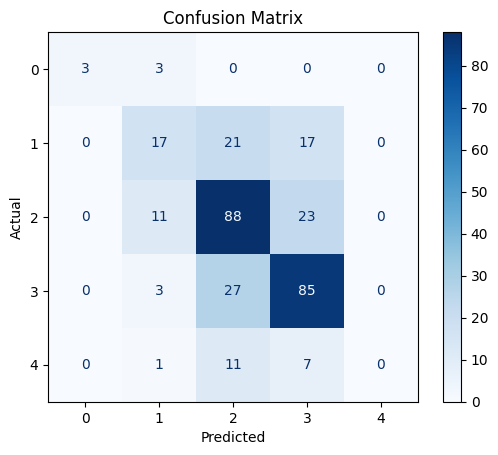

  0%|          | 0/100 [00:00<?, ?trial/s, best loss=?]

job exception: Found input variables with inconsistent numbers of samples: [738, 950]



  0%|          | 0/100 [00:00<?, ?trial/s, best loss=?]


ValueError: Found input variables with inconsistent numbers of samples: [738, 950]

In [47]:
def neuralnetwork(X_train_sm, y_train_sm, X_test, y_test):
    neuralnetwork_hyperopt(X_train_sm, y_train_sm, X_test, y_test)
    #neuralnetwork_gridsearch(X_train_sm, y_train_sm, X_test, y_test)

neuralnetwork(X_train, y_train, X_test, y_test)
neuralnetwork(X_train_sm, y_train_sm, X_test, y_test)

## Random Forest

**Important parameters:**
- estimators
- max_features
- min_sample_leaf
- n_jobs
- random_state
- oob_score


### Hyperopt

In [48]:
def randomforest_hyperopt(X_train_sm, y_train_sm, X_test, y_test):
    space = {
        'estimators': hp.choice('estimators', range(1, 100)),
        'max_features': hp.choice('max_features', [ 'sqrt', 'log2']),
        'min_sample_leaf': hp.choice('min_sample_leaf', range(1, 10)),
        'n_jobs' : hp.choice('n_jobs', range(1, 10)),
        'random_state' : hp.choice('random_state', range(1, 10)),
        'oob_score' : hp.choice('oob_score', [True, False]),
    }

    def objetive(space):
        rf =  RandomForestClassifier(n_estimators= int(space['estimators']),
                                    max_features= space['max_features'],
                                    min_samples_leaf= int(space['min_sample_leaf']),
                                    n_jobs= int(space['n_jobs']),
                                    random_state= int(space['random_state']),
                                    oob_score= space['oob_score'])

        rf.fit(X_train_sm, y_train_sm)

        y_pred = rf.predict(X_test)

        F1 = f1_score(y_test, y_pred, average = 'weighted')

        return {'loss': -F1, 'status': STATUS_OK }
    
    best = fmin (fn = objetive,
                space = space,
                algo = tpe.suggest,
                max_evals = 100)

    save_best_params(best, 'rand_f', 'hyperopt')

    max_features_map = {0: 'sqrt', 1: 'log2'}
    oob_score_map = {0: True, 1: False}

    best['max_features'] = max_features_map[best['max_features']]
    best['oob_score'] = oob_score_map[best['oob_score']]

    print(best)

    rf = RandomForestClassifier(n_estimators=best['estimators'],
                                max_features=max_features_map[1],
                                min_samples_leaf=1,
                                n_jobs=best['n_jobs'],
                                random_state=best['random_state'],
                                oob_score=best['oob_score'])

    rf.fit(X_train_sm, y_train_sm)

    evaluate_model(rf, X_train_sm, X_test, y_train_sm, y_test)

### GridSearch

In [89]:
def randomforest_gridsearch(X_train_sm, y_train_sm, X_test, y_test):

    parameters_rf = dict(n_estimators=range(1, 100),
                        max_features=['auto', 'sqrt', 'log2'],
                        min_sample_leaf=range(1, 10),
                        n_jobs=range(1, 10),
                        random_state=range(1, 10),
                        oob_score=[True, False])
    
    rf = RandomForestClassifier()

    grid_search_result = GridSearchCV(rf, parameters_rf, cv = 10, scoring='f1_weighted', verbose=10)

    grid_search_result.fit(X_train_sm, y_train_sm)

    best_param_rf_gs = grid_search_result.best_params_

    print (best_param_rf_gs)

    save_best_params(best_param_rf_gs, 'rand_f', 'grid_search')

    rf = RandomForestClassifier(n_estimators=best_param_rf_gs['estimators'],
                                max_features=best_param_rf_gs['max_features'],
                                min_sample_leaf=best_param_rf_gs['min_sample_leaf'],
                                n_jobs=best_param_rf_gs['n_jobs'],
                                random_state=best_param_rf_gs['random_state'],
                                oob_score=best_param_rf_gs['oob_score'])

    rf.fit(X_train_sm, y_train_sm)

    evaluate_model(rf, X_train_sm, X_test, y_train_sm, y_test)

### Function Random Forest

  0%|          | 0/100 [00:00<?, ?trial/s, best loss=?]

  8%|▊         | 8/100 [00:01<00:14,  6.56trial/s, best loss: -0.6155369857097504]

C:\Users\Maria\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\ensemble\_forest.py:578: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(



 27%|██▋       | 27/100 [00:04<00:12,  5.62trial/s, best loss: -0.6345437785793705]

C:\Users\Maria\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\ensemble\_forest.py:578: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(



 31%|███       | 31/100 [00:04<00:10,  6.87trial/s, best loss: -0.6345437785793705]

C:\Users\Maria\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\ensemble\_forest.py:578: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(



 41%|████      | 41/100 [00:07<00:12,  4.61trial/s, best loss: -0.6345437785793705]

C:\Users\Maria\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\ensemble\_forest.py:578: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(



 54%|█████▍    | 54/100 [00:08<00:05,  7.88trial/s, best loss: -0.6345437785793705]

C:\Users\Maria\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\ensemble\_forest.py:578: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(



 59%|█████▉    | 59/100 [00:09<00:05,  7.15trial/s, best loss: -0.6345437785793705]

C:\Users\Maria\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\ensemble\_forest.py:578: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(



 77%|███████▋  | 77/100 [00:12<00:02,  8.43trial/s, best loss: -0.6345437785793705]

C:\Users\Maria\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\ensemble\_forest.py:578: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(

C:\Users\Maria\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\ensemble\_forest.py:578: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(



 86%|████████▌ | 86/100 [00:14<00:02,  5.67trial/s, best loss: -0.6345437785793705]

C:\Users\Maria\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\ensemble\_forest.py:578: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(



 99%|█████████▉| 99/100 [00:17<00:00,  5.26trial/s, best loss: -0.6345437785793705]

C:\Users\Maria\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\ensemble\_forest.py:578: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(



100%|██████████| 100/100 [00:17<00:00,  5.74trial/s, best loss: -0.6345437785793705]
{'estimators': 24, 'max_features': 'sqrt', 'min_sample_leaf': 2, 'n_jobs': 3, 'oob_score': True, 'random_state': 1}
Training Results:

Accuracy score:  0.9947368421052631
Precision score:  0.9947763289267242
Recall score:  0.9947368421052631
F1 score:  0.9947230383795678

Testing Results:

Accuracy score:  0.5772870662460567
Precision score:  0.5590137012100382
Recall score:  0.5772870662460567
F1 score:  0.5623952808495395


<Figure size 1500x1000 with 0 Axes>

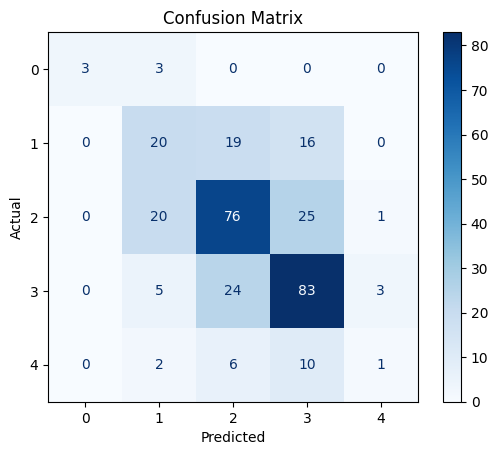

 12%|█▏        | 12/100 [00:01<00:09,  8.81trial/s, best loss: -0.6470279107498125]

C:\Users\Maria\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\ensemble\_forest.py:578: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(



 49%|████▉     | 49/100 [00:08<00:06,  7.49trial/s, best loss: -0.6470279107498125]

C:\Users\Maria\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\ensemble\_forest.py:578: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(



 55%|█████▌    | 55/100 [00:09<00:07,  5.84trial/s, best loss: -0.6470279107498125]

C:\Users\Maria\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\ensemble\_forest.py:578: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(



 71%|███████   | 71/100 [00:12<00:05,  5.62trial/s, best loss: -0.6470279107498125]

C:\Users\Maria\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\ensemble\_forest.py:578: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(



 75%|███████▌  | 75/100 [00:13<00:05,  4.83trial/s, best loss: -0.6470279107498125]

C:\Users\Maria\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\ensemble\_forest.py:578: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(

C:\Users\Maria\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\ensemble\_forest.py:578: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(



 81%|████████  | 81/100 [00:13<00:02,  7.12trial/s, best loss: -0.6470279107498125]

C:\Users\Maria\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\ensemble\_forest.py:578: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(



100%|██████████| 100/100 [00:16<00:00,  5.96trial/s, best loss: -0.6470279107498125]
{'estimators': 89, 'max_features': 'sqrt', 'min_sample_leaf': 2, 'n_jobs': 3, 'oob_score': False, 'random_state': 3}
Training Results:

Accuracy score:  1.0
Precision score:  1.0
Recall score:  1.0
F1 score:  1.0

Testing Results:

Accuracy score:  0.6025236593059937
Precision score:  0.5589505348773496
Recall score:  0.6025236593059937
F1 score:  0.5748519627215655


<Figure size 1500x1000 with 0 Axes>

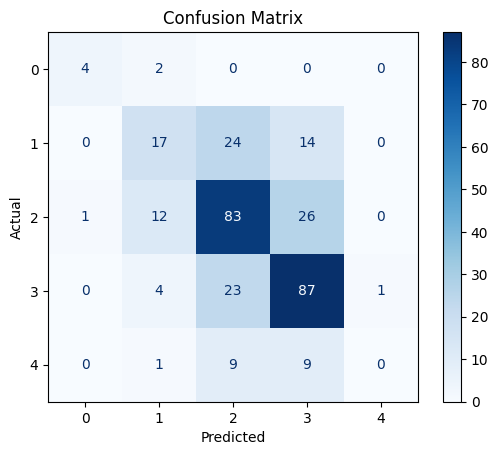

In [49]:
def randomforest(X_train_sm, y_train_sm, X_test, y_test):
    randomforest_hyperopt(X_train_sm, y_train_sm, X_test, y_test)
    #randomforest_gridsearch(X_train_sm, y_train_sm, X_test, y_test)

randomforest(X_train, y_train, X_test, y_test)
randomforest(X_train_sm, y_train_sm, X_test, y_test)

## XGBoost

**Important parameters:**
- estimators
- learning_rate
- max_depth
- grow_policy
- booster
- gamma
- min_child_weight


### Hyperopt

In [50]:
def xgboost_hyperopt(X_train_sm, y_train_sm, X_test, y_test):
    y.unique()

    space = {
        'estimators': hp.choice('estimators', range(1, 100)),
        'learning_rate': hp.quniform("learning_rate", 0.005, 10.0, 0.1),
        'max_depth': hp.choice('max_depth', range(1, 100)),
        'grow_policy': hp.choice('grow_policy', ['depthwise', 'lossguide']),
        'booster': hp.choice('booster', ['gbtree', 'gblinear', 'dart']),
        'gamma': hp.quniform("gamma", 0.0001, 1.0, 0.01),
        'min_child_weight': hp.choice('min_child_weight', range(1, 10))
    }

    def objetive(space):
        xgboost =  XGBClassifier(n_estimators= int(space['estimators']),
                                learning_rate= float(space['learning_rate']),
                                max_depth= int(space['max_depth']),
                                grow_policy= space['grow_policy'],
                                booster= space['booster'],
                                gamma= float(space['gamma']),
                                min_child_weight= int(space['min_child_weight']))

        xgboost.fit(X_train_sm, y_train_sm)

        y_pred = xgboost.predict(X_test)

        F1 = f1_score(y_test, y_pred, average = 'weighted')

        return {'loss': -F1, 'status': STATUS_OK }
    
    best = fmin (fn = objetive,
                space = space,
                algo = tpe.suggest,
                max_evals = 100)

    save_best_params(best, 'xgboost', 'hyperopt')

    grow_policy_map = {0: 'depthwise', 1: 'lossguide'}
    booster_map = {0: 'gbtree', 1: 'gblinear', 2: 'dart'}

    best['grow_policy'] = grow_policy_map[best['grow_policy']]
    best['booster'] = booster_map[best['booster']]

    print(best)

    xgboost = XGBClassifier(n_estimators=best['estimators'],
                            learning_rate=best['learning_rate'],
                            max_depth=best['max_depth'],
                            grow_policy=best['grow_policy'],
                            booster=best['booster'],
                            gamma=best['gamma'],
                            min_child_weight=best['min_child_weight']) 



    xgboost.fit(X_train_sm,y_train_sm )

    evaluate_model(xgboost, X_train_sm, X_test, y_train_sm, y_test)

### GridSearch

In [46]:
def xgboost_gridsearch(X_train_sm, y_train_sm, X_test, y_test):
    parameters_xgboost = dict(n_estimators=range(1, 100),
                        learning_rate=np.arange(0.005, 10.0, 0.1),
                        max_depth=range(1, 100),
                        grow_policy=['depthwise', 'lossguide'],
                        booster=['gbtree', 'gblinear', 'dart'],
                        gamma=np.arange(0.0001, 1.0, 0.1),
                        min_child_weight=range(1, 10))

    xgboost = XGBClassifier()

    grid_search_result = RandomizedSearchCV(xgboost, parameters_xgboost, cv = 5, scoring='f1_weighted', verbose=10)

    grid_search_result.fit(X_train_sm, y_train_sm)

    best_param_xgboost_gs = grid_search_result.best_params_

    print (best_param_xgboost_gs)

    save_best_params(best_param_xgboost_gs, 'xgboost', 'grid_search')

    xgboost = XGBClassifier(n_estimators=best_param_xgboost_gs['n_estimators'],
                            learning_rate=best_param_xgboost_gs['learning_rate'],
                            max_depth=best_param_xgboost_gs['max_depth'],
                            grow_policy=best_param_xgboost_gs['grow_policy'],
                            booster=best_param_xgboost_gs['booster'],
                            gamma=best_param_xgboost_gs['gamma'],
                            min_child_weight=best_param_xgboost_gs['min_child_weight'])

    xgboost.fit(X_train_sm, y_train_sm)

    evaluate_model(xgboost, X_train_sm, X_test, y_train_sm, y_test)

### Function XGBoost

  0%|          | 0/100 [00:00<?, ?trial/s, best loss=?]

  1%|          | 1/100 [00:00<01:01,  1.60trial/s, best loss: -0.5648105774740718]

C:\Users\Maria\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\xgboost\core.py:160: UserWarning: [23:31:03] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "gamma", "grow_policy", "max_depth", "min_child_weight" } are not used.

  warnings.warn(smsg, UserWarning)



  7%|▋         | 7/100 [00:10<01:41,  1.09s/trial, best loss: -0.5947583103959849]

C:\Users\Maria\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\xgboost\core.py:160: UserWarning: [23:31:13] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "gamma", "grow_policy", "max_depth", "min_child_weight" } are not used.

  warnings.warn(smsg, UserWarning)



  9%|▉         | 9/100 [00:15<02:20,  1.55s/trial, best loss: -0.5947583103959849]

C:\Users\Maria\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\xgboost\core.py:160: UserWarning: [23:31:18] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "gamma", "grow_policy", "max_depth", "min_child_weight" } are not used.

  warnings.warn(smsg, UserWarning)



 12%|█▏        | 12/100 [00:16<01:02,  1.41trial/s, best loss: -0.5947583103959849]

C:\Users\Maria\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\xgboost\core.py:160: UserWarning: [23:31:19] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "gamma", "grow_policy", "max_depth", "min_child_weight" } are not used.

  warnings.warn(smsg, UserWarning)



 15%|█▌        | 15/100 [00:23<02:30,  1.77s/trial, best loss: -0.5947583103959849]

C:\Users\Maria\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\xgboost\core.py:160: UserWarning: [23:31:26] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "gamma", "grow_policy", "max_depth", "min_child_weight" } are not used.

  warnings.warn(smsg, UserWarning)



 18%|█▊        | 18/100 [00:36<04:23,  3.21s/trial, best loss: -0.5947583103959849]

C:\Users\Maria\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\xgboost\core.py:160: UserWarning: [23:31:38] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "gamma", "grow_policy", "max_depth", "min_child_weight" } are not used.

  warnings.warn(smsg, UserWarning)

C:\Users\Maria\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\xgboost\core.py:160: UserWarning: [23:31:38] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "gamma", "grow_policy", "max_depth", "min_child_weight" } are not used.

  warnings.warn(smsg, UserWarning)



 22%|██▏       | 22/100 [00:37<01:14,  1.04trial/s, best loss: -0.5947583103959849]

C:\Users\Maria\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\xgboost\core.py:160: UserWarning: [23:31:39] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "gamma", "grow_policy", "max_depth", "min_child_weight" } are not used.

  warnings.warn(smsg, UserWarning)



 24%|██▍       | 24/100 [00:37<00:42,  1.79trial/s, best loss: -0.5947583103959849]

C:\Users\Maria\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\xgboost\core.py:160: UserWarning: [23:31:40] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "gamma", "grow_policy", "max_depth", "min_child_weight" } are not used.

  warnings.warn(smsg, UserWarning)

C:\Users\Maria\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\xgboost\core.py:160: UserWarning: [23:31:40] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "gamma", "grow_policy", "max_depth", "min_child_weight" } are not used.

  warnings.warn(smsg, UserWarning)



 28%|██▊       | 28/100 [00:38<00:20,  3.58trial/s, best loss: -0.5947583103959849]

C:\Users\Maria\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\xgboost\core.py:160: UserWarning: [23:31:40] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "gamma", "grow_policy", "max_depth", "min_child_weight" } are not used.

  warnings.warn(smsg, UserWarning)

C:\Users\Maria\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\xgboost\core.py:160: UserWarning: [23:31:41] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "gamma", "grow_policy", "max_depth", "min_child_weight" } are not used.

  warnings.warn(smsg, UserWarning)



 56%|█████▌    | 56/100 [01:18<01:03,  1.44s/trial, best loss: -0.6089535808979875]

C:\Users\Maria\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\xgboost\core.py:160: UserWarning: [23:32:21] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "gamma", "grow_policy", "max_depth", "min_child_weight" } are not used.

  warnings.warn(smsg, UserWarning)



 60%|██████    | 60/100 [01:25<01:11,  1.78s/trial, best loss: -0.6089535808979875]

C:\Users\Maria\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\xgboost\core.py:160: UserWarning: [23:32:28] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "gamma", "grow_policy", "max_depth", "min_child_weight" } are not used.

  warnings.warn(smsg, UserWarning)



 63%|██████▎   | 63/100 [01:26<00:28,  1.32trial/s, best loss: -0.6089535808979875]

C:\Users\Maria\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\xgboost\core.py:160: UserWarning: [23:32:29] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "gamma", "grow_policy", "max_depth", "min_child_weight" } are not used.

  warnings.warn(smsg, UserWarning)



 76%|███████▌  | 76/100 [01:33<00:05,  4.60trial/s, best loss: -0.6293718780206905]

C:\Users\Maria\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\xgboost\core.py:160: UserWarning: [23:32:35] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "gamma", "grow_policy", "max_depth", "min_child_weight" } are not used.

  warnings.warn(smsg, UserWarning)



 91%|█████████ | 91/100 [01:54<00:09,  1.10s/trial, best loss: -0.6293718780206905]

C:\Users\Maria\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\xgboost\core.py:160: UserWarning: [23:32:56] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "gamma", "grow_policy", "max_depth", "min_child_weight" } are not used.

  warnings.warn(smsg, UserWarning)



 94%|█████████▍| 94/100 [02:01<00:08,  1.47s/trial, best loss: -0.6293718780206905]

C:\Users\Maria\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\xgboost\core.py:160: UserWarning: [23:33:03] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "gamma", "grow_policy", "max_depth", "min_child_weight" } are not used.

  warnings.warn(smsg, UserWarning)



 96%|█████████▌| 96/100 [02:06<00:06,  1.73s/trial, best loss: -0.6293718780206905]

C:\Users\Maria\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\xgboost\core.py:160: UserWarning: [23:33:08] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "gamma", "grow_policy", "max_depth", "min_child_weight" } are not used.

  warnings.warn(smsg, UserWarning)



 99%|█████████▉| 99/100 [02:08<00:01,  1.14s/trial, best loss: -0.6293718780206905]

C:\Users\Maria\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\xgboost\core.py:160: UserWarning: [23:33:11] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "gamma", "grow_policy", "max_depth", "min_child_weight" } are not used.

  warnings.warn(smsg, UserWarning)



100%|██████████| 100/100 [02:08<00:00,  1.29s/trial, best loss: -0.6293718780206905]
{'booster': 'gbtree', 'estimators': 16, 'gamma': 0.97, 'grow_policy': 'lossguide', 'learning_rate': 0.30000000000000004, 'max_depth': 98, 'min_child_weight': 5}
Training Results:

Accuracy score:  0.7421052631578947
Precision score:  0.7496425361682134
Recall score:  0.7421052631578947
F1 score:  0.7273969700889483

Testing Results:

Accuracy score:  0.6246056782334385
Precision score:  0.5970536809459068
Recall score:  0.6246056782334385
F1 score:  0.5990151134964635


<Figure size 1500x1000 with 0 Axes>

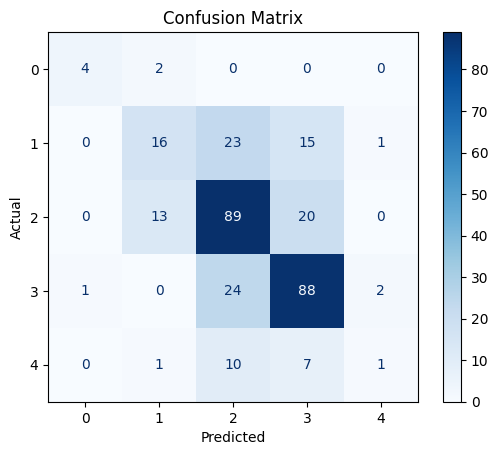

  1%|          | 1/100 [00:00<00:14,  6.86trial/s, best loss: -0.21390743229162923]

C:\Users\Maria\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\xgboost\core.py:160: UserWarning: [23:33:12] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "gamma", "grow_policy", "max_depth", "min_child_weight" } are not used.

  warnings.warn(smsg, UserWarning)



  4%|▍         | 4/100 [00:01<00:49,  1.93trial/s, best loss: -0.3297716463898813] 

C:\Users\Maria\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\xgboost\core.py:160: UserWarning: [23:33:14] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "gamma", "grow_policy", "max_depth", "min_child_weight" } are not used.

  warnings.warn(smsg, UserWarning)



  5%|▌         | 5/100 [00:02<00:41,  2.29trial/s, best loss: -0.3297716463898813]

C:\Users\Maria\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\xgboost\core.py:160: UserWarning: [23:33:14] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "gamma", "grow_policy", "max_depth", "min_child_weight" } are not used.

  warnings.warn(smsg, UserWarning)



  9%|▉         | 9/100 [00:11<03:01,  2.00s/trial, best loss: -0.5822314881433875]

C:\Users\Maria\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\xgboost\core.py:160: UserWarning: [23:33:24] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "gamma", "grow_policy", "max_depth", "min_child_weight" } are not used.

  warnings.warn(smsg, UserWarning)

C:\Users\Maria\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\xgboost\core.py:160: UserWarning: [23:33:24] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "gamma", "grow_policy", "max_depth", "min_child_weight" } are not used.

  warnings.warn(smsg, UserWarning)



 12%|█▏        | 12/100 [00:12<01:17,  1.13trial/s, best loss: -0.5822314881433875]

C:\Users\Maria\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\xgboost\core.py:160: UserWarning: [23:33:24] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "gamma", "grow_policy", "max_depth", "min_child_weight" } are not used.

  warnings.warn(smsg, UserWarning)



 19%|█▉        | 19/100 [00:19<01:06,  1.22trial/s, best loss: -0.5822314881433875]

C:\Users\Maria\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\xgboost\core.py:160: UserWarning: [23:33:31] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "gamma", "grow_policy", "max_depth", "min_child_weight" } are not used.

  warnings.warn(smsg, UserWarning)

C:\Users\Maria\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\xgboost\core.py:160: UserWarning: [23:33:31] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "gamma", "grow_policy", "max_depth", "min_child_weight" } are not used.

  warnings.warn(smsg, UserWarning)



 40%|████      | 40/100 [01:17<01:28,  1.48s/trial, best loss: -0.6055955506859448]

C:\Users\Maria\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\xgboost\core.py:160: UserWarning: [23:34:29] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "gamma", "grow_policy", "max_depth", "min_child_weight" } are not used.

  warnings.warn(smsg, UserWarning)



 42%|████▏     | 42/100 [01:22<01:47,  1.85s/trial, best loss: -0.6055955506859448]

C:\Users\Maria\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\xgboost\core.py:160: UserWarning: [23:34:34] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "gamma", "grow_policy", "max_depth", "min_child_weight" } are not used.

  warnings.warn(smsg, UserWarning)



 46%|████▌     | 46/100 [01:26<00:51,  1.05trial/s, best loss: -0.6055955506859448]

C:\Users\Maria\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\xgboost\core.py:160: UserWarning: [23:34:38] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "gamma", "grow_policy", "max_depth", "min_child_weight" } are not used.

  warnings.warn(smsg, UserWarning)



 50%|█████     | 50/100 [01:35<01:15,  1.50s/trial, best loss: -0.6055955506859448]

C:\Users\Maria\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\xgboost\core.py:160: UserWarning: [23:34:47] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "gamma", "grow_policy", "max_depth", "min_child_weight" } are not used.

  warnings.warn(smsg, UserWarning)



 54%|█████▍    | 54/100 [01:48<01:36,  2.10s/trial, best loss: -0.6055955506859448]

C:\Users\Maria\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\xgboost\core.py:160: UserWarning: [23:35:00] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "gamma", "grow_policy", "max_depth", "min_child_weight" } are not used.

  warnings.warn(smsg, UserWarning)



 58%|█████▊    | 58/100 [01:49<00:30,  1.37trial/s, best loss: -0.6055955506859448]

C:\Users\Maria\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\xgboost\core.py:160: UserWarning: [23:35:01] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "gamma", "grow_policy", "max_depth", "min_child_weight" } are not used.

  warnings.warn(smsg, UserWarning)



 64%|██████▍   | 64/100 [01:59<00:51,  1.43s/trial, best loss: -0.6055955506859448]

C:\Users\Maria\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\xgboost\core.py:160: UserWarning: [23:35:11] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "gamma", "grow_policy", "max_depth", "min_child_weight" } are not used.

  warnings.warn(smsg, UserWarning)



 82%|████████▏ | 82/100 [02:48<00:26,  1.47s/trial, best loss: -0.6401570865704146]

C:\Users\Maria\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\xgboost\core.py:160: UserWarning: [23:36:00] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "gamma", "grow_policy", "max_depth", "min_child_weight" } are not used.

  warnings.warn(smsg, UserWarning)



 87%|████████▋ | 87/100 [03:10<00:38,  2.93s/trial, best loss: -0.6401570865704146]

C:\Users\Maria\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\xgboost\core.py:160: UserWarning: [23:36:22] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "gamma", "grow_policy", "max_depth", "min_child_weight" } are not used.

  warnings.warn(smsg, UserWarning)



 93%|█████████▎| 93/100 [03:24<00:10,  1.47s/trial, best loss: -0.6401570865704146]

C:\Users\Maria\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\xgboost\core.py:160: UserWarning: [23:36:36] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "gamma", "grow_policy", "max_depth", "min_child_weight" } are not used.

  warnings.warn(smsg, UserWarning)



 98%|█████████▊| 98/100 [03:37<00:03,  1.60s/trial, best loss: -0.6401570865704146]

C:\Users\Maria\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\xgboost\core.py:160: UserWarning: [23:36:50] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "gamma", "grow_policy", "max_depth", "min_child_weight" } are not used.

  warnings.warn(smsg, UserWarning)



100%|██████████| 100/100 [03:42<00:00,  2.23s/trial, best loss: -0.6401570865704146]
{'booster': 'dart', 'estimators': 49, 'gamma': 0.8200000000000001, 'grow_policy': 'depthwise', 'learning_rate': 0.4, 'max_depth': 91, 'min_child_weight': 7}
Training Results:

Accuracy score:  0.7737127371273713
Precision score:  0.7881171032963593
Recall score:  0.7737127371273713
F1 score:  0.7606796735274741

Testing Results:

Accuracy score:  0.6624605678233438
Precision score:  0.621399105626235
Recall score:  0.6624605678233438
F1 score:  0.636243488542344


<Figure size 1500x1000 with 0 Axes>

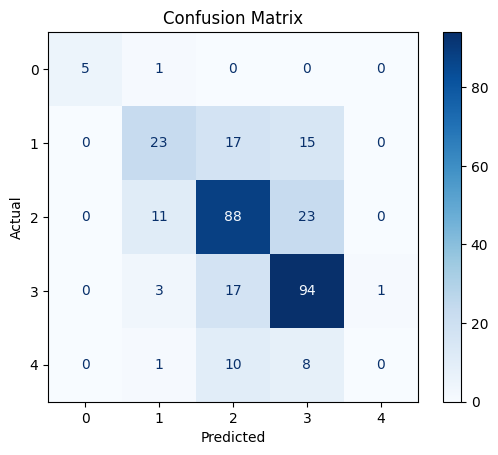

In [51]:
def xgboost(X_train_sm, y_train_sm, X_test, y_test):
    xgboost_hyperopt(X_train_sm, y_train_sm, X_test, y_test)
    #xgboost_gridsearch(X_train_sm, y_train_sm, X_test, y_test)

xgboost(X_train, y_train, X_test, y_test)
xgboost(X_train_sm, y_train_sm, X_test, y_test)

## AdaBoost

**Important parameters:**
- estimators
- learning_rate
- loss function
- algorithm


In [42]:
from imblearn.under_sampling import TomekLinks
balancer = TomekLinks()
X_train_sm, y_train_sm=balancer.fit_resample(X_train, y_train)

### Hyperopt

In [52]:
def adaboost_hyperopt(X_train_sm, y_train_sm, X_test, y_test):
    space = {
        'estimators': hp.choice('estimators', range(1, 100)),
        'learning_rate': hp.quniform("learning_rate", 0.05, 10.0, 0.1),
        'algorithm': hp.choice('algorithm', ['SAMME', 'SAMME.R'])
    }

    def hyperparameter_tuning(space):
        adaboost =  AdaBoostClassifier(n_estimators= int(space['estimators']),
                                        learning_rate= float(space['learning_rate']),
                                        algorithm= space['algorithm'],
                                        )

        adaboost.fit(X_train_sm, y_train_sm)

        y_pred = adaboost.predict(X_test)

        F1 = f1_score(y_test, y_pred, average = 'weighted')

        return {'loss': -F1, 'status': STATUS_OK }
    
    best = fmin (fn = hyperparameter_tuning,
            space = space,
            algo = tpe.suggest,
            max_evals = 100)

    save_best_params(best, 'ada_boost', 'hyperopt')

    algorithm_map = {0: 'SAMME', 1: 'SAMME.R'}

    best['algorithm'] = algorithm_map[best['algorithm']]

    print (best)

    adaboost = AdaBoostClassifier(n_estimators=best['estimators'],
                                learning_rate=best['learning_rate'],
                                algorithm=best['algorithm'])

    adaboost.fit(X_train_sm, y_train_sm)

    evaluate_model(adaboost, X_train_sm, X_test, y_train_sm, y_test)

### GridSearch

In [95]:
def adaboost_gridsearch(X_train_sm, y_train_sm, X_test, y_test):
    parameters_ada = dict(n_estimators=range(1, 100),
                        learning_rate=np.arange(0.005, 10.0, 0.1),
                        algorithm=['SAMME', 'SAMME.R'])
    
    adaboost = AdaBoostClassifier()

    grid_search_result = GridSearchCV(adaboost, parameters_ada, cv = 10, scoring='f1_weighted', verbose=10)

    grid_search_result.fit(X_train_sm, y_train_sm)

    best_param_ada_gs = grid_search_result.best_params_

    print (best_param_ada_gs)

    save_best_params(best_param_ada_gs, 'ada_boost', 'grid_search')

    addaboost = AdaBoostClassifier(n_estimators=best_param_ada_gs['estimators'],
                                learning_rate=best_param_ada_gs['learning_rate'],
                                loss_function=best_param_ada_gs['loss_function'],
                                algorithm=best_param_ada_gs['algorithm'])

    addaboost.fit(X_train_sm, y_train_sm)

    evaluate_model(addaboost, X_train_sm, X_test, y_train_sm, y_test)

### Function AdaBoost

  0%|          | 0/100 [00:00<?, ?trial/s, best loss=?]

100%|██████████| 100/100 [00:16<00:00,  6.23trial/s, best loss: -0.5912930541429098]
{'algorithm': 'SAMME', 'estimators': 76, 'learning_rate': 0.7000000000000001}
Training Results:

Accuracy score:  0.5852631578947368
Precision score:  0.5560746710855049
Recall score:  0.5852631578947368
F1 score:  0.5533157282230841

Testing Results:

Accuracy score:  0.6151419558359621
Precision score:  0.564056973520696
Recall score:  0.6151419558359621
F1 score:  0.5742990086701758


<Figure size 1500x1000 with 0 Axes>

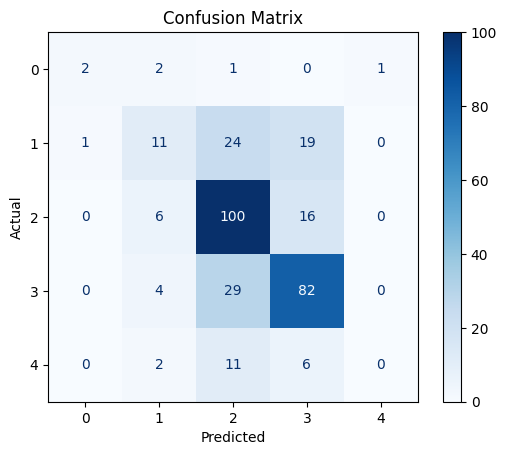

100%|██████████| 100/100 [00:13<00:00,  7.23trial/s, best loss: -0.5962576735052532]
{'algorithm': 'SAMME', 'estimators': 64, 'learning_rate': 0.4}
Training Results:

Accuracy score:  0.6355013550135501
Precision score:  0.62409550915705
Recall score:  0.6355013550135501
F1 score:  0.6030025086617218

Testing Results:

Accuracy score:  0.637223974763407
Precision score:  0.5943919149641146
Recall score:  0.637223974763407
F1 score:  0.5962576735052532


<Figure size 1500x1000 with 0 Axes>

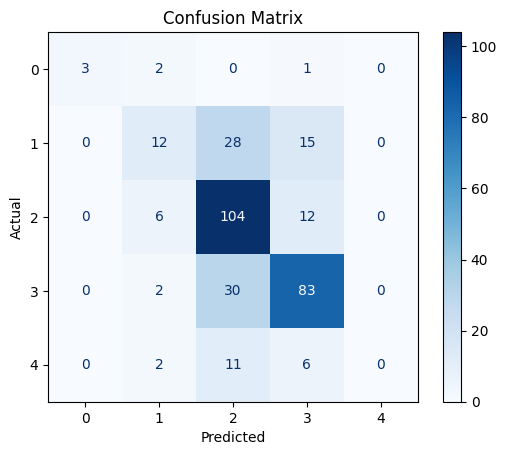

In [53]:
def adaboost(X_train_sm, y_train_sm, X_test, y_test):
    adaboost_hyperopt(X_train_sm, y_train_sm, X_test, y_test)
    #adaboost_gridsearch(X_train_sm, y_train_sm, X_test, y_test)

adaboost(X_train, y_train, X_test, y_test)
adaboost(X_train_sm, y_train_sm, X_test, y_test)


## LightGBM

In [2]:
#import lgbm
from lightgbm import LGBMClassifier

### Hyperopt

In [54]:
def lightgbm_hyperopt(X_train_sm, y_train_sm, X_test, y_test):
    space = {
        'estimators': hp.choice('estimators', range(1, 100)),
        'learning_rate': hp.quniform("learning_rate", 0.05, 10.0, 0.1),
        'max_depth': hp.choice('max_depth', range(1, 100)),
        'min_child_weight': hp.choice('min_child_weight', range(1, 10)),
        'subsample': hp.quniform("subsample", 0.05, 1.0, 0.05),
        'colsample_bytree': hp.quniform("colsample_bytree", 0.05, 1.0, 0.05),
        'reg_alpha': hp.quniform("reg_alpha", 0.0001, 1.0, 0.01),
        'reg_lambda': hp.quniform("reg_lambda", 0.0001, 1.0, 0.01),
        'num_leaves': hp.choice('num_leaves', range(2, 100)),
        'boosting_type': hp.choice('boosting_type', ['gbdt', 'dart', 'goss']),
        'objective': hp.choice('objective', ['multiclass']),
        'num_class': hp.choice('num_class', [4]),
        'metric': hp.choice('metric', ['multi_error', 'multi_logloss']),
    }

    def hyperparameter_tuning(space):
        lightgbm =  LGBMClassifier(n_estimators= int(space['estimators']),
                                    learning_rate= float(space['learning_rate']),
                                    max_depth= int(space['max_depth']),
                                    min_child_weight= int(space['min_child_weight']),
                                    subsample= float(space['subsample']),
                                    colsample_bytree= float(space['colsample_bytree']),
                                    reg_alpha= float(space['reg_alpha']),
                                    reg_lambda= float(space['reg_lambda']),
                                    num_leaves= int(space['num_leaves']),
                                    boosting_type= space['boosting_type'],
                                    objective= space['objective'],
                                    metric= space['metric'])

        lightgbm.fit(X_train_sm, y_train_sm)

        y_pred = lightgbm.predict(X_test)

        F1 = f1_score(y_test, y_pred, average = 'weighted')

        return {'loss': -F1, 'status': STATUS_OK }
    
    best = fmin (fn = hyperparameter_tuning,
                    space = space,
                    algo = tpe.suggest,
                    max_evals = 100)
    
    save_best_params(best, 'lightgbm', 'hyperopt')

    boosting_type_map = {0: 'gbdt', 1: 'dart', 2: 'goss'}

    best['boosting_type'] = boosting_type_map[best['boosting_type']]

    print (best)

    lightgbm = LGBMClassifier(n_estimators=best['estimators'],
                                learning_rate=best['learning_rate'],
                                max_depth=best['max_depth'],
                                min_child_weight=best['min_child_weight'],
                                subsample=best['subsample'],
                                colsample_bytree=best['colsample_bytree'],
                                reg_alpha=best['reg_alpha'],
                                reg_lambda=best['reg_lambda'],
                                num_leaves=best['num_leaves'],
                                boosting_type=best['boosting_type'],
                                objective=best['objective'],
                                metric=best['metric'])
    
    lightgbm.fit(X_train_sm, y_train_sm)

    evaluate_model(lightgbm, X_train_sm, X_test, y_train_sm, y_test)

### Function LGBMClassifier

In [55]:
def lgbm (X_train_sm, y_train_sm, X_test, y_test):
    lightgbm_hyperopt(X_train_sm, y_train_sm, X_test, y_test)

lgbm(X_train, y_train, X_test, y_test)
lgbm(X_train_sm, y_train_sm, X_test, y_test)

  0%|          | 0/100 [00:00<?, ?trial/s, best loss=?]

job exception: name 'LGBMClassifier' is not defined



  0%|          | 0/100 [00:00<?, ?trial/s, best loss=?]

NameError: name 'LGBMClassifier' is not defined

# Test Different methods with different balanced

In [41]:
from imblearn.under_sampling import TomekLinks
from imblearn.over_sampling import SMOTE
from imblearn.combine import SMOTETomek
from imblearn.over_sampling import RandomOverSampler
from sklearn.pipeline import make_pipeline
from collections import Counter

def test_balance_model(X_train,y_train,balanced):
    if balanced == 'TomekLinks':
        balancer = TomekLinks()
    elif balanced == 'SMOTE':
        balancer = SMOTE(random_state=33)
    elif balanced == 'SMOTETomek':
        balancer = SMOTETomek(random_state=33)
    elif balanced == 'RandomOverSample':
        balancer = RandomOverSampler()


    #Balancear os dados
    counter= Counter(y_train)
    print("Before balanced: ", counter)
    X_train_sm, y_train_sm=balancer.fit_resample(X_train, y_train)
    counter= Counter(y_train_sm)
    print("After balanced: ", counter)

    
    # Criar pipeline com o balanceamento e o modelo
    #pipeline = make_pipeline(balancer, modelo)
    # Treinar e testar o modelo usando o balanceamento
    #pipeline.fit(X_train_sm, y_train_sm)

    print("--------------------------------------------------------------------------------")
    print("Decision Tree ")
    decision_tree(X_train_sm, y_train_sm,X_test,y_test)

    print("--------------------------------------------------------------------------------")
    print("K-nearest-neighbords ")
    k_nearest_neighbors(X_train_sm, y_train_sm,X_test,y_test)
    
    print("--------------------------------------------------------------------------------")
    print("Vector ")
    support_vector_machine(X_train_sm, y_train_sm,X_test,y_test)

    print("--------------------------------------------------------------------------------")
    print("Logistic Regression")
    logistic(X_train_sm, y_train_sm,X_test,y_test)

    print("--------------------------------------------------------------------------------")
    print("Neural Network")
    neuralnetwork(X_train_sm, y_train_sm,X_train,y_test)

    print("--------------------------------------------------------------------------------")
    print("Random Forest")
    randomforest(X_train_sm, y_train_sm,X_test,y_test)

    print("--------------------------------------------------------------------------------")
    print("XGBBoost")
    xgboost(X_train_sm, y_train_sm,X_test,y_test)

    print("--------------------------------------------------------------------------------")
    print("AdaBoost")
    adaboost(X_train_sm, y_train_sm,X_test,y_test)

### TomekLinks

Before balanced:  Counter({2: 365, 3: 344, 1: 165, 4: 56, 0: 20})
After balanced:  Counter({2: 276, 3: 269, 1: 120, 4: 31, 0: 20})
--------------------------------------------------------------------------------
Decision Tree 
  4%|▍         | 4/100 [00:00<00:02, 38.76trial/s, best loss: -0.21390743229162923]

100%|██████████| 100/100 [00:05<00:00, 17.33trial/s, best loss: -0.5760001774992429]
{'criterion': 0, 'max_depth': 11.0, 'max_features': 1, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 8.0, 'min_samples_split': 10.0, 'splitter': 1}
Training Results:

Accuracy score:  0.5139664804469274
Precision score:  0.48790453243680393
Recall score:  0.5139664804469274
F1 score:  0.4688746970055702

Testing Results:

Accuracy score:  0.501577287066246
Precision score:  0.4507936113664025
Recall score:  0.501577287066246
F1 score:  0.4574275184750291


<Figure size 1500x1000 with 0 Axes>

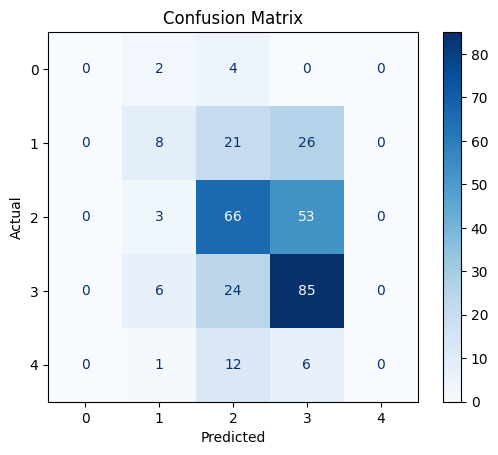

--------------------------------------------------------------------------------
K-nearest-neighbords 
100%|██████████| 100/100 [00:06<00:00, 15.27trial/s, best loss: -0.5866301218734378]
{'algorithm': 3, 'leaf_size': 36, 'metric': 3, 'n_neighbors': 15, 'p': 0, 'weights': 1}
Training Results:

Accuracy score:  1.0
Precision score:  1.0
Recall score:  1.0
F1 score:  1.0

Testing Results:

Accuracy score:  0.5962145110410094
Precision score:  0.5671123073504031
Recall score:  0.5962145110410094
F1 score:  0.5769714710991191


<Figure size 1500x1000 with 0 Axes>

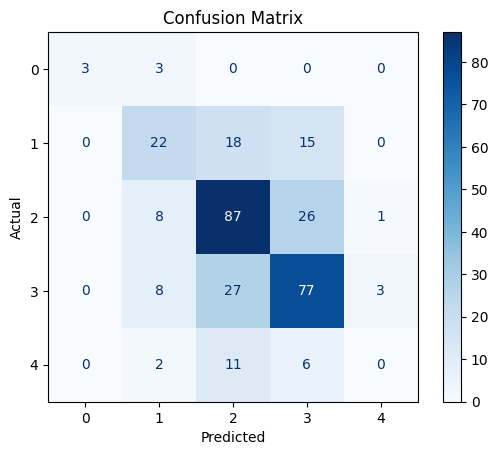

--------------------------------------------------------------------------------
Vector 
100%|██████████| 100/100 [00:30<00:00,  3.33trial/s, best loss: -0.5879707325244531]
{'C': 0.029223573233772535}
Training Results:

Accuracy score:  0.6410614525139665
Precision score:  0.6166564656205201
Recall score:  0.6410614525139665
F1 score:  0.623070024644646

Testing Results:

Accuracy score:  0.6088328075709779
Precision score:  0.572797294106427
Recall score:  0.6088328075709779
F1 score:  0.5879707325244531


<Figure size 1500x1000 with 0 Axes>

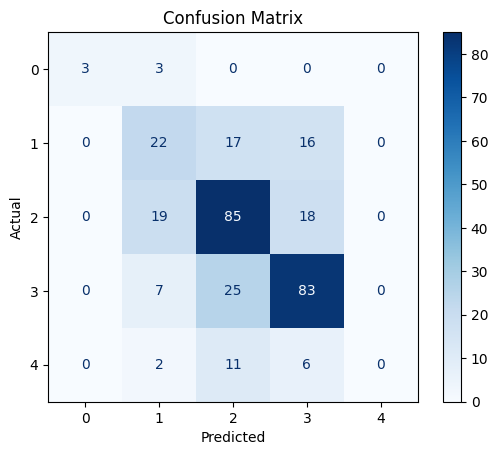

--------------------------------------------------------------------------------
Random Forest
 44%|████▍     | 44/100 [00:12<00:13,  4.09trial/s, best loss: -0.6206040725573764]

c:\Users\mariana\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ensemble\_forest.py:578: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(



 53%|█████▎    | 53/100 [00:14<00:09,  5.07trial/s, best loss: -0.6206040725573764]

c:\Users\mariana\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ensemble\_forest.py:578: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(



 59%|█████▉    | 59/100 [00:16<00:08,  4.74trial/s, best loss: -0.6214171387672965]

c:\Users\mariana\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ensemble\_forest.py:578: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(



 75%|███████▌  | 75/100 [00:19<00:06,  3.85trial/s, best loss: -0.628956896024854] 

c:\Users\mariana\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ensemble\_forest.py:578: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(



 81%|████████  | 81/100 [00:21<00:03,  5.71trial/s, best loss: -0.628956896024854]

c:\Users\mariana\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ensemble\_forest.py:578: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(

c:\Users\mariana\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ensemble\_forest.py:578: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(



 86%|████████▌ | 86/100 [00:22<00:03,  3.69trial/s, best loss: -0.628956896024854]

c:\Users\mariana\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ensemble\_forest.py:578: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(



100%|██████████| 100/100 [00:25<00:00,  3.89trial/s, best loss: -0.628956896024854]
{'estimators': 48, 'max_features': 'log2', 'min_sample_leaf': 4, 'n_jobs': 3, 'oob_score': False, 'random_state': 7}
Training Results:

Accuracy score:  1.0
Precision score:  1.0
Recall score:  1.0
F1 score:  1.0

Testing Results:

Accuracy score:  0.6309148264984227
Precision score:  0.5899452133312135
Recall score:  0.6309148264984227
F1 score:  0.6041547619758091


<Figure size 1500x1000 with 0 Axes>

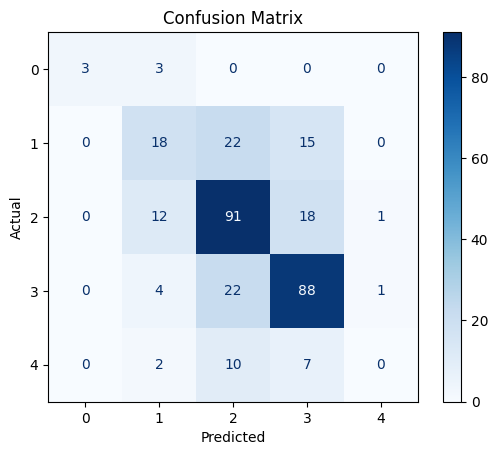

--------------------------------------------------------------------------------
XGBBoost
100%|██████████| 100/100 [01:16<00:00,  1.30trial/s, best loss: -0.6054649043893865]
{'booster': 'dart', 'estimators': 36, 'gamma': 0.55, 'grow_policy': 'lossguide', 'learning_rate': 0.2, 'max_depth': 53, 'min_child_weight': 7}
Training Results:

Accuracy score:  0.9106145251396648
Precision score:  0.9126373004030653
Recall score:  0.9106145251396648
F1 score:  0.90578530226729

Testing Results:

Accuracy score:  0.6088328075709779
Precision score:  0.5672259247852818
Recall score:  0.6088328075709779
F1 score:  0.5856183157269733


<Figure size 1500x1000 with 0 Axes>

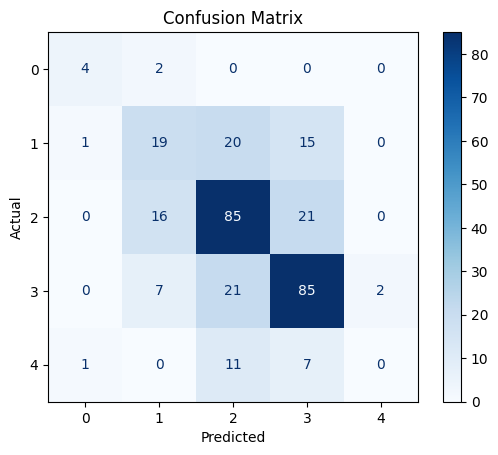

--------------------------------------------------------------------------------
AdaBoost
100%|██████████| 100/100 [00:28<00:00,  3.46trial/s, best loss: -0.6049909333868767]
{'algorithm': 'SAMME', 'estimators': 83, 'learning_rate': 0.4}
Training Results:

Accuracy score:  0.6103351955307262
Precision score:  0.5952336844794945
Recall score:  0.6103351955307262
F1 score:  0.5823440594718938

Testing Results:

Accuracy score:  0.5993690851735016
Precision score:  0.567920476577447
Recall score:  0.5993690851735016
F1 score:  0.5687007380528342


<Figure size 1500x1000 with 0 Axes>

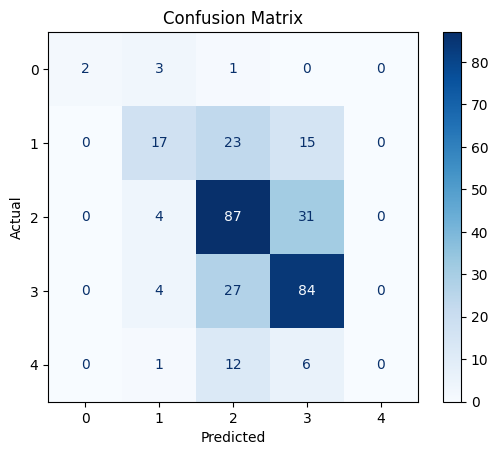

In [113]:
test_balance_model(X_train,y_train,'TomekLinks')

### Smote


Before balanced:  Counter({2: 365, 3: 344, 1: 165, 4: 56, 0: 20})
After balanced:  Counter({2: 365, 3: 365, 1: 365, 4: 365, 0: 365})
--------------------------------------------------------------------------------
Decision Tree 
100%|██████████| 100/100 [00:05<00:00, 17.27trial/s, best loss: -0.4993464696836044] 
{'criterion': 1, 'max_depth': 19.0, 'max_features': 0, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 2.0, 'min_samples_split': 5.0, 'splitter': 1}
Training Results:

Accuracy score:  0.6947945205479452
Precision score:  0.6937458834427528
Recall score:  0.6947945205479452
F1 score:  0.6924196249026161

Testing Results:

Accuracy score:  0.39747634069400634
Precision score:  0.4821270794602542
Recall score:  0.39747634069400634
F1 score:  0.4050287735469939


<Figure size 1500x1000 with 0 Axes>

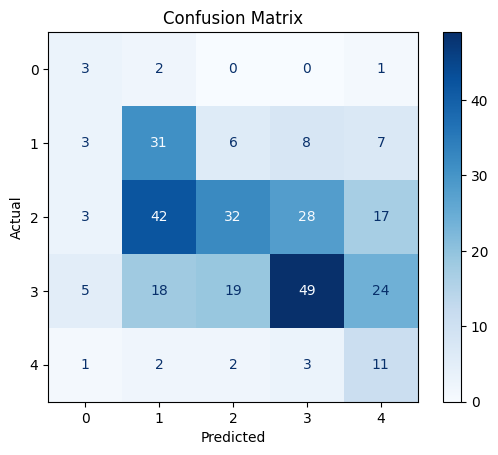

--------------------------------------------------------------------------------
K-nearest-neighbords 
100%|██████████| 100/100 [00:09<00:00, 10.96trial/s, best loss: -0.5036629433302032]
{'algorithm': 1, 'leaf_size': 16, 'metric': 1, 'n_neighbors': 13, 'p': 0, 'weights': 1}
Training Results:

Accuracy score:  1.0
Precision score:  1.0
Recall score:  1.0
F1 score:  1.0

Testing Results:

Accuracy score:  0.4605678233438486
Precision score:  0.5647111095462329
Recall score:  0.4605678233438486
F1 score:  0.48637659711418846


<Figure size 1500x1000 with 0 Axes>

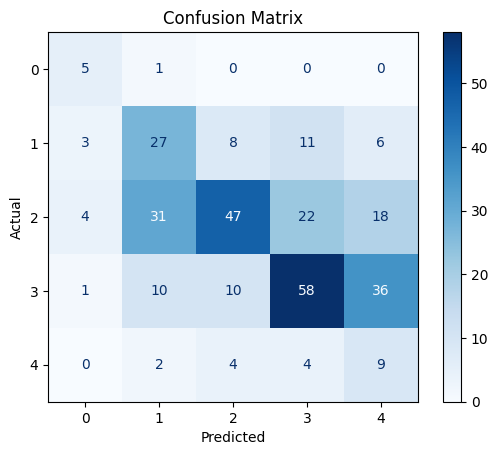

--------------------------------------------------------------------------------
Vector 
100%|██████████| 100/100 [02:10<00:00,  1.31s/trial, best loss: -0.5306707938908597]
{'C': 0.01925471921314205}
Training Results:

Accuracy score:  0.6
Precision score:  0.6111954605455371
Recall score:  0.6
F1 score:  0.5955446789998721

Testing Results:

Accuracy score:  0.48580441640378547
Precision score:  0.6624341606949795
Recall score:  0.48580441640378547
F1 score:  0.5306707938908597


<Figure size 1500x1000 with 0 Axes>

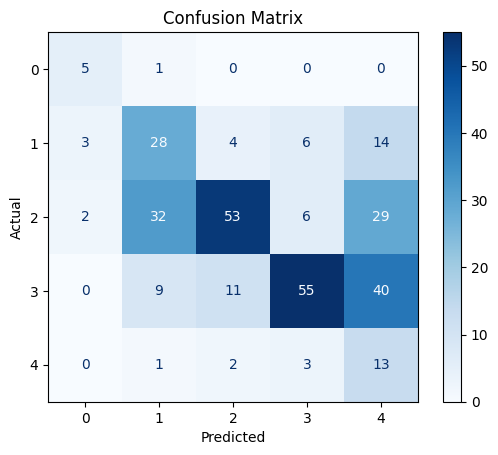

--------------------------------------------------------------------------------
Random Forest
  2%|▏         | 2/100 [00:00<00:51,  1.92trial/s, best loss: -0.5688638953059867]

c:\Users\mariana\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ensemble\_forest.py:578: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(



 18%|█▊        | 18/100 [00:09<00:42,  1.94trial/s, best loss: -0.5983430384095758]

c:\Users\mariana\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ensemble\_forest.py:578: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(



 61%|██████    | 61/100 [00:30<00:15,  2.45trial/s, best loss: -0.6012605297436464]

c:\Users\mariana\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ensemble\_forest.py:578: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(



 97%|█████████▋| 97/100 [00:48<00:00,  3.77trial/s, best loss: -0.6227798992240527]

c:\Users\mariana\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ensemble\_forest.py:578: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(

c:\Users\mariana\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ensemble\_forest.py:578: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(



100%|██████████| 100/100 [00:49<00:00,  2.02trial/s, best loss: -0.6227798992240527]
{'estimators': 48, 'max_features': 'log2', 'min_sample_leaf': 1, 'n_jobs': 0, 'oob_score': True, 'random_state': 1}


c:\Users\mariana\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ensemble\_forest.py:578: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(



ValueError: n_jobs == 0 in Parallel has no meaning

In [114]:
test_balance_model(X_train,y_train,'SMOTE')

### Smote Tomek

Before balanced:  Counter({2: 365, 3: 344, 1: 165, 4: 56, 0: 20})
After balanced:  Counter({0: 365, 4: 363, 1: 349, 3: 318, 2: 312})
--------------------------------------------------------------------------------
Decision Tree 
100%|██████████| 100/100 [00:06<00:00, 16.33trial/s, best loss: -0.5222195935157282]  
{'criterion': 1, 'max_depth': 9.0, 'max_features': 0, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 4.0, 'min_samples_split': 6.0, 'splitter': 0}
Training Results:

Accuracy score:  0.7369654364381957
Precision score:  0.7325314395686761
Recall score:  0.7369654364381957
F1 score:  0.7313475952656081

Testing Results:

Accuracy score:  0.4195583596214511
Precision score:  0.5360641783044431
Recall score:  0.4195583596214511
F1 score:  0.4458662869334563


<Figure size 1500x1000 with 0 Axes>

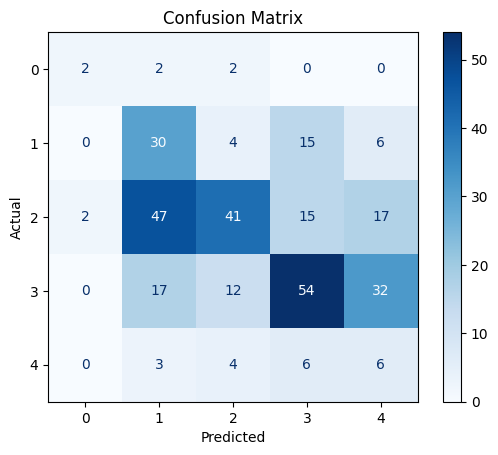

--------------------------------------------------------------------------------
K-nearest-neighbords 
100%|██████████| 100/100 [00:09<00:00, 10.64trial/s, best loss: -0.5069784210322018]
{'algorithm': 1, 'leaf_size': 5, 'metric': 3, 'n_neighbors': 3, 'p': 0, 'weights': 0}
Training Results:

Accuracy score:  0.8939660222612771
Precision score:  0.8954490358286804
Recall score:  0.8939660222612771
F1 score:  0.89018077012102

Testing Results:

Accuracy score:  0.43217665615141954
Precision score:  0.4984541772891127
Recall score:  0.43217665615141954
F1 score:  0.44758829356039


<Figure size 1500x1000 with 0 Axes>

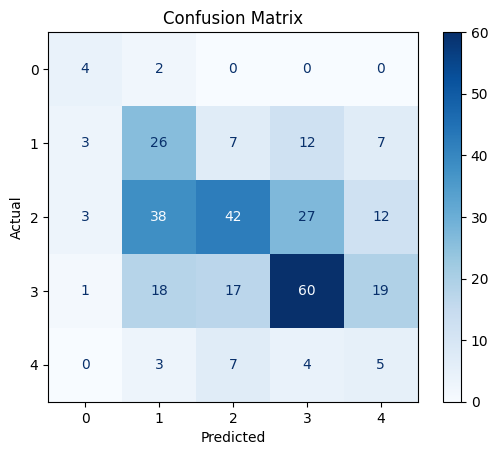

--------------------------------------------------------------------------------
Vector 
100%|██████████| 100/100 [01:27<00:00,  1.15trial/s, best loss: -0.4772659324078882]
{'C': 0.7107193475295106}
Training Results:

Accuracy score:  0.6531927357937902
Precision score:  0.6552810069628096
Recall score:  0.6531927357937902
F1 score:  0.6460218531097438

Testing Results:

Accuracy score:  0.444794952681388
Precision score:  0.5912349842429536
Recall score:  0.444794952681388
F1 score:  0.4772659324078882


<Figure size 1500x1000 with 0 Axes>

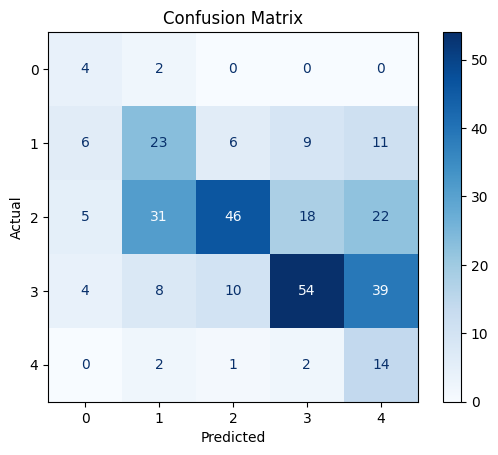

--------------------------------------------------------------------------------
Random Forest
 11%|█         | 11/100 [00:03<00:32,  2.73trial/s, best loss: -0.5767234549553035]

c:\Users\mariana\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ensemble\_forest.py:578: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(



 26%|██▌       | 26/100 [00:08<00:22,  3.23trial/s, best loss: -0.5797374402835078]

c:\Users\mariana\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ensemble\_forest.py:578: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(



 28%|██▊       | 28/100 [00:09<00:26,  2.73trial/s, best loss: -0.5797374402835078]

c:\Users\mariana\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ensemble\_forest.py:578: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(



 31%|███       | 31/100 [00:11<00:34,  1.98trial/s, best loss: -0.5797374402835078]

c:\Users\mariana\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ensemble\_forest.py:578: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(



 37%|███▋      | 37/100 [00:12<00:12,  5.11trial/s, best loss: -0.5797374402835078]

c:\Users\mariana\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ensemble\_forest.py:578: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(

c:\Users\mariana\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ensemble\_forest.py:578: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(

c:\Users\mariana\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ensemble\_forest.py:578: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(



100%|██████████| 100/100 [00:41<00:00,  2.44trial/s, best loss: -0.6060871118892465]
{'estimators': 82, 'max_features': 'sqrt', 'min_sample_leaf': 0, 'n_jobs': 5, 'oob_score': False, 'random_state': 2}
Training Results:

Accuracy score:  1.0
Precision score:  1.0
Recall score:  1.0
F1 score:  1.0

Testing Results:

Accuracy score:  0.5583596214511041
Precision score:  0.5878954157628046
Recall score:  0.5583596214511041
F1 score:  0.5707479739847989


<Figure size 1500x1000 with 0 Axes>

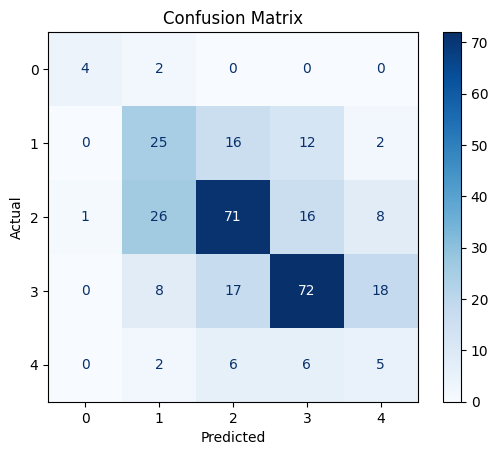

--------------------------------------------------------------------------------
XGBBoost
100%|██████████| 100/100 [02:16<00:00,  1.37s/trial, best loss: -0.5892609394938715] 
{'booster': 'dart', 'estimators': 30, 'gamma': 0.9500000000000001, 'grow_policy': 'depthwise', 'learning_rate': 0.1, 'max_depth': 27, 'min_child_weight': 1}
Training Results:

Accuracy score:  0.9847685998828354
Precision score:  0.9847418451117614
Recall score:  0.9847685998828354
F1 score:  0.9847517219328847

Testing Results:

Accuracy score:  0.583596214511041
Precision score:  0.6080470528420056
Recall score:  0.583596214511041
F1 score:  0.5934839230574563


<Figure size 1500x1000 with 0 Axes>

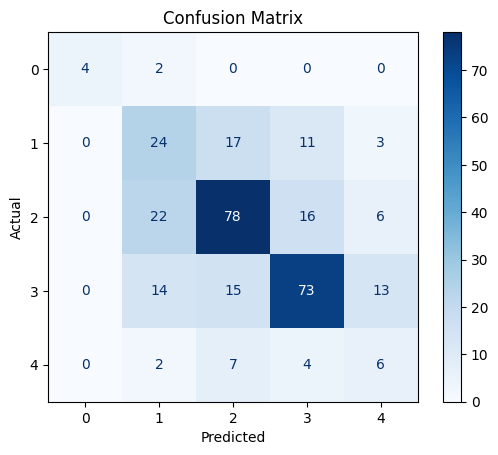

--------------------------------------------------------------------------------
AdaBoost
100%|██████████| 100/100 [01:20<00:00,  1.24trial/s, best loss: -0.5072714319252307]
{'algorithm': 'SAMME', 'estimators': 91, 'learning_rate': 1.9000000000000001}
Training Results:

Accuracy score:  0.546572934973638
Precision score:  0.5755900484588763
Recall score:  0.546572934973638
F1 score:  0.5470692102655297

Testing Results:

Accuracy score:  0.444794952681388
Precision score:  0.5473481525340347
Recall score:  0.444794952681388
F1 score:  0.44210543156852233


<Figure size 1500x1000 with 0 Axes>

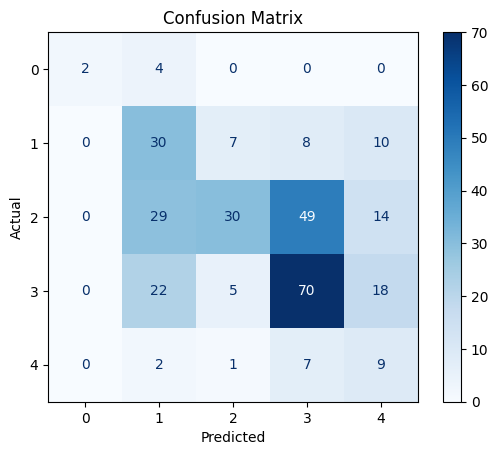

In [115]:
test_balance_model(X_train,y_train,'SMOTETomek')

### RandomOverSample

Before balanced:  Counter({2: 365, 3: 344, 1: 165, 4: 56, 0: 20})
After balanced:  Counter({2: 365, 3: 365, 1: 365, 4: 365, 0: 365})
--------------------------------------------------------------------------------
Decision Tree 
100%|██████████| 100/100 [00:04<00:00, 22.83trial/s, best loss: -0.45929146901170287] 
{'criterion': 1, 'max_depth': 10.0, 'max_features': 0, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 8.0, 'min_samples_split': 4.0, 'splitter': 1}
Training Results:

Accuracy score:  0.5517808219178082
Precision score:  0.5655804667601941
Recall score:  0.5517808219178082
F1 score:  0.5442381389602365

Testing Results:

Accuracy score:  0.4889589905362776
Precision score:  0.5333862835108062
Recall score:  0.4889589905362776
F1 score:  0.49266382316361246


<Figure size 1500x1000 with 0 Axes>

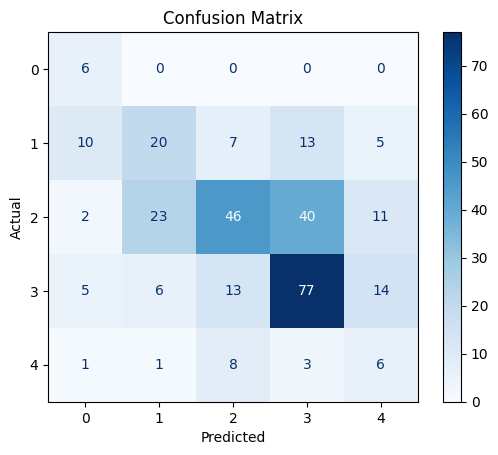

--------------------------------------------------------------------------------
K-nearest-neighbords 
100%|██████████| 100/100 [00:08<00:00, 11.81trial/s, best loss: -0.4809790318487705]
{'algorithm': 2, 'leaf_size': 22, 'metric': 0, 'n_neighbors': 6, 'p': 1, 'weights': 1}
Training Results:

Accuracy score:  1.0
Precision score:  1.0
Recall score:  1.0
F1 score:  1.0

Testing Results:

Accuracy score:  0.4605678233438486
Precision score:  0.5408499892524005
Recall score:  0.4605678233438486
F1 score:  0.47799983673436913


<Figure size 1500x1000 with 0 Axes>

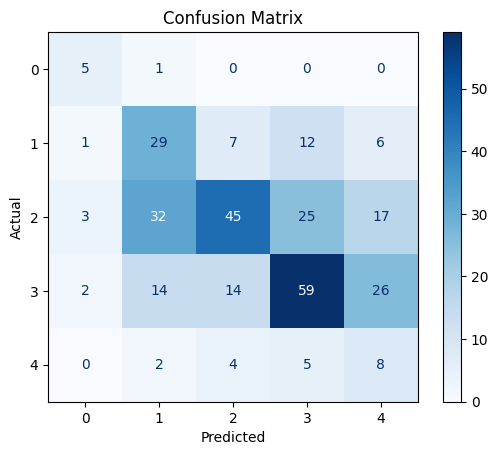

--------------------------------------------------------------------------------
Vector 
100%|██████████| 100/100 [01:45<00:00,  1.05s/trial, best loss: -0.5111725638539518]
{'C': 0.3891568676523583}
Training Results:

Accuracy score:  0.606027397260274
Precision score:  0.6072227531976149
Recall score:  0.606027397260274
F1 score:  0.6023405974919691

Testing Results:

Accuracy score:  0.48264984227129337
Precision score:  0.5980879534667193
Recall score:  0.48264984227129337
F1 score:  0.5111725638539518


<Figure size 1500x1000 with 0 Axes>

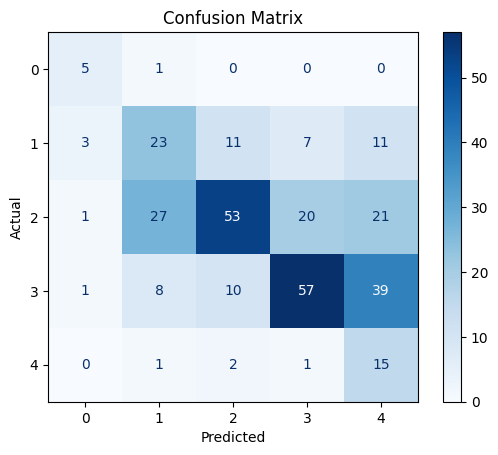

--------------------------------------------------------------------------------
Random Forest
 17%|█▋        | 17/100 [00:03<00:19,  4.26trial/s, best loss: -0.5967931676581367]

c:\Users\mariana\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ensemble\_forest.py:578: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(



 62%|██████▏   | 62/100 [00:16<00:07,  5.16trial/s, best loss: -0.6151221013658816]

c:\Users\mariana\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ensemble\_forest.py:578: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(



100%|██████████| 100/100 [00:26<00:00,  3.75trial/s, best loss: -0.6177805171255253]
{'estimators': 87, 'max_features': 'log2', 'min_sample_leaf': 2, 'n_jobs': 7, 'oob_score': False, 'random_state': 7}
Training Results:

Accuracy score:  1.0
Precision score:  1.0
Recall score:  1.0
F1 score:  1.0

Testing Results:

Accuracy score:  0.5899053627760252
Precision score:  0.5763100938219708
Recall score:  0.5899053627760252
F1 score:  0.5820111948113175


<Figure size 1500x1000 with 0 Axes>

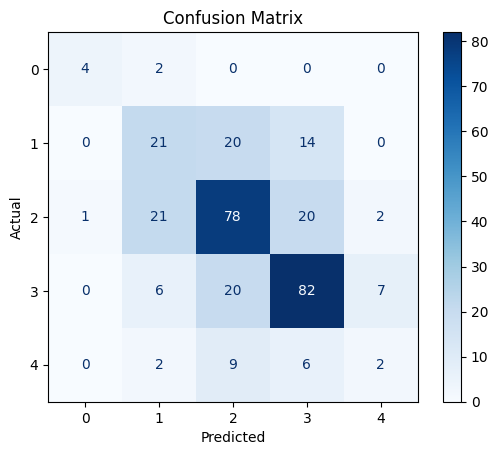

--------------------------------------------------------------------------------
XGBBoost
100%|██████████| 100/100 [01:59<00:00,  1.20s/trial, best loss: -0.6071267063691199]
{'booster': 'gbtree', 'estimators': 52, 'gamma': 0.38, 'grow_policy': 'lossguide', 'learning_rate': 0.1, 'max_depth': 9, 'min_child_weight': 6}
Training Results:

Accuracy score:  0.941917808219178
Precision score:  0.9415941951061892
Recall score:  0.941917808219178
F1 score:  0.9415509579813833

Testing Results:

Accuracy score:  0.5867507886435331
Precision score:  0.6052185357030135
Recall score:  0.5867507886435331
F1 score:  0.5904711712546071


<Figure size 1500x1000 with 0 Axes>

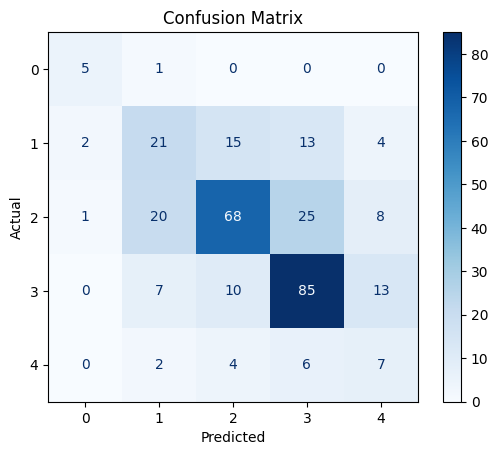

--------------------------------------------------------------------------------
AdaBoost
100%|██████████| 100/100 [00:31<00:00,  3.20trial/s, best loss: -0.45486705348205536]
{'algorithm': 'SAMME', 'estimators': 66, 'learning_rate': 1.0}
Training Results:

Accuracy score:  0.4947945205479452
Precision score:  0.5018409270370366
Recall score:  0.4947945205479452
F1 score:  0.489349628948008

Testing Results:

Accuracy score:  0.38485804416403785
Precision score:  0.44194322858700136
Recall score:  0.38485804416403785
F1 score:  0.38387142223739296


<Figure size 1500x1000 with 0 Axes>

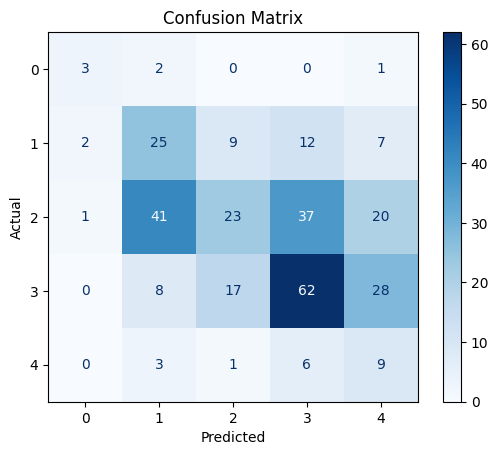

In [116]:
test_balance_model(X_train,y_train,'RandomOverSample')